In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

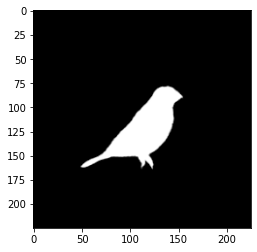

In [2]:
img = cv2.imread('bird2.png')
plt.imshow(img)

In [3]:
im = np.array(img, dtype=np.uint8)

49-78-107-87


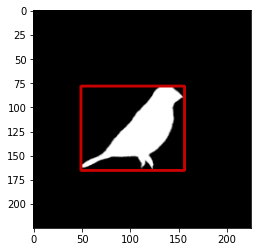

In [4]:
gray=cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    print(f'{x}-{y}-{w}-{h}')
    roi=im[y:y+h,x:x+w]
#     cv2.imwrite(str(idx) + '.jpg', roi)
    cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
plt.imshow(im)

### ACDC data

In [1]:
import torch
from torch.utils.data import DataLoader
from pyefd import elliptic_fourier_descriptors
import h5py
import numpy as np
import matplotlib.pyplot as plt
import cv2
import albumentations as A
from tqdm.notebook import tqdm

import sys
sys.path.append('../')
from utils.dataloaders import ACDCDataset

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

train_set = ACDCDataset('/home/e_radionova/Datasets/ACDC/train.h5', device)
val_set = ACDCDataset('/home/e_radionova/Datasets/ACDC/val.h5', device)

In [3]:
data = h5py.File('/home/e_radionova/Datasets/ACDC/train.h5')

In [4]:
def multiclass_to_binary(mask, class_num=3):
    new_mask = np.zeros((class_num, mask.shape[-2], mask.shape[-1]))
    for i in range(class_num):
        new_mask[i,:,:] = np.where(mask==i+1, 1, 0)
    return new_mask

In [26]:
mask = data['0'][1:]
mask = multiclass_to_binary(mask, class_num=3).transpose(1,2,0)

In [27]:
mask = mask[:,:,2]*255

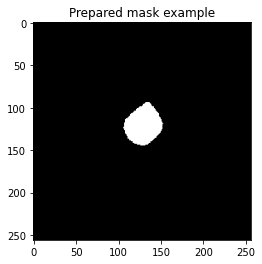

In [28]:
plt.imshow(mask, cmap='gray')
plt.title('Prepared mask example')
plt.show()

  0%|          | 0/1188 [00:00<?, ?it/s]

106-94-47-51


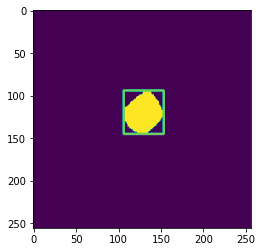

106-98-48-53


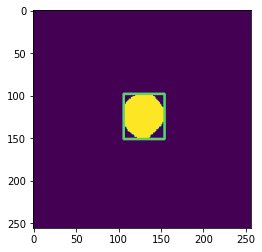

112-96-41-48


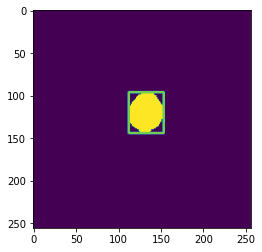

104-100-38-41


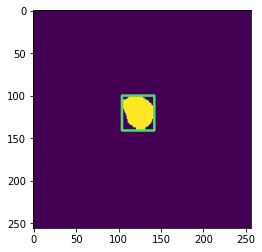

99-130-10-11


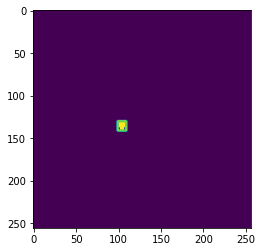

101-127-8-10


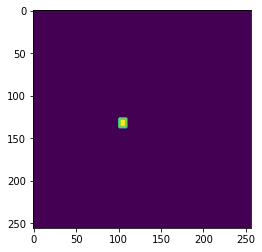

105-130-3-5


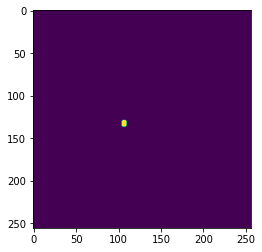

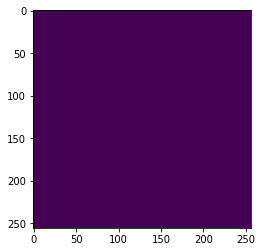

120-113-33-52


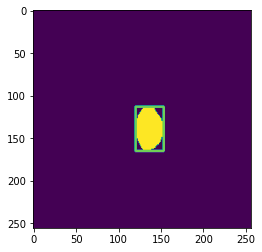

119-113-34-52


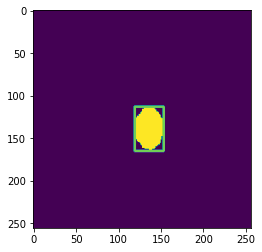

119-117-34-50


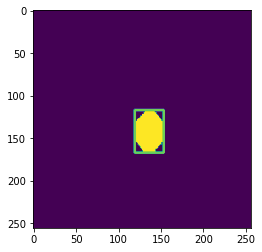

120-119-33-48


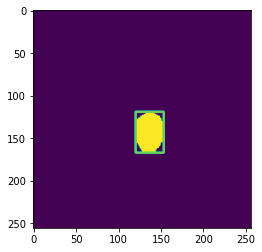

119-123-34-49


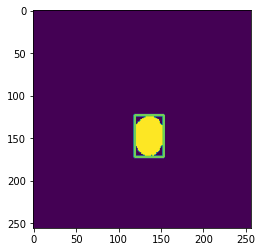

118-126-34-48


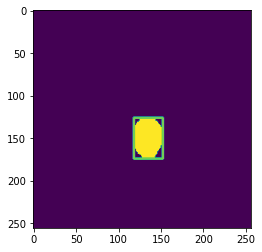

109-101-37-41


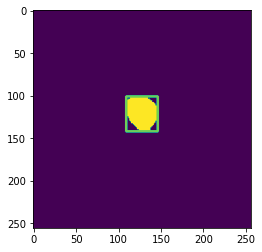

123-122-32-43


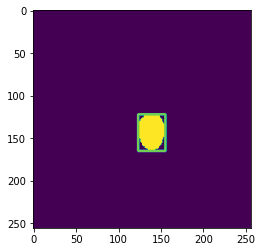

122-126-32-43


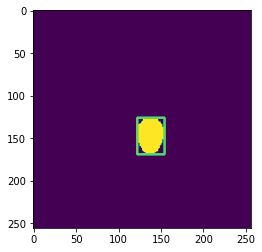

120-127-31-46


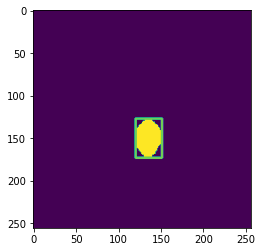

125-130-26-36


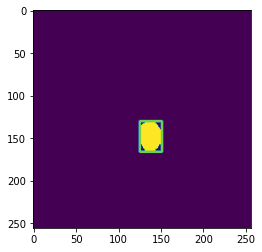

129-127-22-27


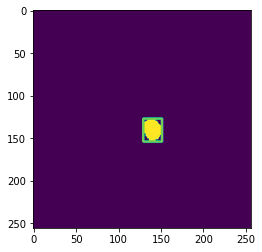

125-137-20-29


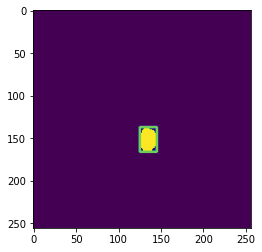

135-140-9-12


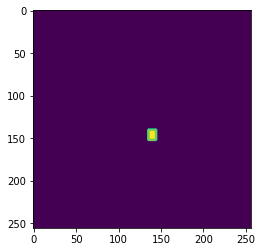

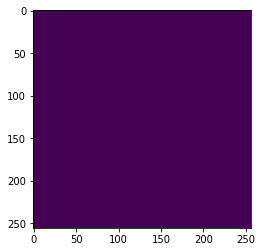

126-117-23-30


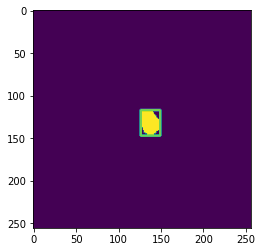

127-117-21-30


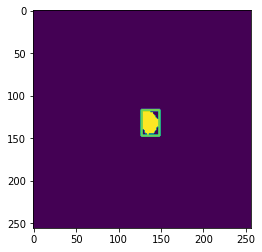

109-102-39-44


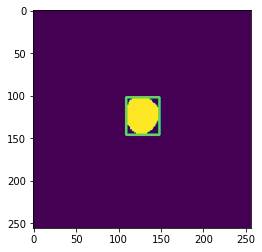

127-120-22-34


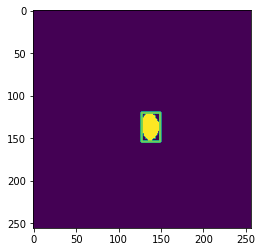

123-122-27-30


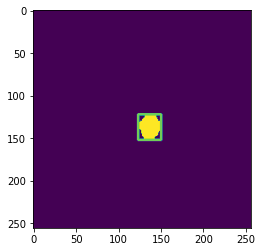

122-127-27-31


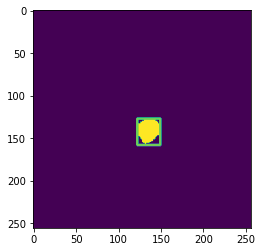

122-128-26-32


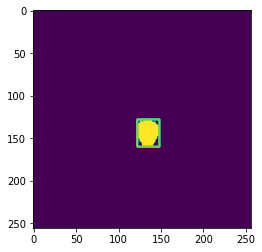

127-124-23-28


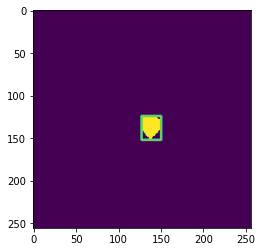

126-128-23-27


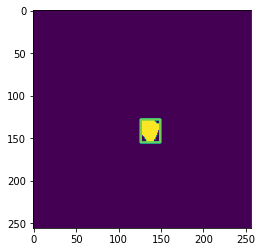

124-131-23-28


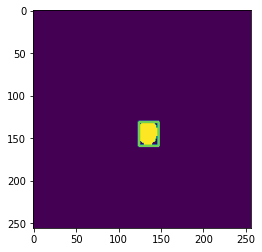

129-133-17-16


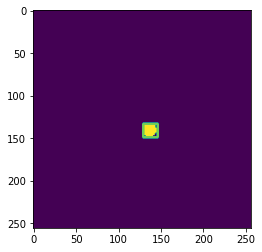

132-128-13-10


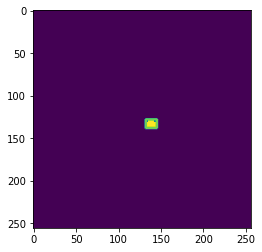

134-140-5-9


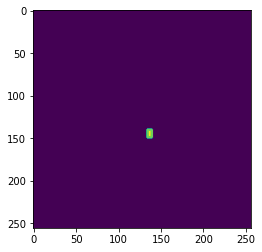

104-102-41-43


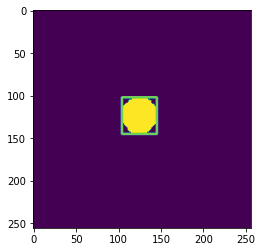

137-134-3-6


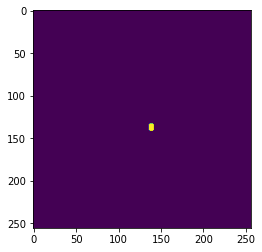

KeyboardInterrupt: 

In [16]:
w_lst = []
h_lst = []
n_class = 2
for key in tqdm(list(data.keys())): #[:10]):
    mask = data[key][1:]
    mask = multiclass_to_binary(mask, class_num=3).transpose(1,2,0)
    mask = mask[:, :, n_class]*255
    im = np.array(mask, dtype=np.uint8)
    gray = im
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    idx =0 
#     print(contours)
    if contours is not ():
        cnt = contours[-1]
#     for cnt in contours:
        idx += 1
        x,y,w,h = cv2.boundingRect(cnt)
        w_lst.append(w)
        h_lst.append(h)
        print(f'{x}-{y}-{w}-{h}')
        roi=im[y:y+h,x:x+w]
    #     cv2.imwrite(str(idx) + '.jpg', roi)
        cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
    plt.imshow(im)
#     plt.imshow(mask)
    plt.show()

### Birds data

In [4]:
import pickle5 as pickle
from pathlib import Path
import os
from skimage import transform
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:

with open("/home/e_radionova/DeepCluster/deepcluster/checkpts_Birds_1500epochs_30cls/clusters", "rb") as f:
    clusters = pickle.load(f)

epoch = 1000 #-1
num_cluster = 3 #11
cluster_idxs = clusters[epoch][num_cluster]

def find_names_in_fold(prefix):
    images_names = np.sort(os.listdir(prefix))
    list_names = np.sort(os.listdir(prefix / images_names[0])).tolist()
    for i, x in enumerate(list_names):
        list_names[i] = os.path.join(images_names[0],x)
    for i in images_names[1:]:
        list_names_onefold = np.sort(os.listdir(prefix / i)).tolist()
        for j, x in enumerate(list_names_onefold):
            list_names_onefold[j] = os.path.join(i, x)
        list_names.extend(list_names_onefold)
    return list_names

In [3]:
dataset_path = Path('/home/e_radionova/Datasets/Caltech_birds/CUB_200_2011/dataset')
train_imgs_path = dataset_path /  'train/images/'
train_masks_path = dataset_path /  'train/masks/'

train_masks_names = find_names_in_fold(train_masks_path)
train_imgs_names = find_names_in_fold(train_imgs_path)

lst_cluster_masks = [train_masks_names[i] for i in cluster_idxs]
lst_cluster_imgs = [train_imgs_names[i] for i in cluster_idxs]

from sklearn.model_selection import train_test_split
train_imgs, test_imgs, train_masks, test_masks = train_test_split(lst_cluster_imgs, lst_cluster_masks, 
                                                                  test_size=0.3, random_state=42)

In [4]:
name = train_masks[-1]

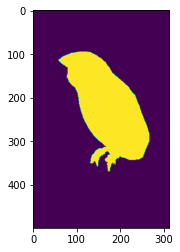

In [5]:
img = cv2.imread(str(dataset_path /  'train/masks/' / name))
img = img / img.max()
img = img[:,:,0]
img = np.where(img>0.5, 1, 0)
img = img*255

plt.imshow(img)
plt.show()

58-95-208-276


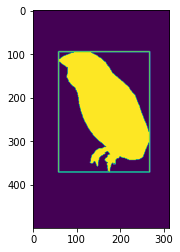

In [6]:
im = np.array(img, dtype=np.uint8)
gray=im
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
idx =0 
for cnt in contours:
    idx += 1
    x,y,w,h = cv2.boundingRect(cnt)
    print(f'{x}-{y}-{w}-{h}')
    roi=im[y:y+h,x:x+w]
#     cv2.imwrite(str(idx) + '.jpg', roi)
    cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
plt.imshow(im)

169-89-260-272


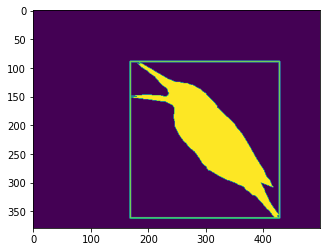

140-67-276-247


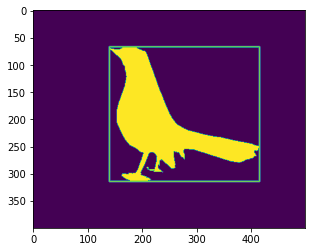

47-127-309-361


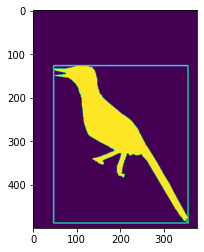

180-106-304-171


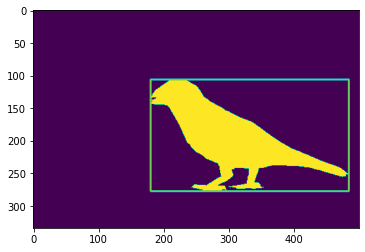

127-19-305-291


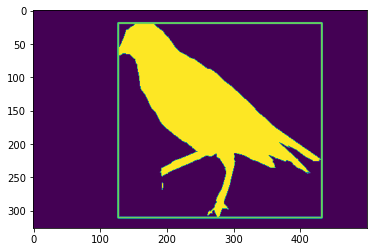

182-90-132-193


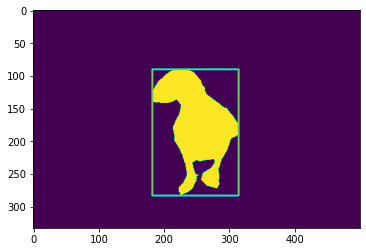

55-113-308-224


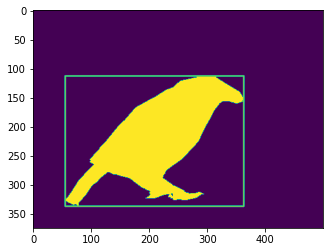

101-116-208-119


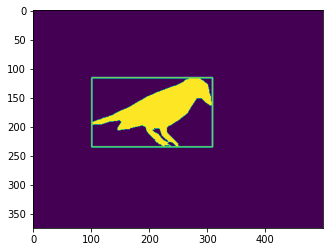

126-61-318-263


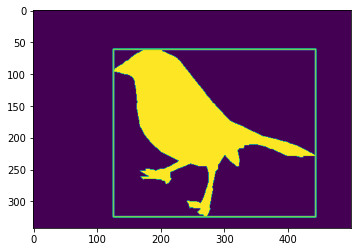

26-77-358-191


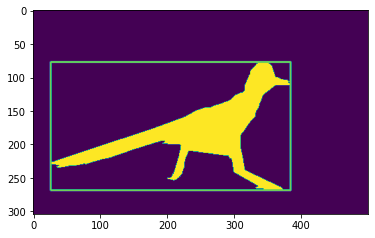

74-139-241-315


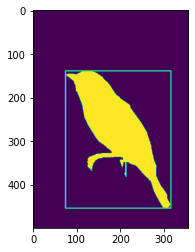

179-75-252-244


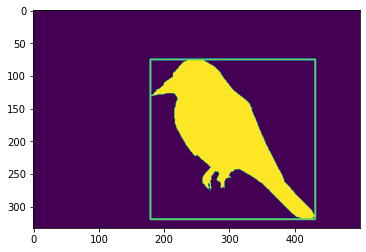

137-128-164-119


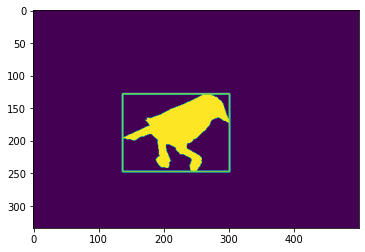

77-53-331-277


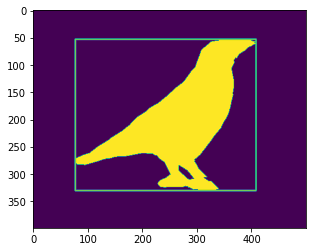

169-41-236-278


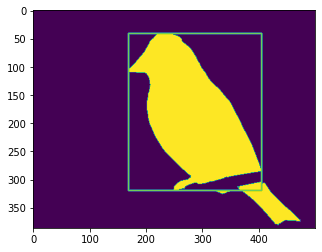

116-36-264-264


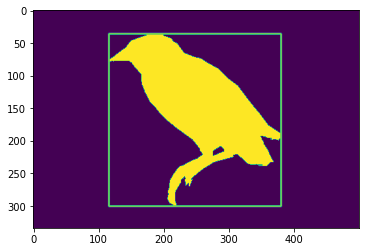

124-66-323-252


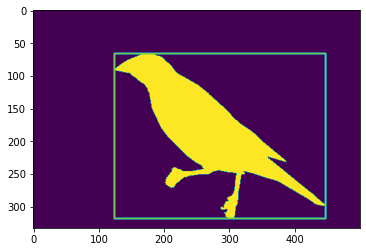

19-36-459-265


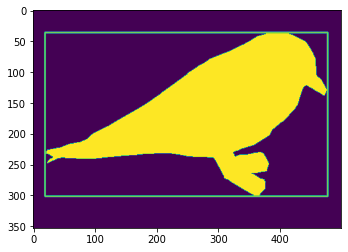

189-67-227-203


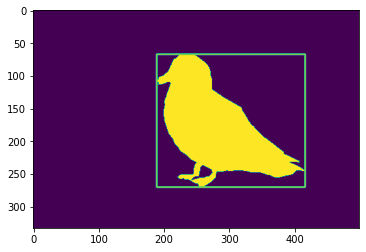

115-92-220-249


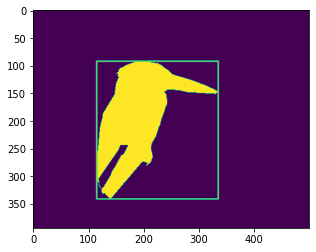

30-98-397-222


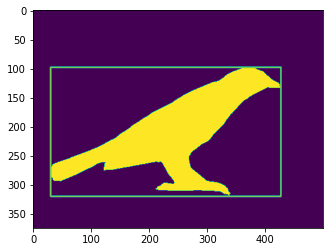

192-107-158-113


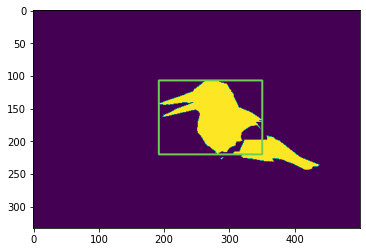

17-63-362-258


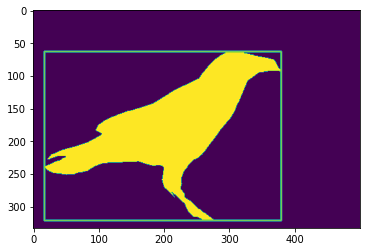

172-36-294-239


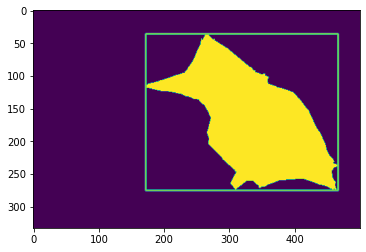

73-48-289-238


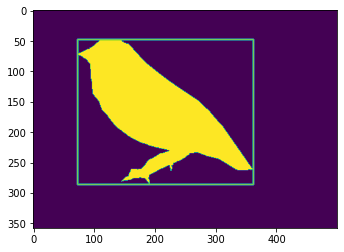

49-124-285-338


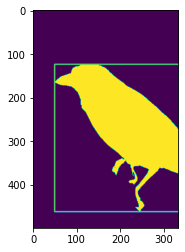

3-57-328-225


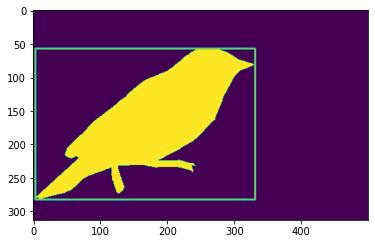

45-103-276-325


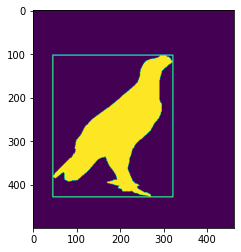

95-97-247-171


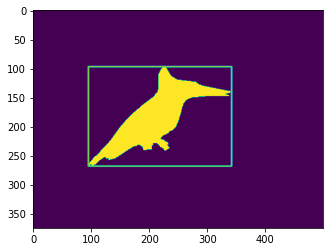

159-119-147-113


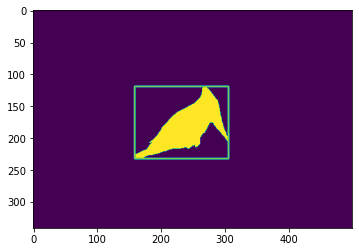

185-95-115-178


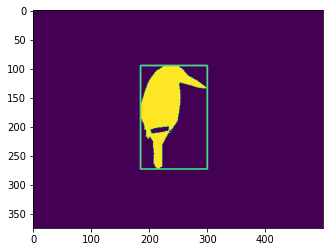

80-78-392-253


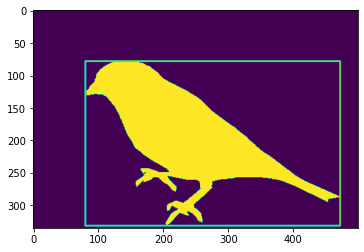

140-136-338-190


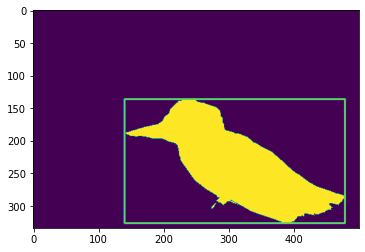

156-139-137-188


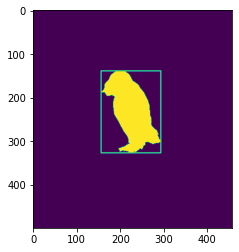

0-82-341-360


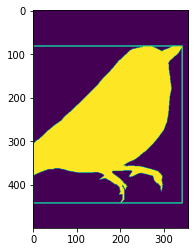

136-28-209-299


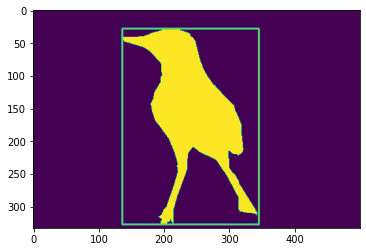

231-71-180-173


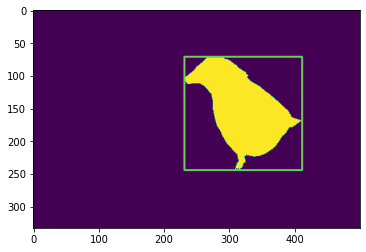

154-79-254-242


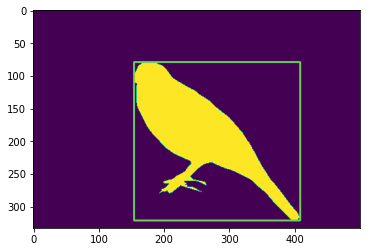

160-46-260-291


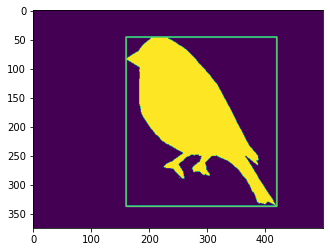

50-89-316-170


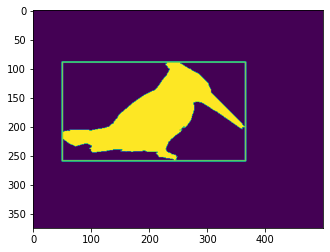

108-79-294-384


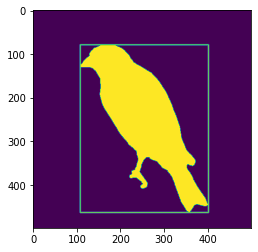

68-46-275-289


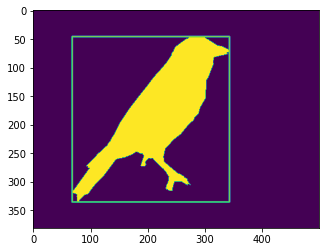

54-25-212-206


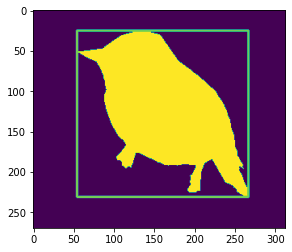

133-64-179-226


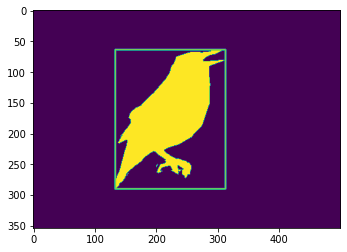

76-124-308-278


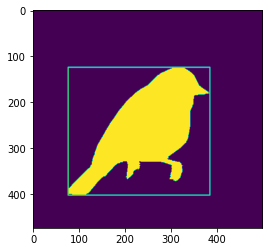

70-65-308-263


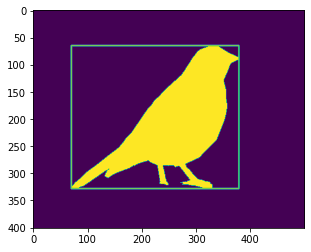

159-128-231-112


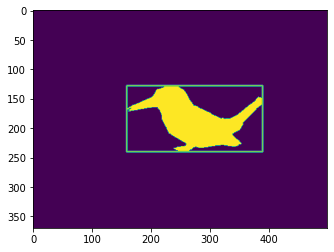

29-98-309-232


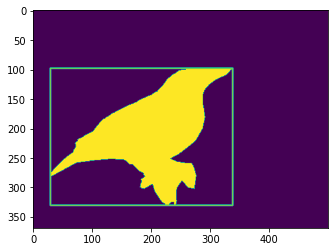

112-15-223-310


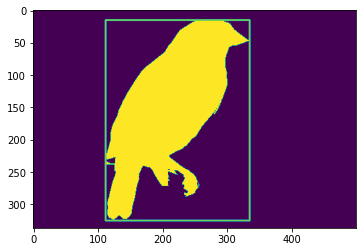

45-151-276-208


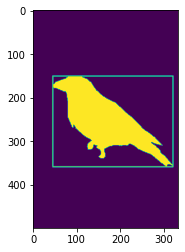

46-105-374-262


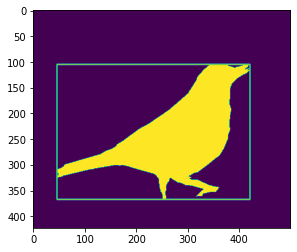

30-48-259-230


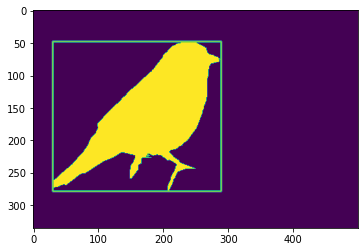

50-72-345-343


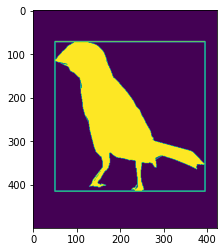

225-71-266-261


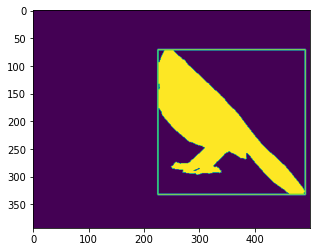

99-97-397-375


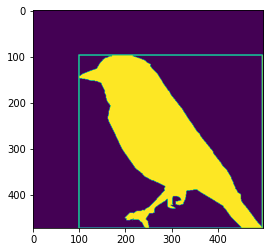

126-76-289-222


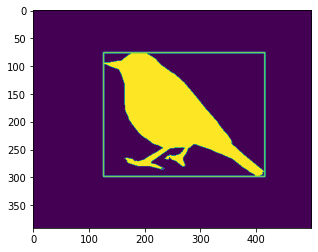

167-27-319-256


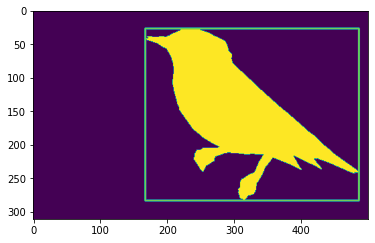

47-139-348-223


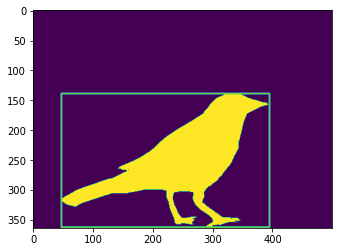

128-100-315-286


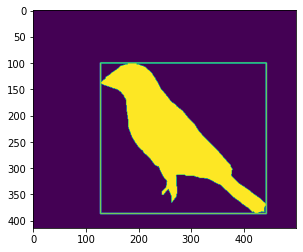

184-36-251-285


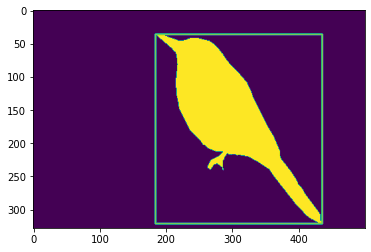

169-74-255-199


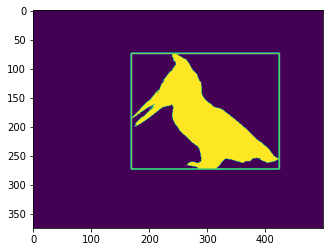

106-73-326-260


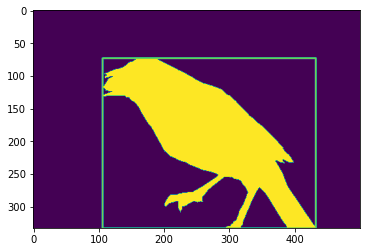

31-15-386-265


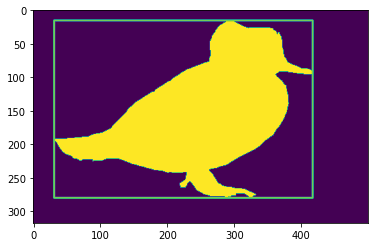

69-129-238-270


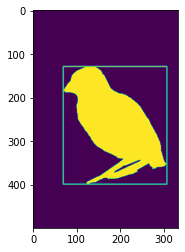

63-35-288-284


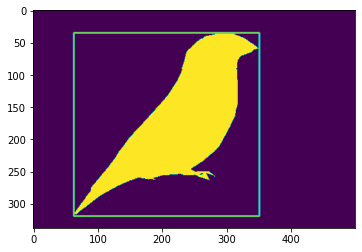

166-143-128-98


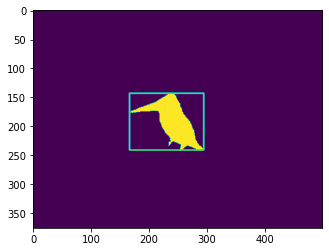

38-58-366-296


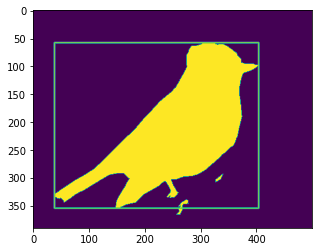

170-54-313-311


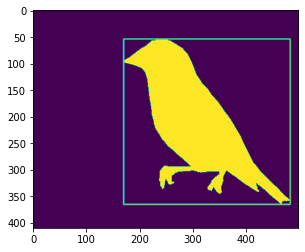

27-59-304-243


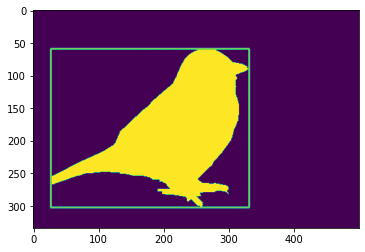

23-124-313-278


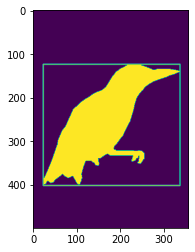

4-143-354-306


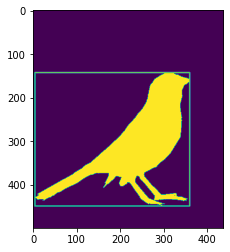

48-26-341-283


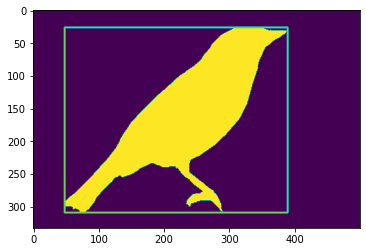

19-26-458-312


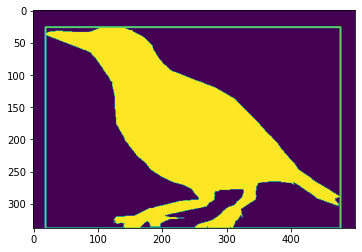

102-68-287-198


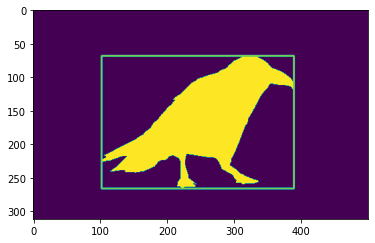

118-122-204-223


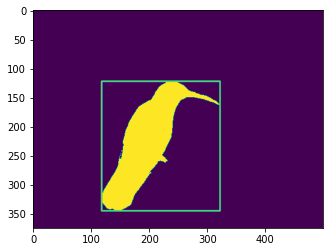

230-114-201-126


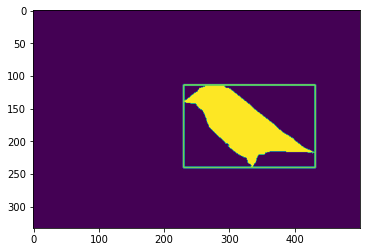

0-84-340-283


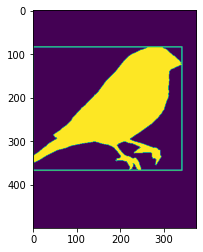

237-90-209-141


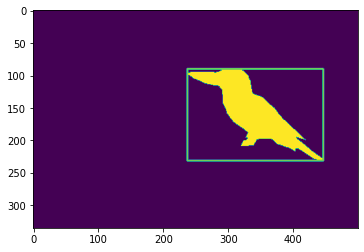

14-16-452-304


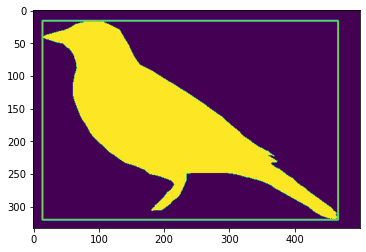

134-89-348-195


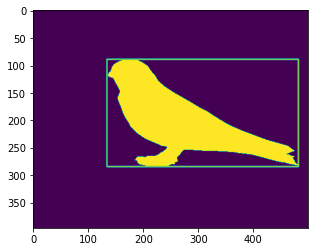

44-104-251-310


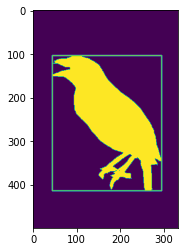

100-114-268-331


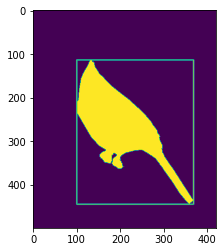

165-60-266-276


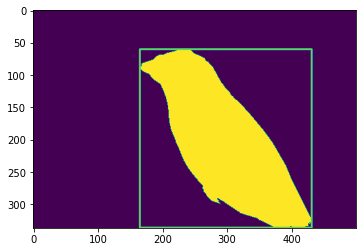

5-58-365-279


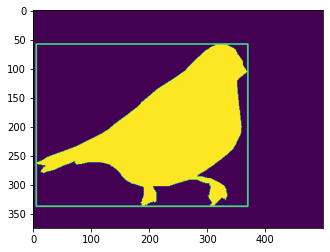

178-118-148-124


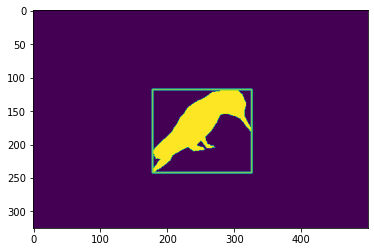

174-122-284-205


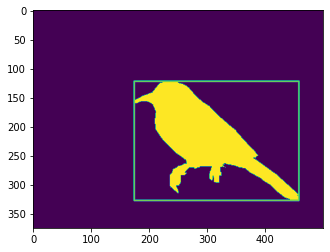

103-68-274-234


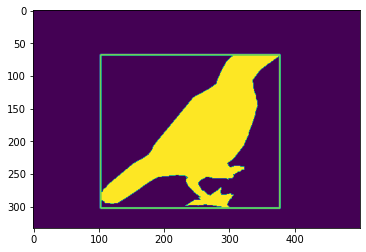

130-92-340-216


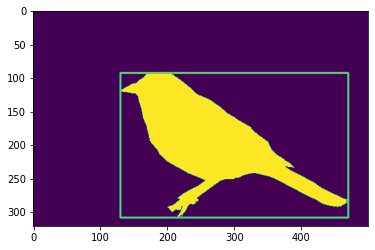

48-92-261-198


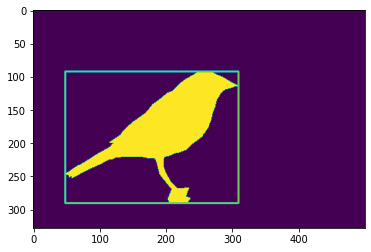

30-53-314-218


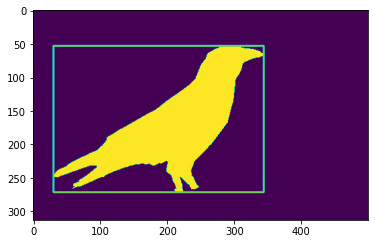

93-95-276-160


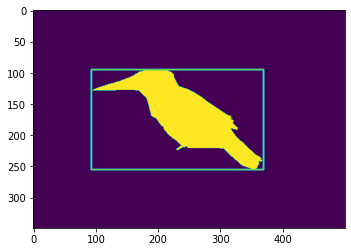

39-57-303-177


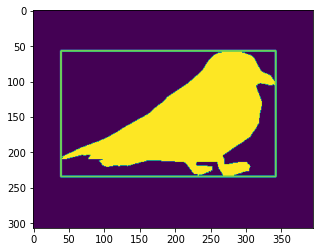

188-117-230-212


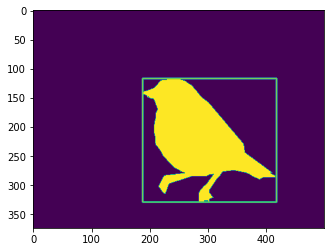

99-65-349-247


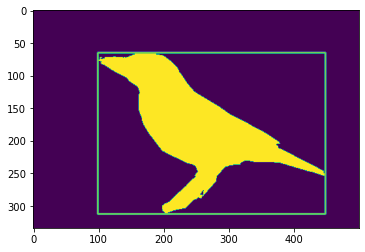

165-103-311-179


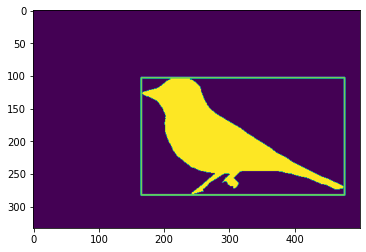

In [7]:
w_lst = []
h_lst = []
for name in test_masks:
    mask = cv2.imread(str(dataset_path /  'train/masks/' / name))
    img = mask / mask.max()
    img = img[:,:,0]
    img = np.where(img>0.5, 1, 0)
    img = img*255
    im = np.array(img, dtype=np.uint8)
    gray = im
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    idx =0 
    if contours is not ():
        cnt = contours[-1]
        idx += 1
        x,y,w,h = cv2.boundingRect(cnt)
        w_lst.append(w)
        h_lst.append(h)
        print(f'{x}-{y}-{w}-{h}')
        roi=im[y:y+h,x:x+w]
        cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
    plt.imshow(im)
    plt.show()

### MNIST

In [2]:
dataset_path = Path('/home/e_radionova/Datasets/MNIST_multiclass/5classes_4per-image')
folds = os.listdir(dataset_path)
folds

['train_y.npy', 'train_x.npy', 'test_x.npy', 'test_y.npy']

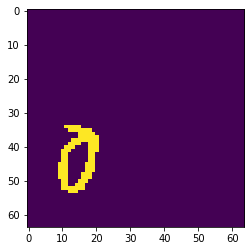

In [3]:
a = np.load(dataset_path / 'train_y.npy')
img = a[0][:,:,0]
img = np.where(img>0.5, 1, 0)
img = img*255
plt.imshow(img)

9-34-12-20


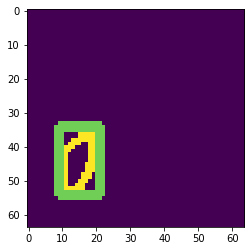

In [4]:
im = np.array(img, dtype=np.uint8)
gray=im
contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
idx =0 
cnt = contours[-1]
idx += 1
x,y,w,h = cv2.boundingRect(cnt)
print(f'{x}-{y}-{w}-{h}')
roi=im[y:y+h,x:x+w]
#     cv2.imwrite(str(idx) + '.jpg', roi)
cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
plt.imshow(im)

35-40-10-20


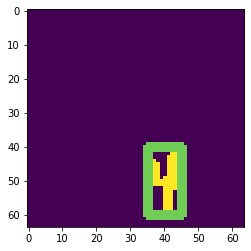

34-12-17-20


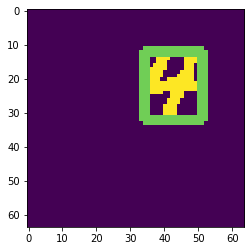

33-27-13-20


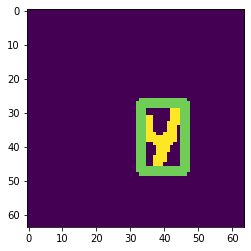

23-13-18-20


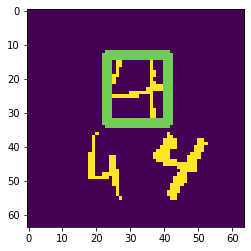

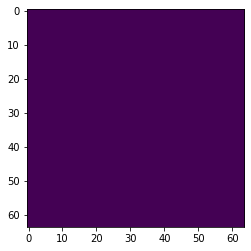

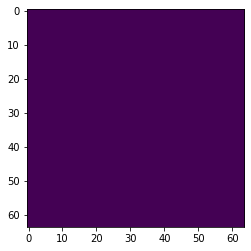

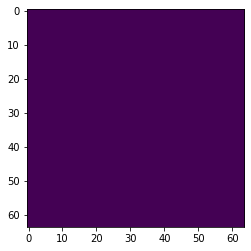

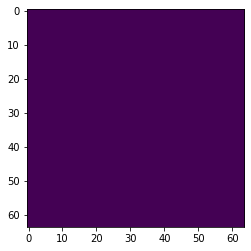

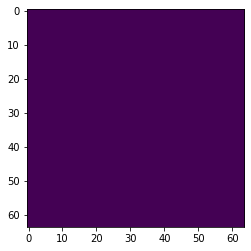

23-31-36-27


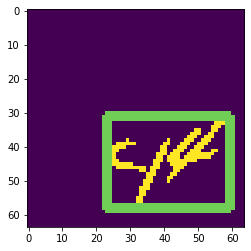

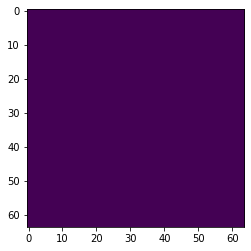

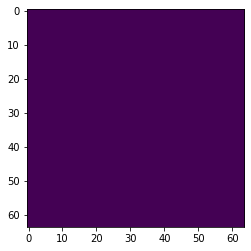

41-25-16-20


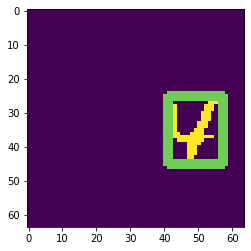

22-7-16-20


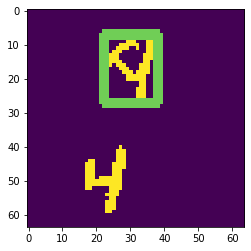

11-17-14-20


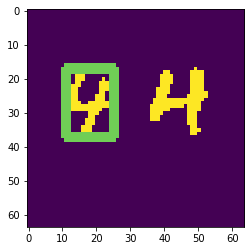

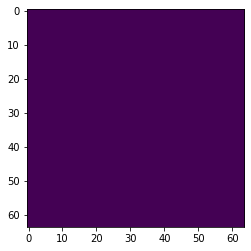

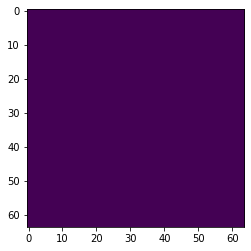

9-30-18-20


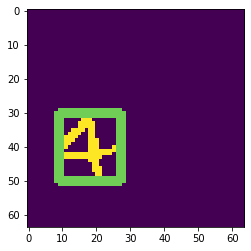

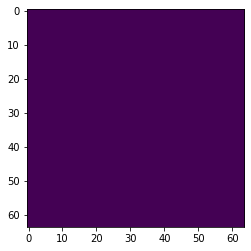

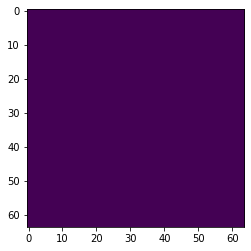

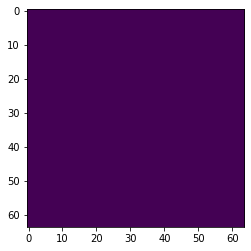

6-3-15-20


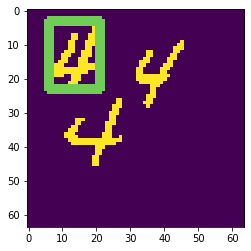

6-9-20-16


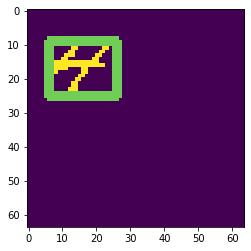

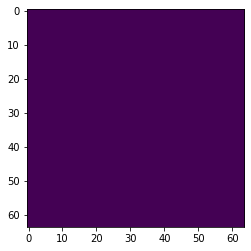

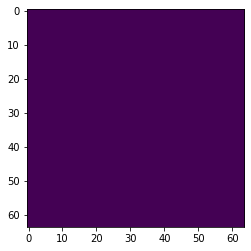

38-7-20-17


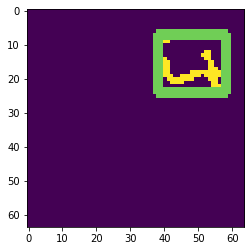

13-9-16-20


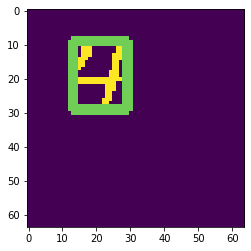

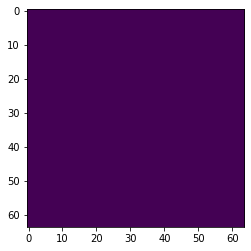

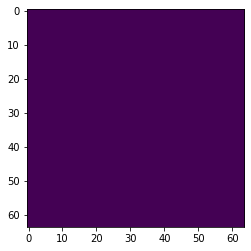

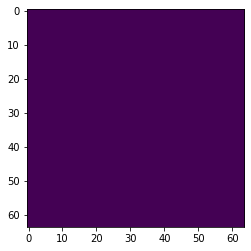

6-40-15-20


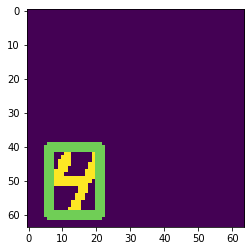

33-36-20-17


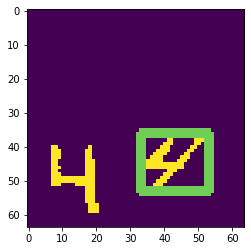

38-20-20-17


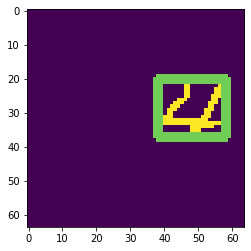

35-6-20-20


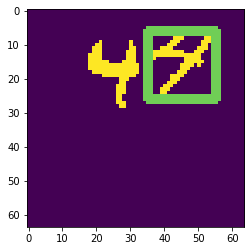

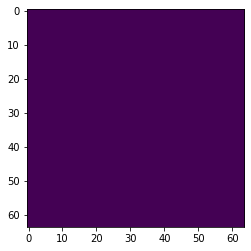

42-16-15-20


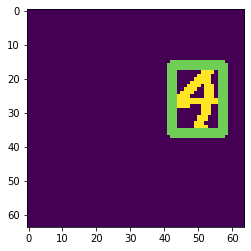

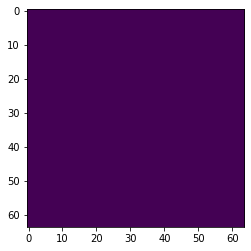

10-37-12-20


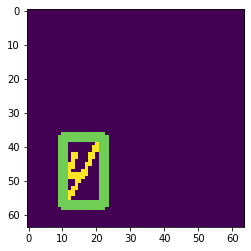

8-33-11-20


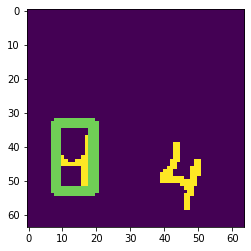

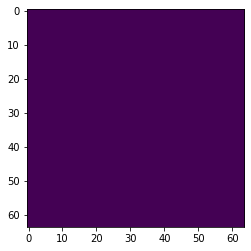

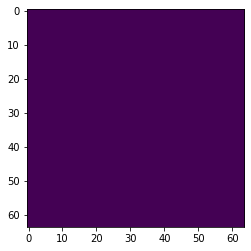

16-14-16-20


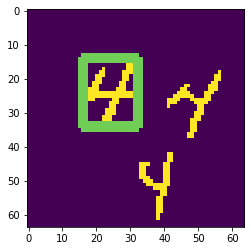

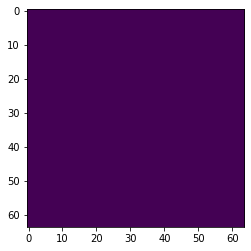

43-38-15-20


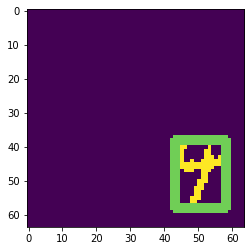

8-26-18-20


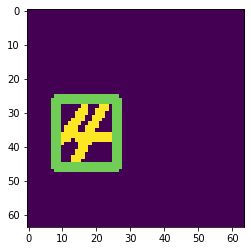

40-16-17-20


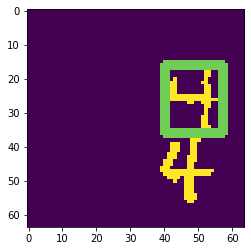

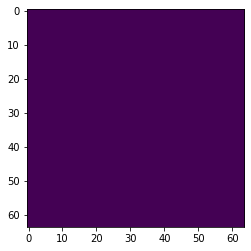

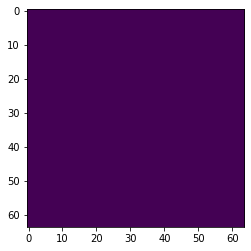

10-15-15-20


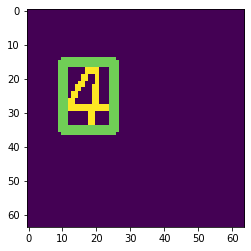

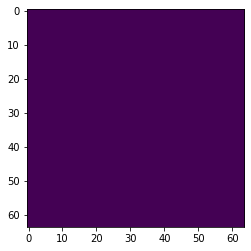

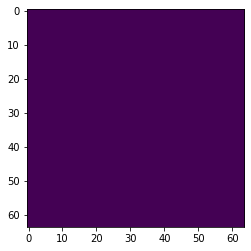

41-11-13-20


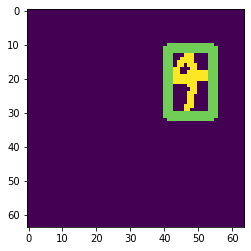

40-38-20-20


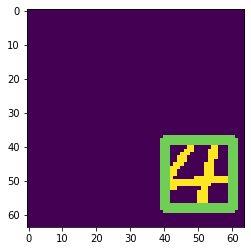

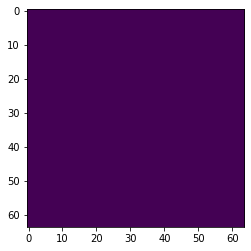

38-29-14-20


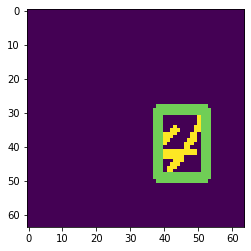

17-14-20-19


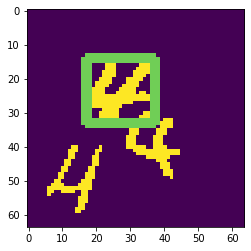

18-39-18-20


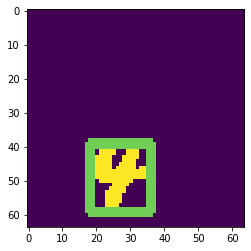

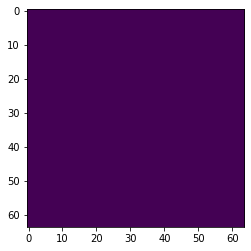

40-6-15-20


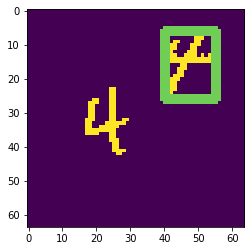

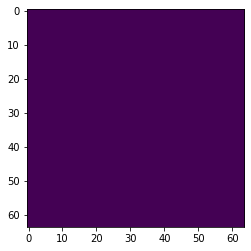

40-5-12-20


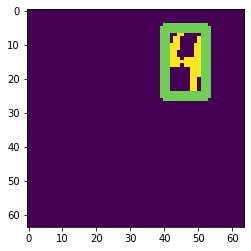

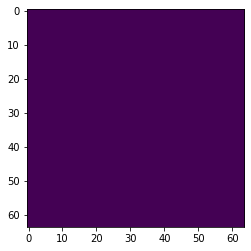

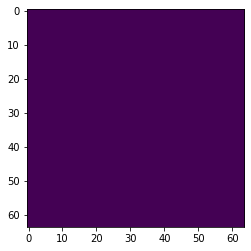

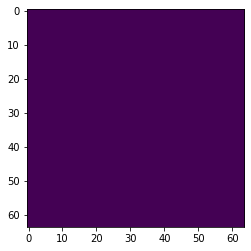

13-10-20-20


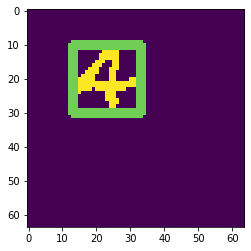

42-15-14-20


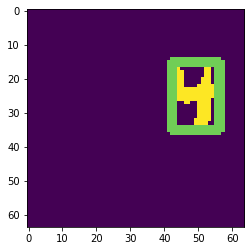

11-6-16-20


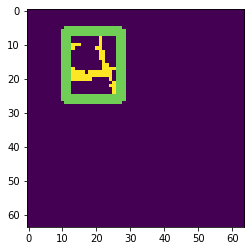

18-21-9-20


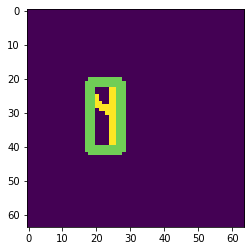

19-5-31-40


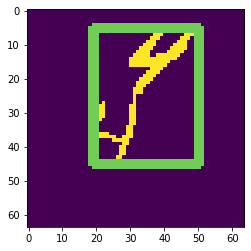

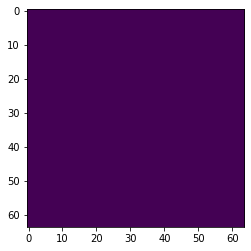

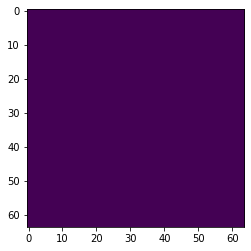

10-5-12-20


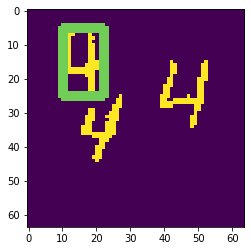

9-5-10-20


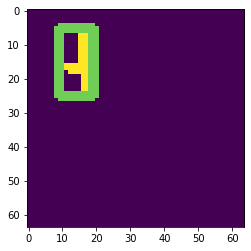

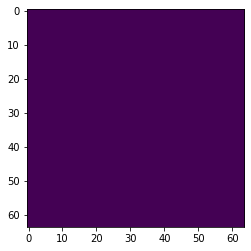

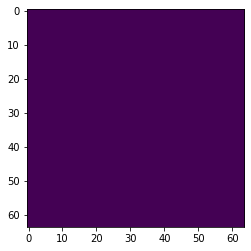

12-24-29-32


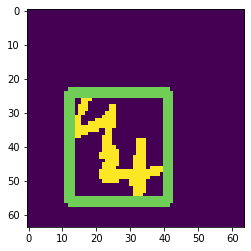

15-32-14-20


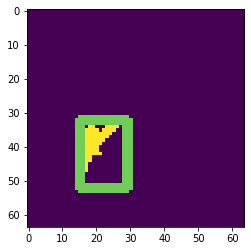

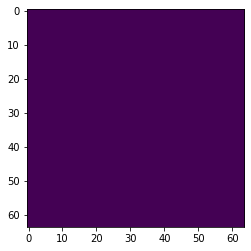

42-35-16-20


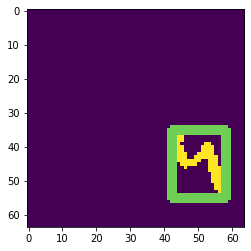

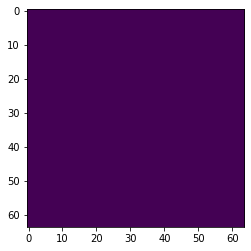

23-18-8-20


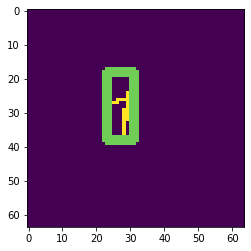

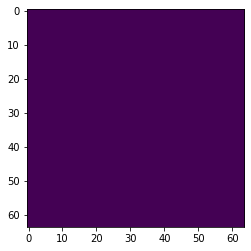

37-30-14-20


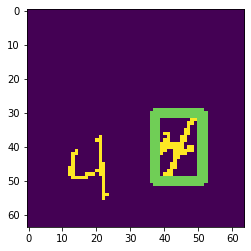

31-6-13-20


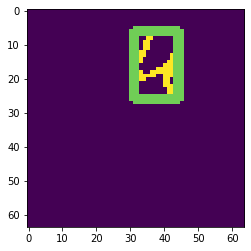

40-19-14-20


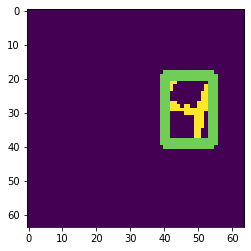

12-7-24-36


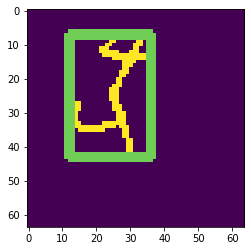

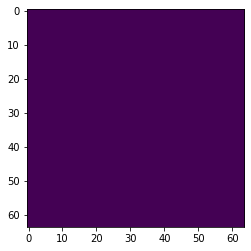

42-39-13-20


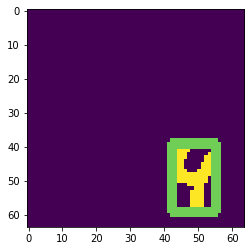

13-8-18-20


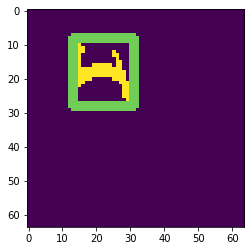

44-18-10-20


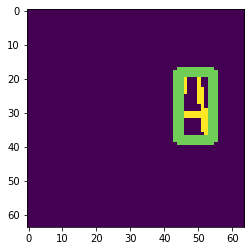

44-21-8-20


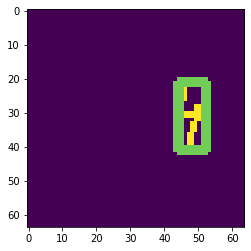

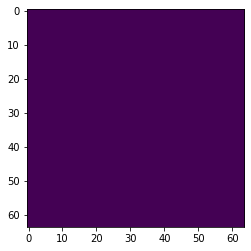

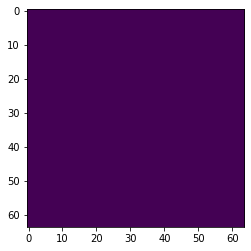

35-6-21-40


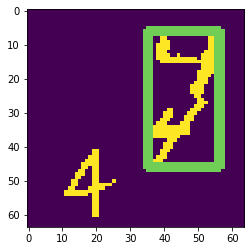

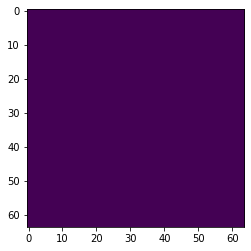

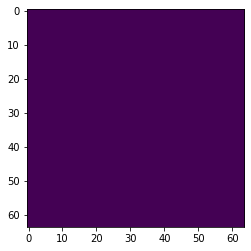

28-7-20-18


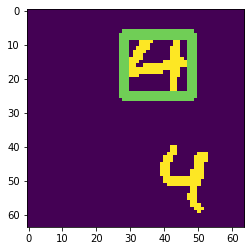

10-17-19-20


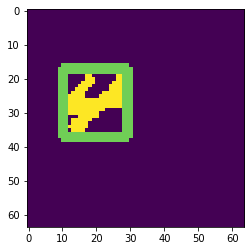

14-13-13-20


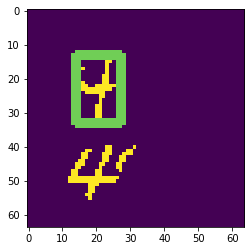

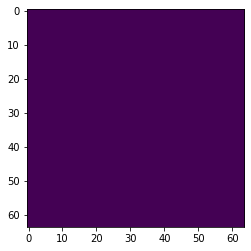

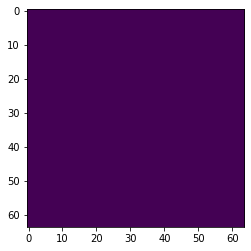

32-11-11-20


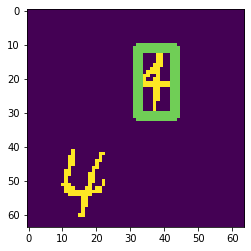

40-29-10-20


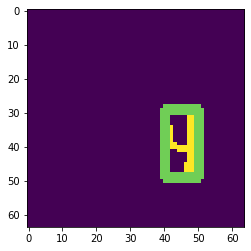

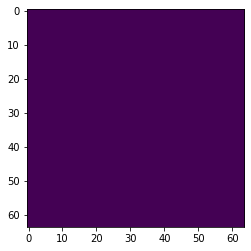

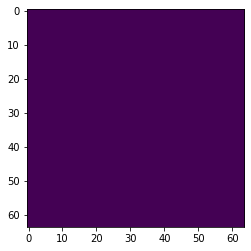

41-36-16-20


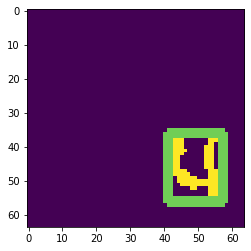

7-27-20-19


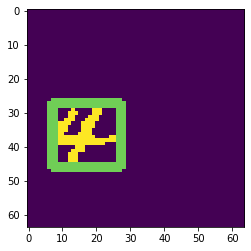

15-7-12-20


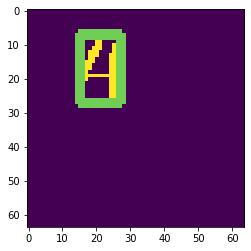

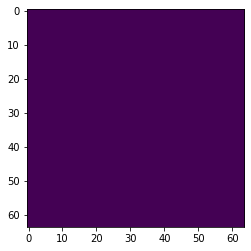

17-13-11-20


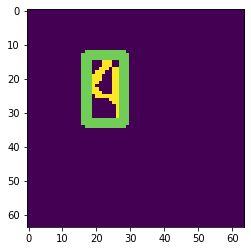

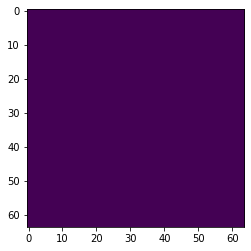

37-31-16-20


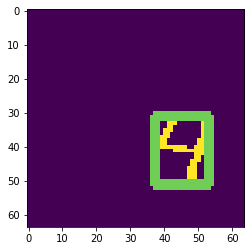

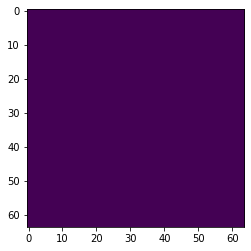

39-6-14-20


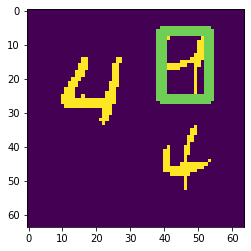

43-18-10-20


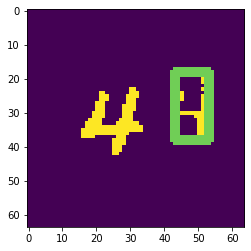

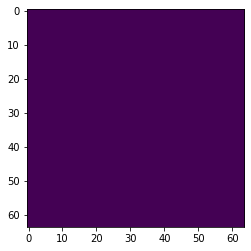

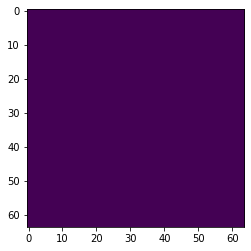

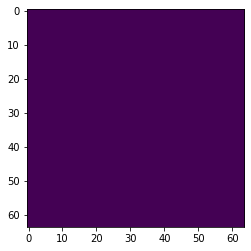

40-25-12-20


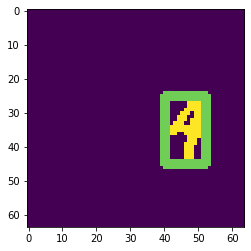

41-8-16-20


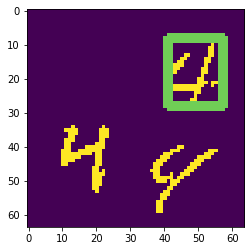

11-37-16-20


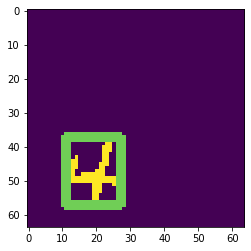

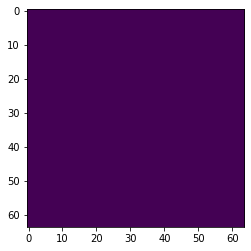

27-31-12-20


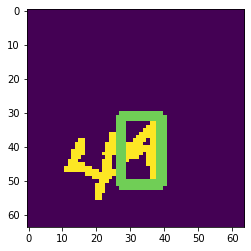

34-39-18-20


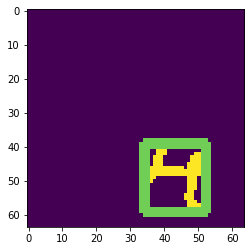

18-10-20-14


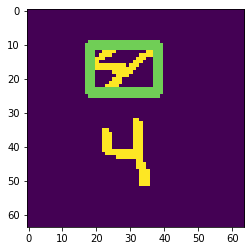

33-6-13-20


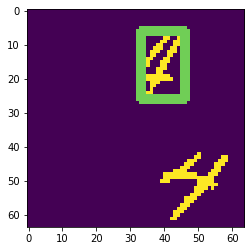

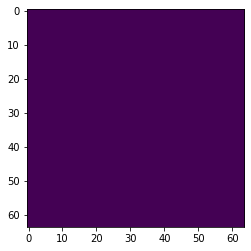

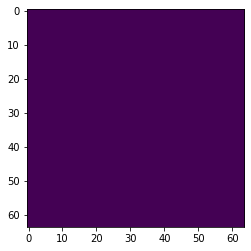

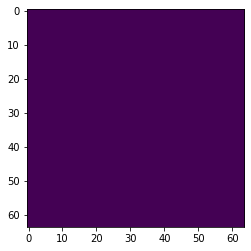

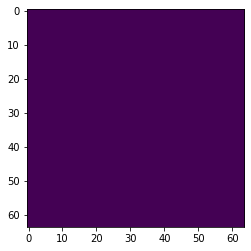

5-5-20-20


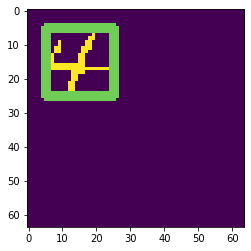

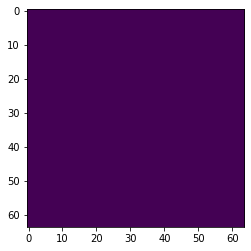

25-34-18-20


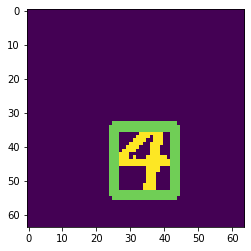

41-8-14-20


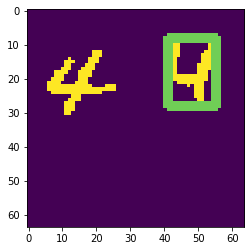

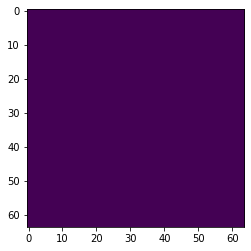

39-34-14-20


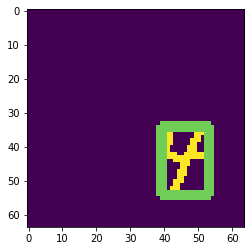

14-39-17-20


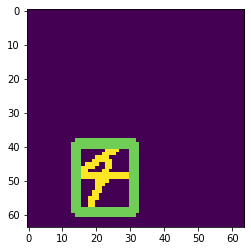

22-12-11-20


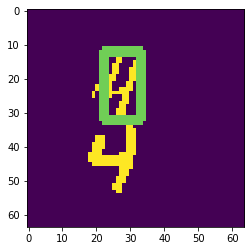

30-6-14-20


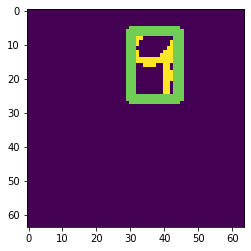

12-25-12-20


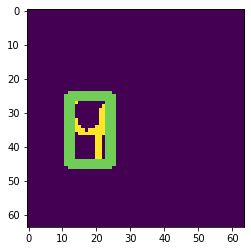

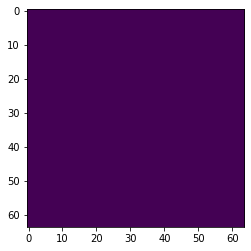

18-8-20-20


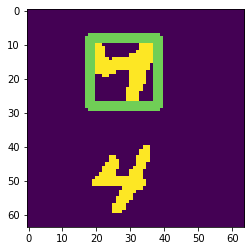

35-41-18-20


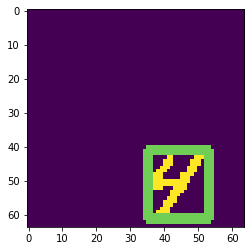

17-33-15-20


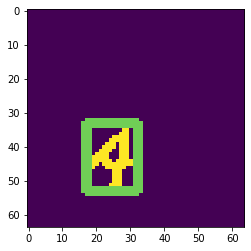

4-30-20-18


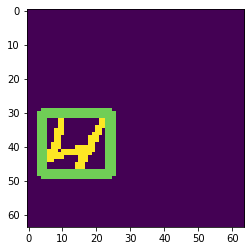

28-16-20-20


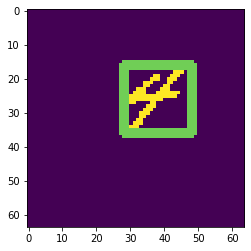

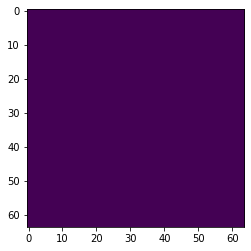

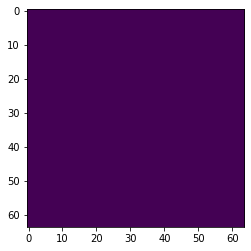

29-8-14-20


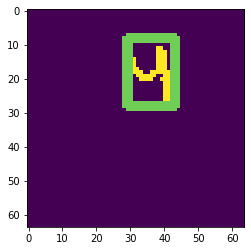

26-21-16-19


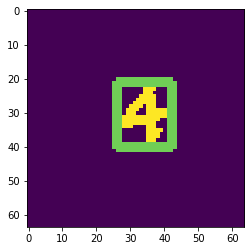

41-12-12-20


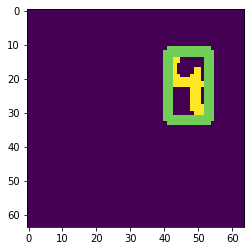

39-28-19-20


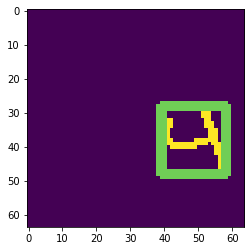

41-12-18-20


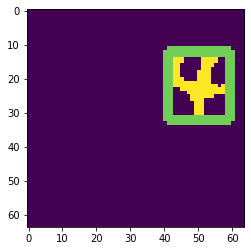

12-34-13-20


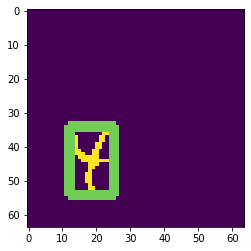

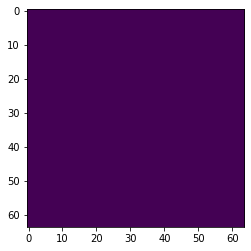

37-10-17-20


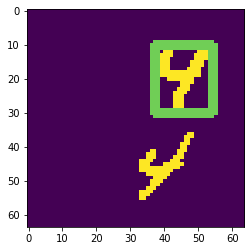

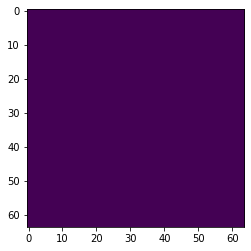

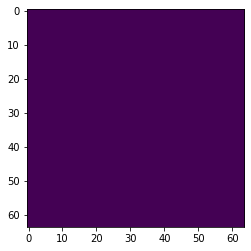

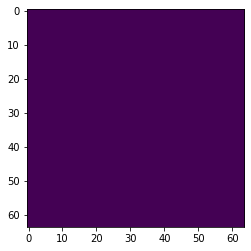

11-14-18-20


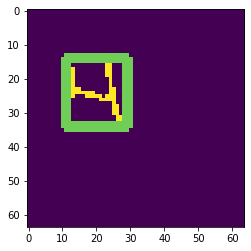

25-6-12-20


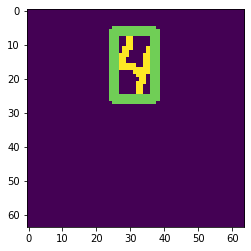

20-25-19-20


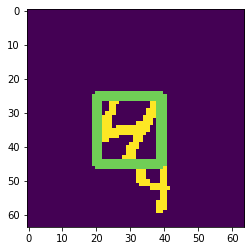

24-6-12-20


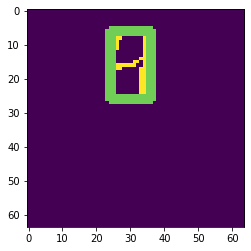

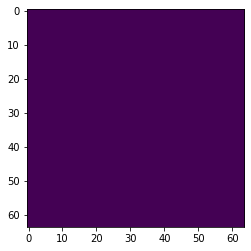

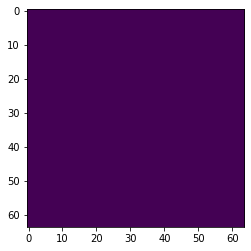

15-16-17-35


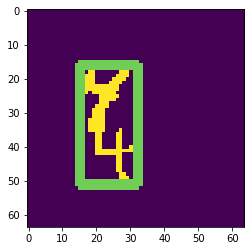

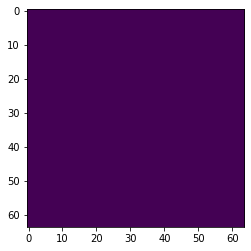

13-6-19-20


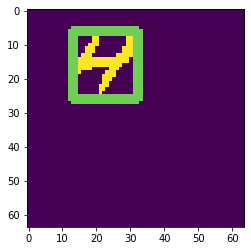

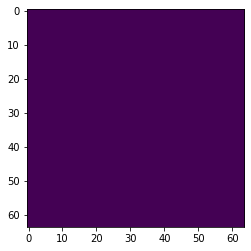

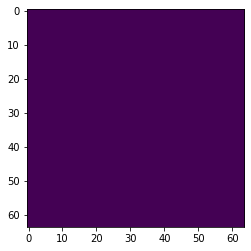

41-22-14-20


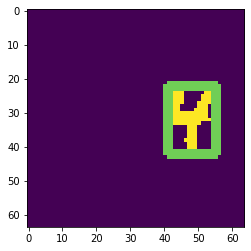

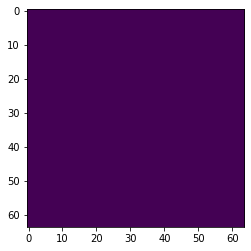

35-38-15-20


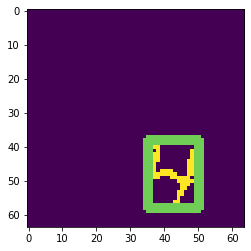

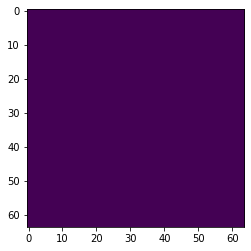

33-17-20-19


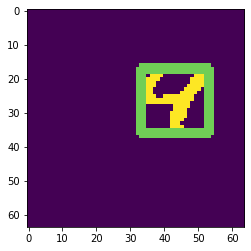

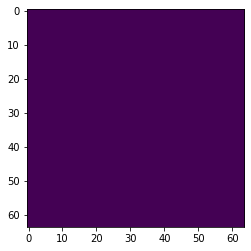

10-5-20-19


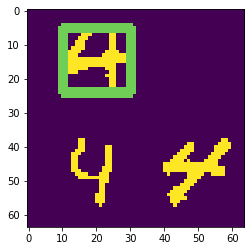

14-32-18-20


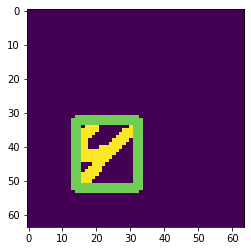

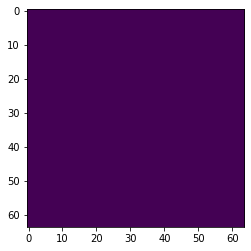

42-10-14-20


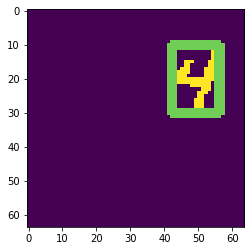

37-18-14-20


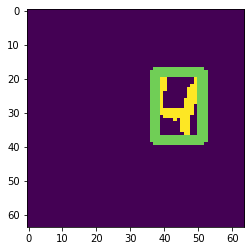

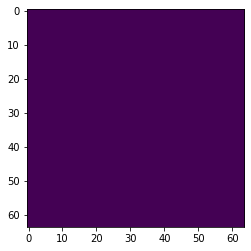

41-39-19-20


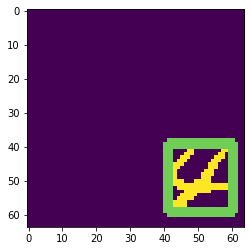

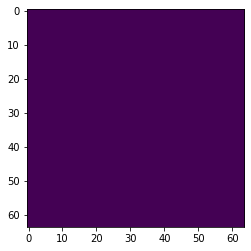

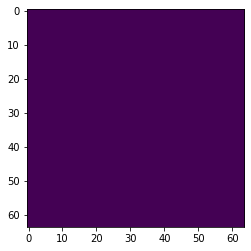

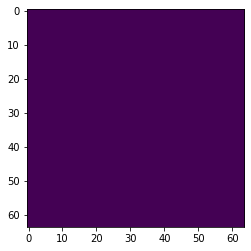

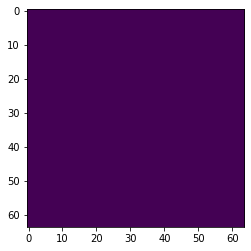

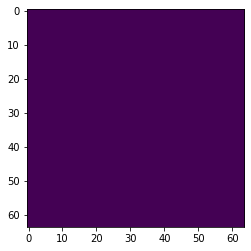

21-17-20-20


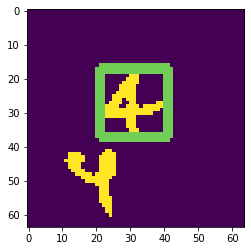

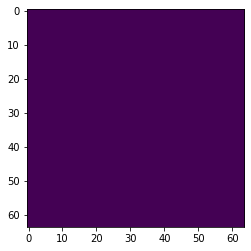

30-14-15-20


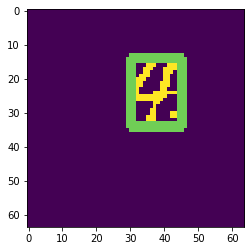

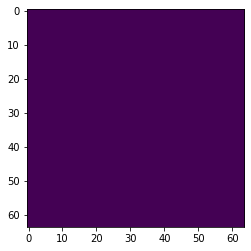

9-28-31-32


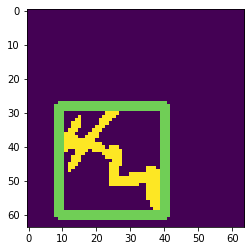

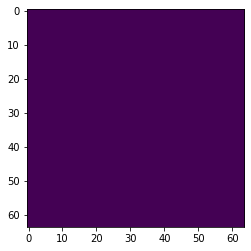

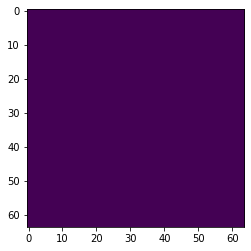

27-13-19-20


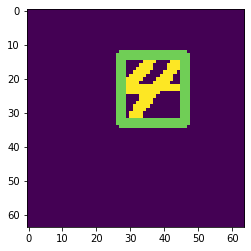

28-6-12-20


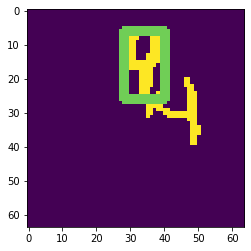

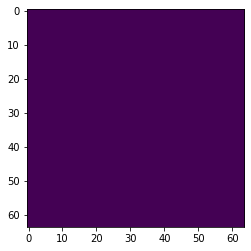

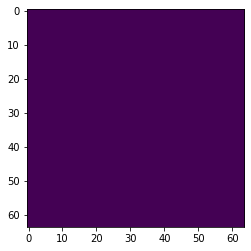

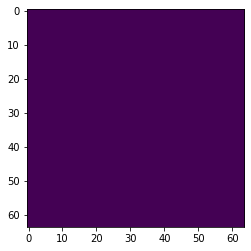

16-41-16-20


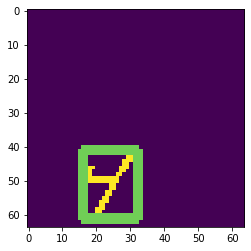

29-15-14-20


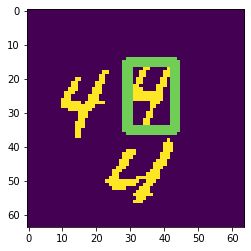

18-10-16-20


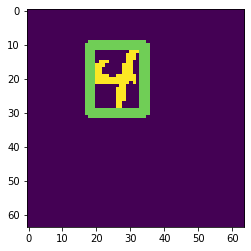

31-19-13-20


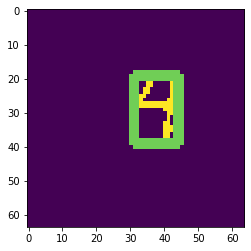

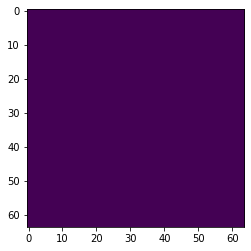

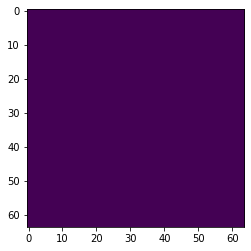

8-41-13-20


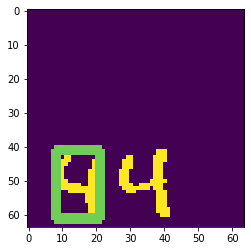

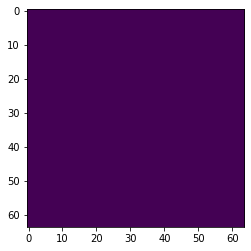

37-7-12-20


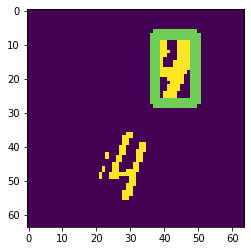

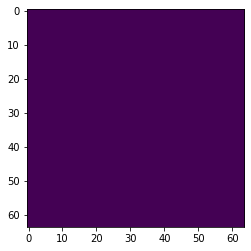

9-13-10-19


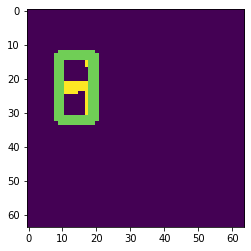

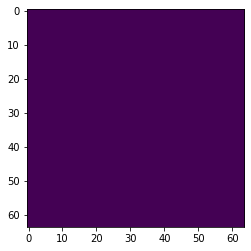

7-18-20-15


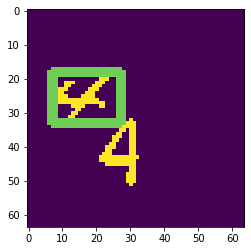

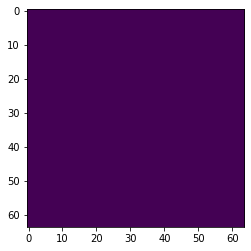

43-34-14-20


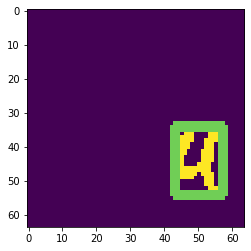

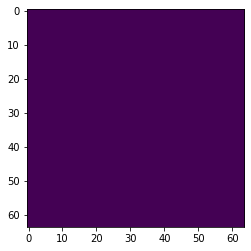

39-36-16-20


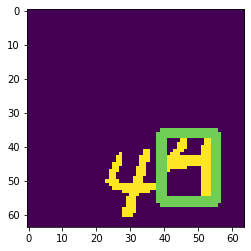

8-8-13-20


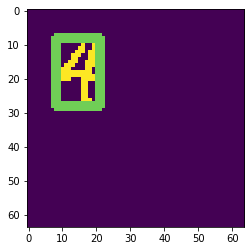

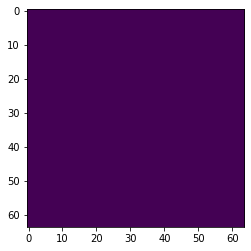

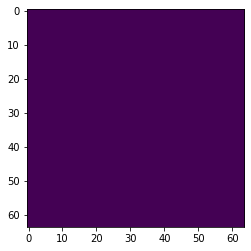

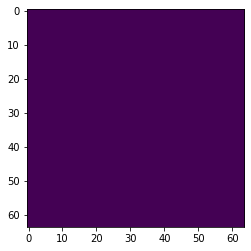

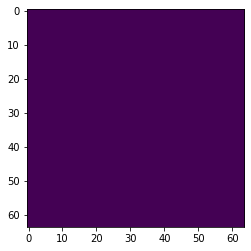

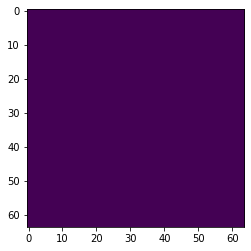

22-6-15-20


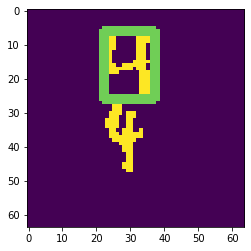

34-6-20-20


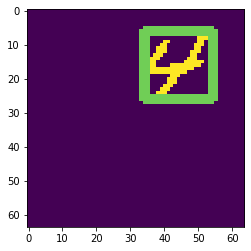

33-42-12-19


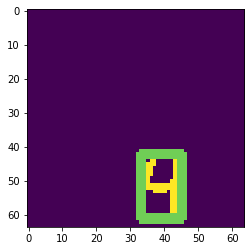

42-23-17-20


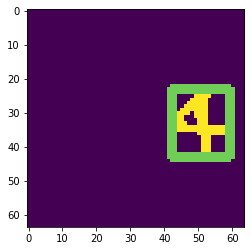

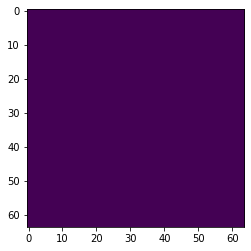

24-6-12-20


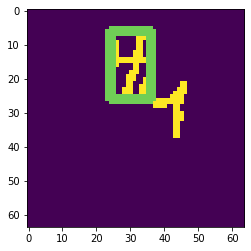

28-16-23-34


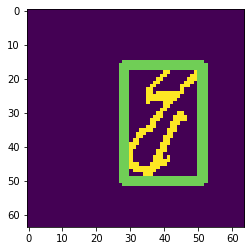

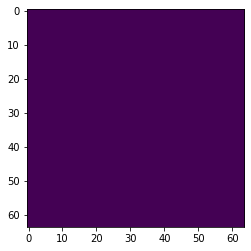

55-11-3-6


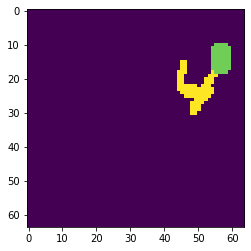

9-30-12-20


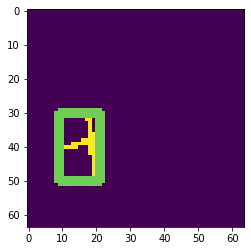

37-7-13-20


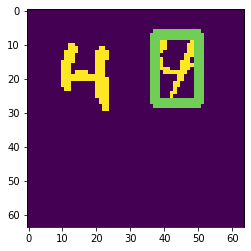

13-36-12-20


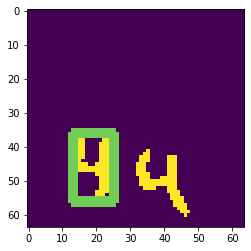

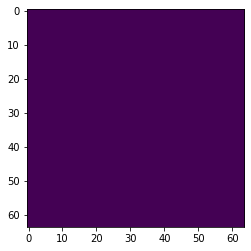

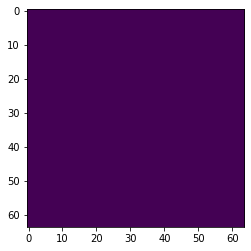

22-39-10-20


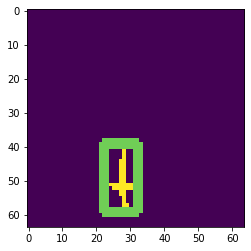

20-9-20-18


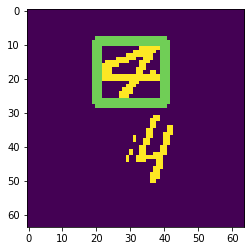

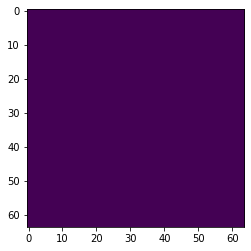

16-37-20-18


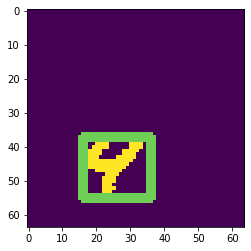

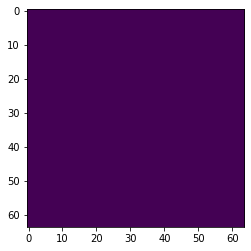

15-33-16-20


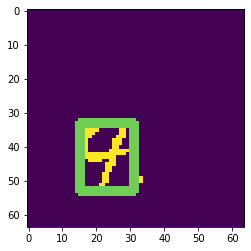

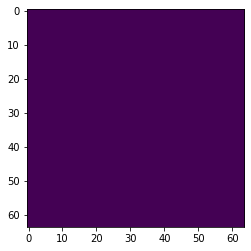

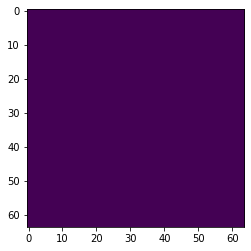

44-24-12-20


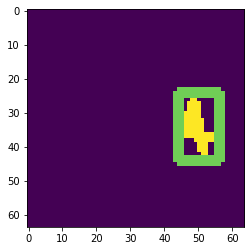

24-8-13-20


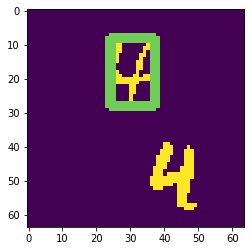

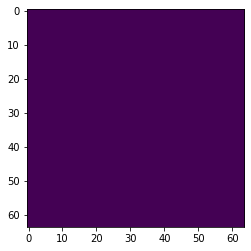

30-29-13-20


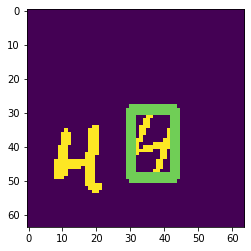

39-18-14-20


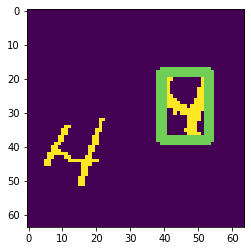

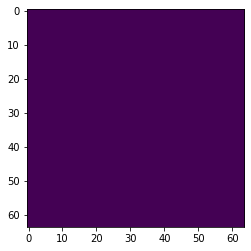

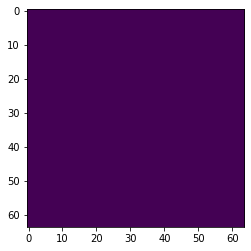

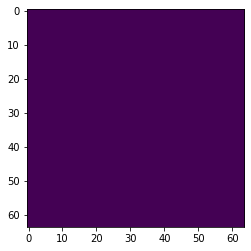

20-21-18-20


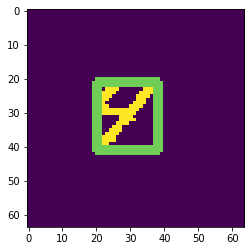

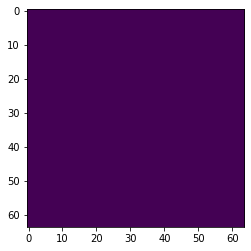

6-33-18-20


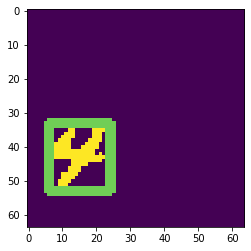

31-16-11-20


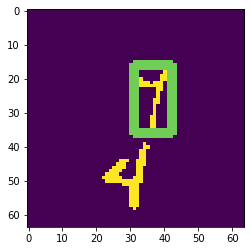

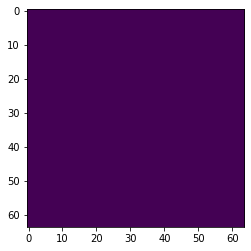

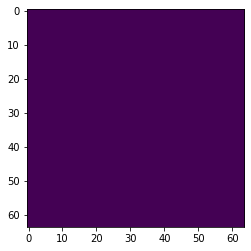

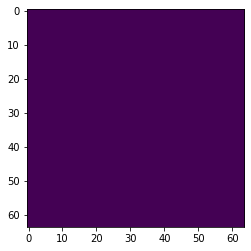

33-17-17-20


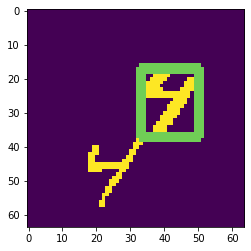

38-20-17-20


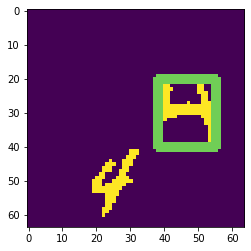

37-18-20-20


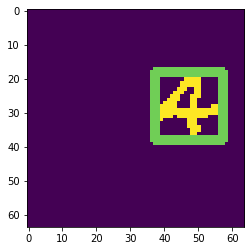

35-13-12-20


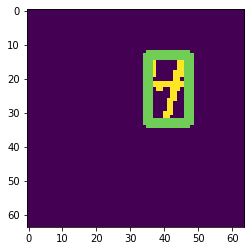

27-31-15-20


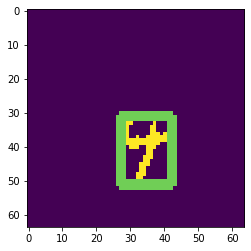

37-9-18-20


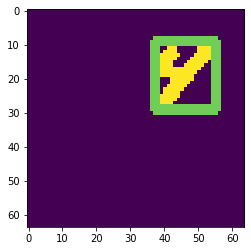

20-39-14-20


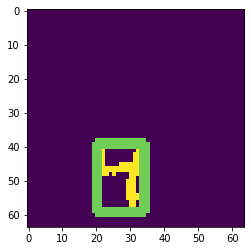

7-21-14-20


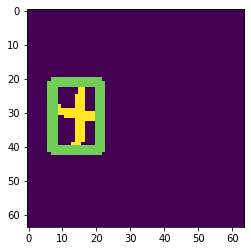

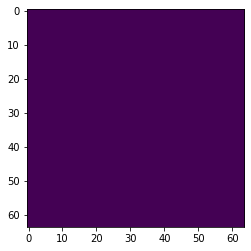

40-12-20-18


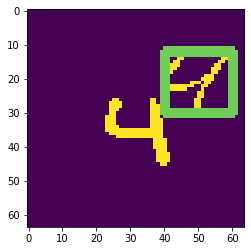

14-40-16-20


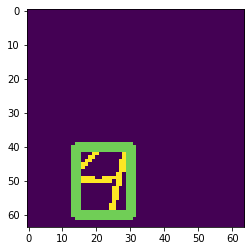

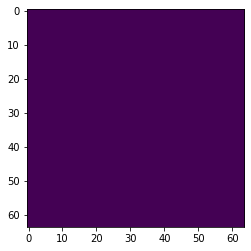

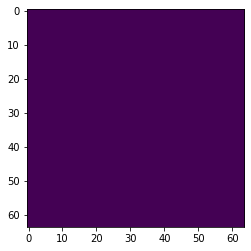

40-21-12-20


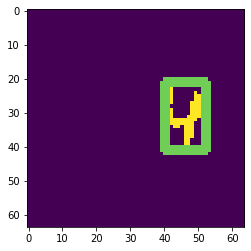

33-14-12-20


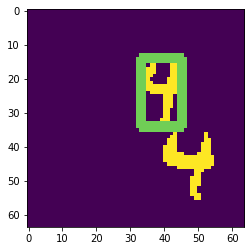

10-9-16-20


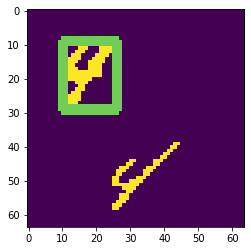

32-36-20-20


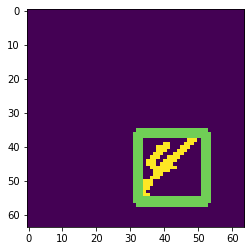

16-37-17-20


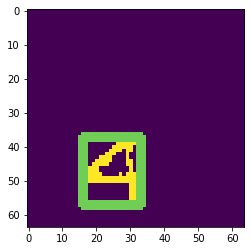

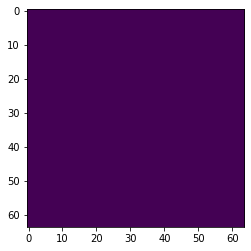

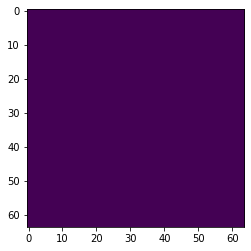

39-10-20-18


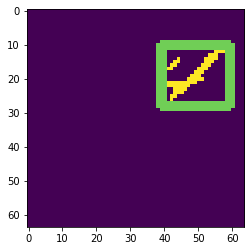

33-35-16-20


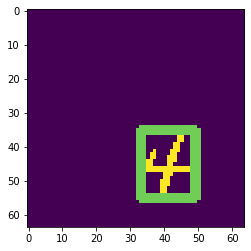

45-30-14-20


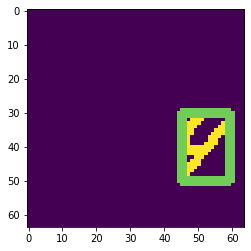

45-12-12-20


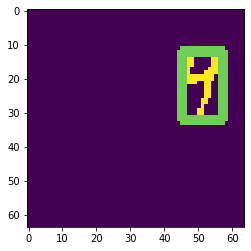

29-38-13-20


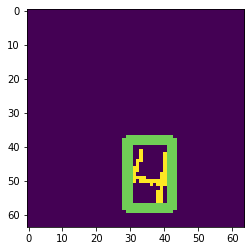

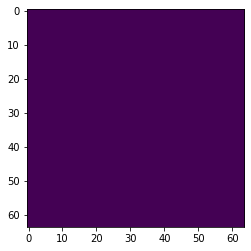

24-40-15-20


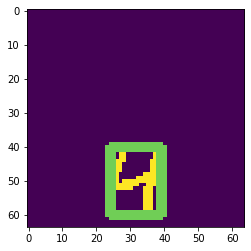

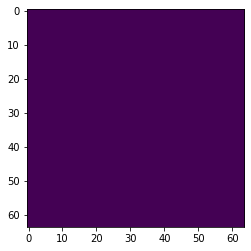

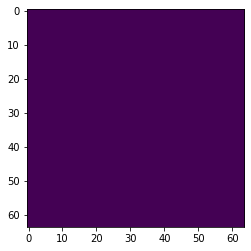

17-18-12-20


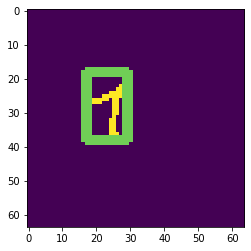

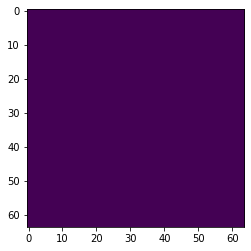

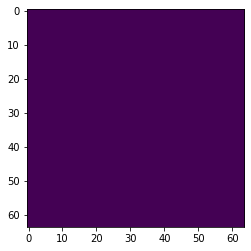

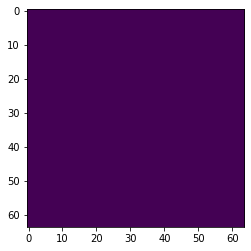

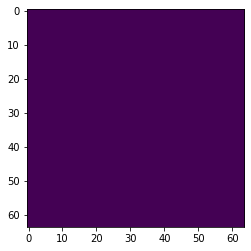

12-26-13-20


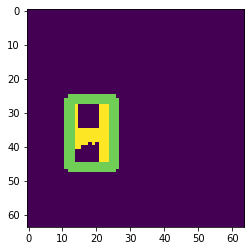

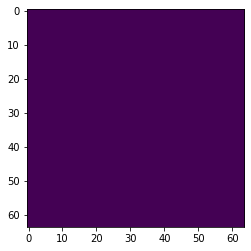

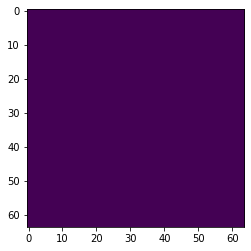

34-25-18-20


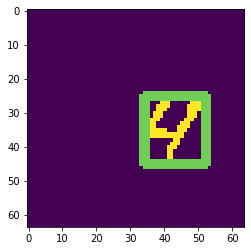

27-16-14-20


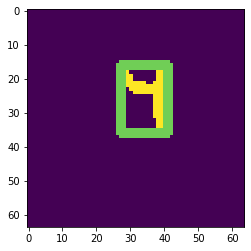

37-18-16-20


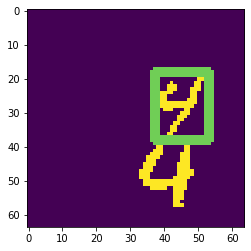

39-8-16-20


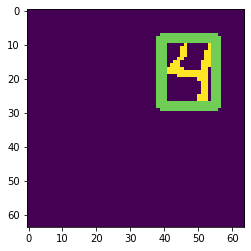

40-4-14-20


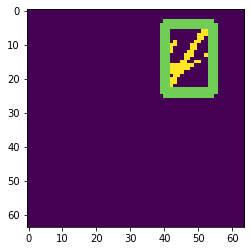

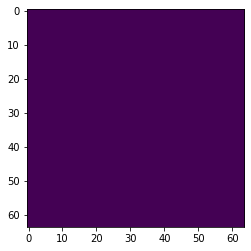

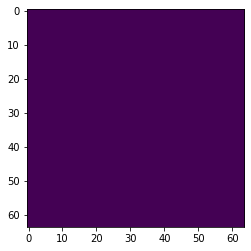

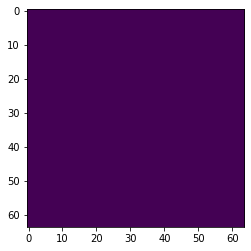

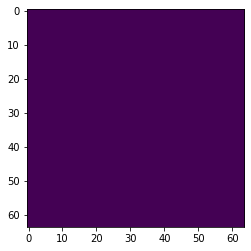

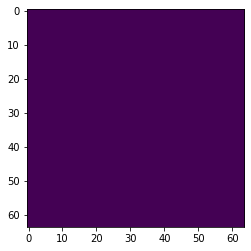

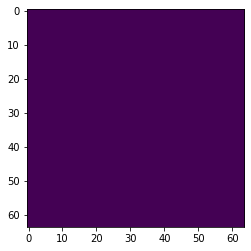

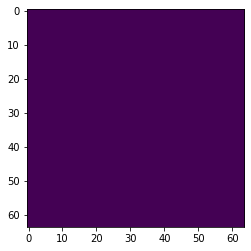

18-14-10-20


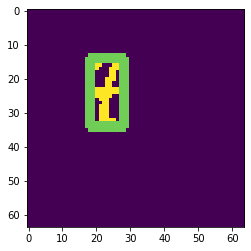

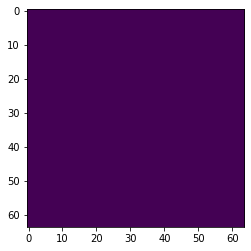

16-11-16-20


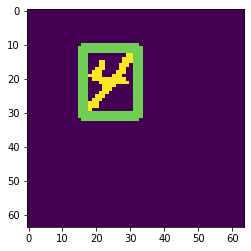

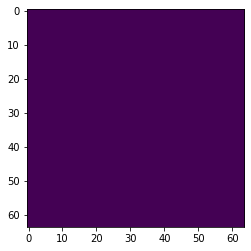

23-29-17-20


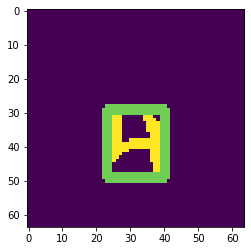

6-20-20-16


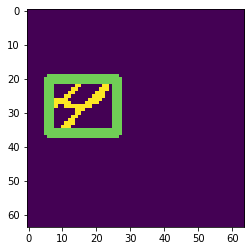

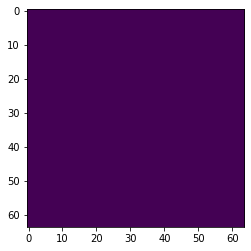

40-12-13-20


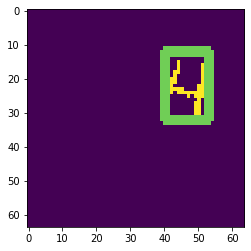

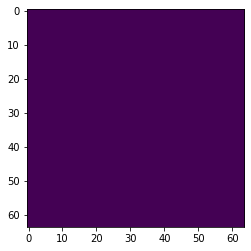

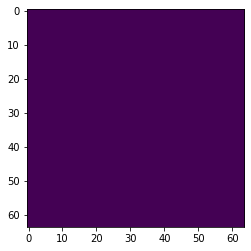

45-15-13-20


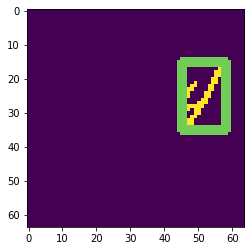

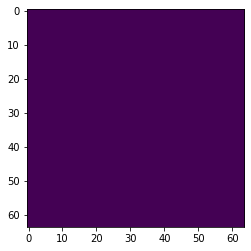

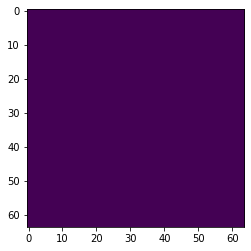

42-35-14-20


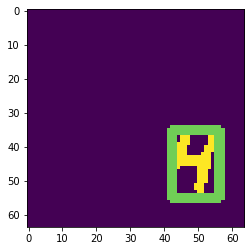

42-33-13-20


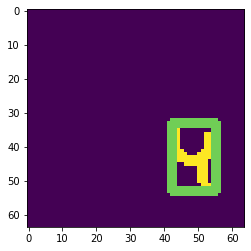

5-23-18-20


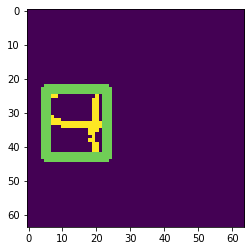

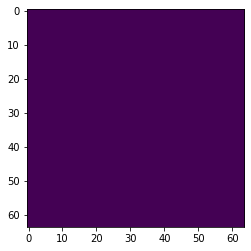

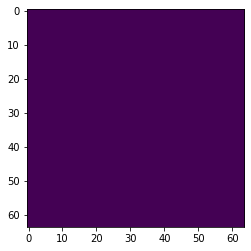

26-31-15-14


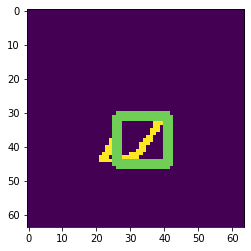

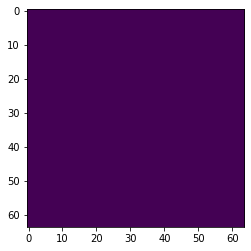

41-29-20-20


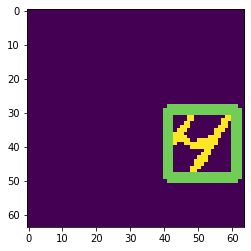

31-17-20-19


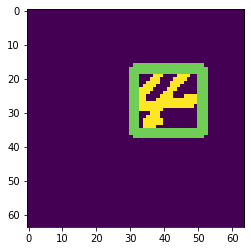

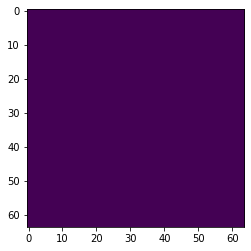

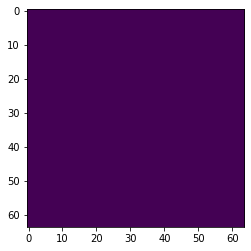

39-40-11-20


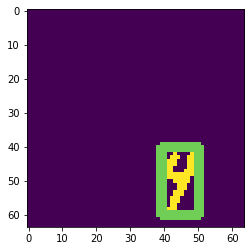

8-9-18-20


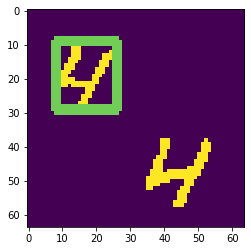

21-29-18-20


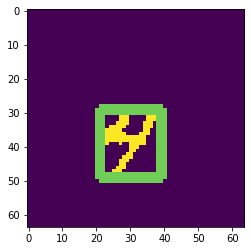

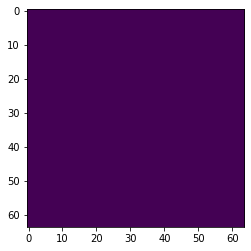

26-17-12-20


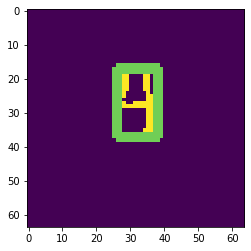

37-37-14-20


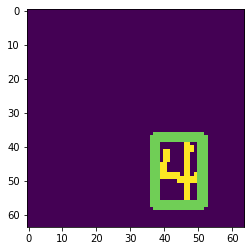

15-38-12-20


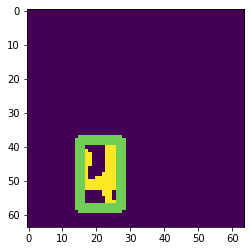

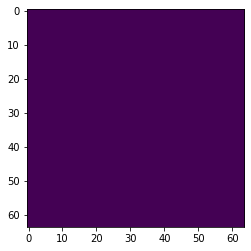

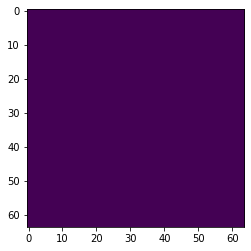

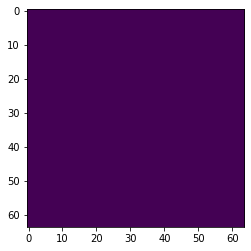

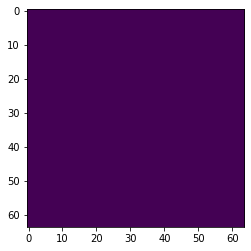

40-18-14-20


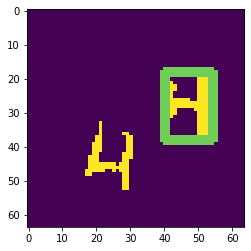

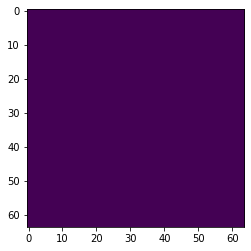

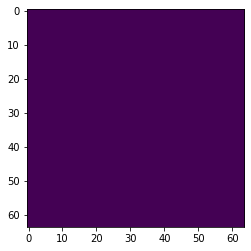

36-11-12-20


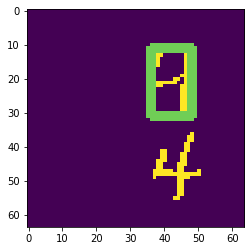

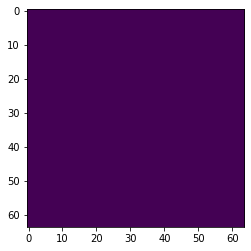

33-13-15-20


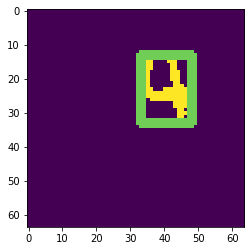

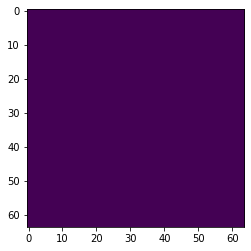

40-27-14-20


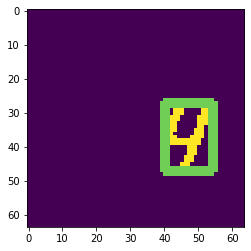

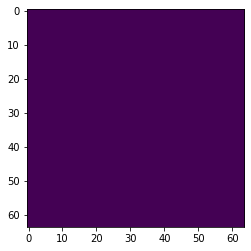

10-40-14-20


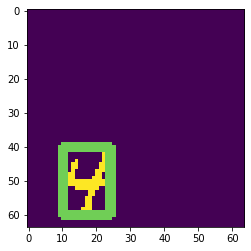

29-17-14-20


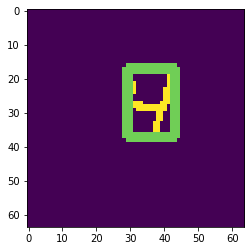

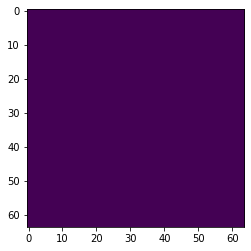

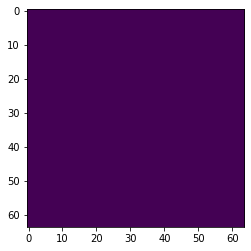

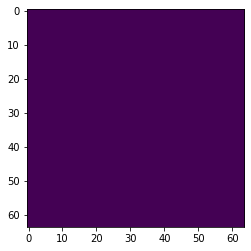

21-19-12-20


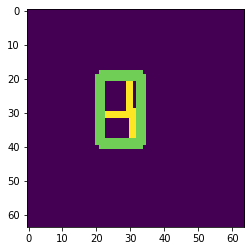

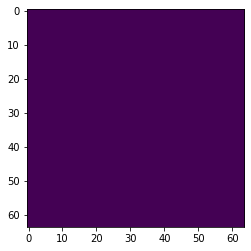

21-26-12-20


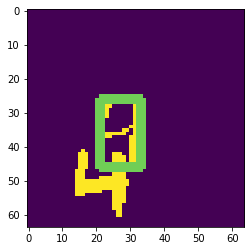

32-8-16-20


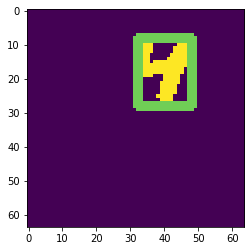

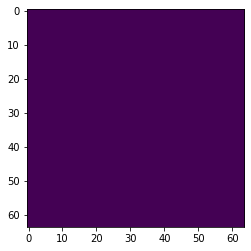

39-19-18-20


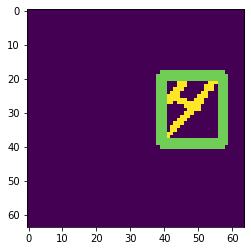

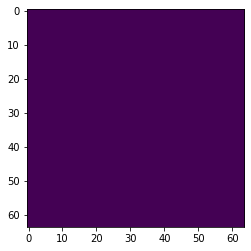

26-3-15-20


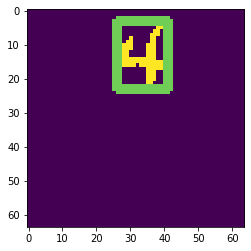

18-36-18-20


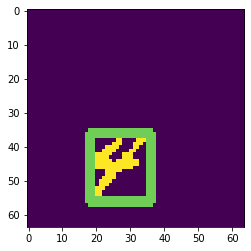

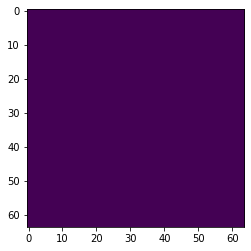

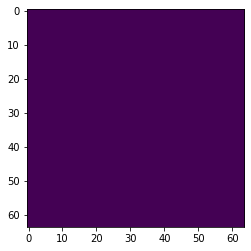

42-10-8-20


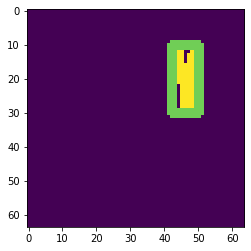

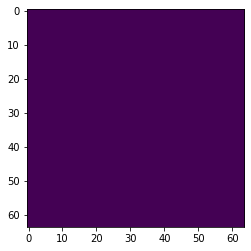

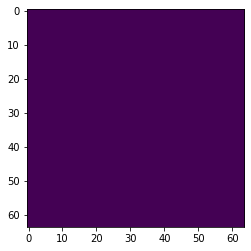

39-5-14-20


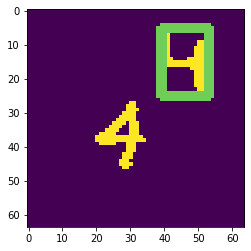

38-27-16-20


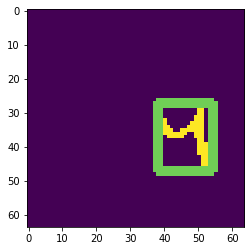

33-37-16-20


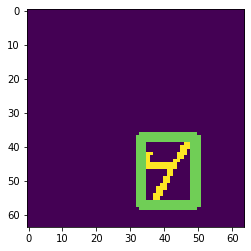

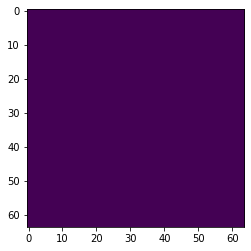

30-7-10-19


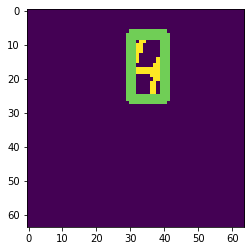

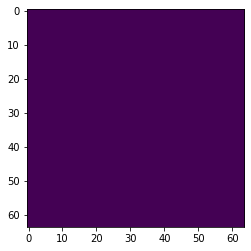

10-13-13-20


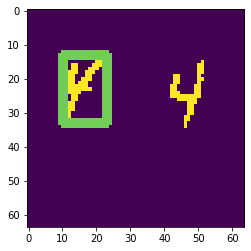

34-32-13-20


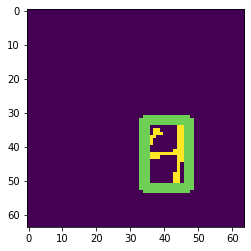

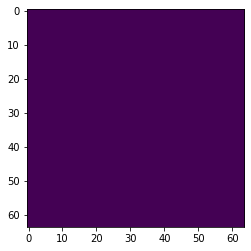

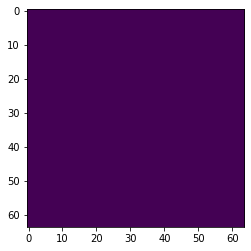

38-21-11-20


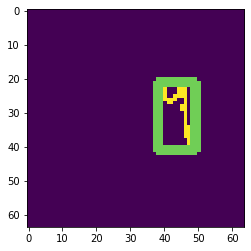

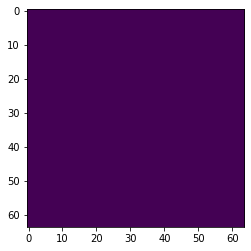

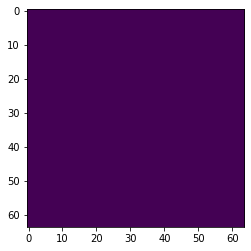

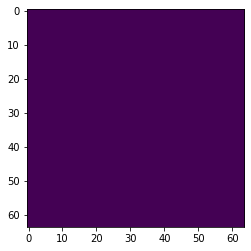

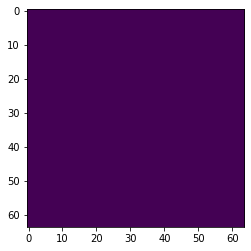

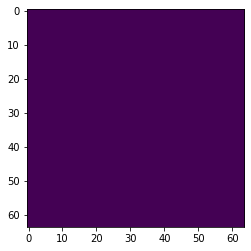

34-7-17-20


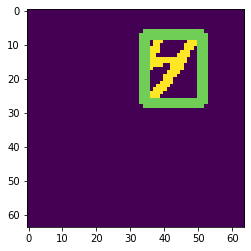

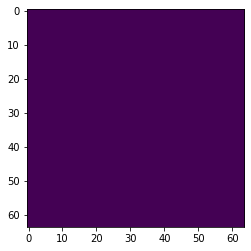

35-14-15-20


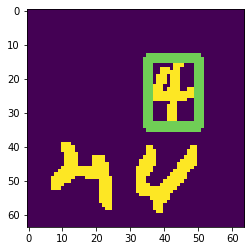

30-33-16-20


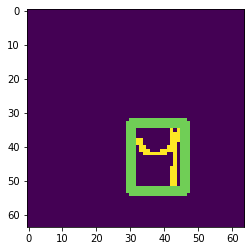

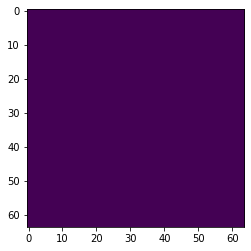

33-13-14-20


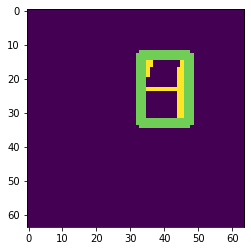

17-6-18-20


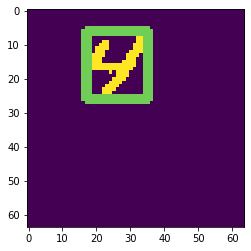

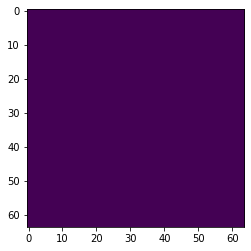

16-7-17-20


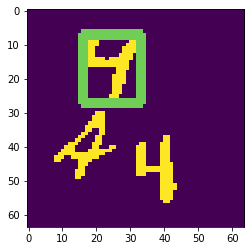

39-36-18-20


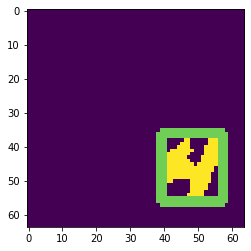

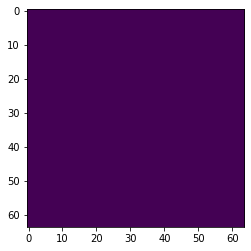

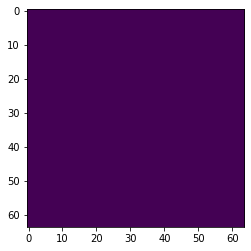

39-8-19-20


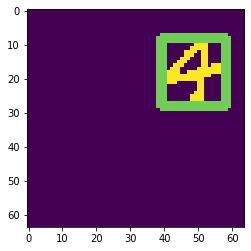

33-36-14-20


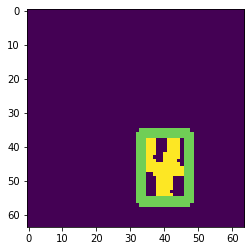

16-15-17-20


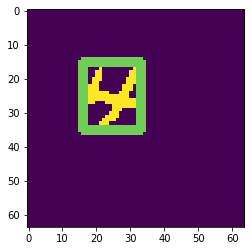

40-8-18-20


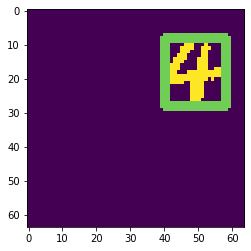

31-27-15-20


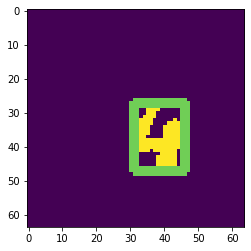

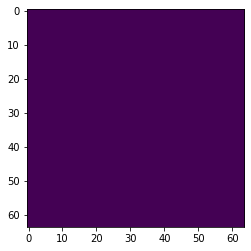

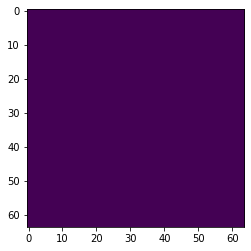

6-38-20-16


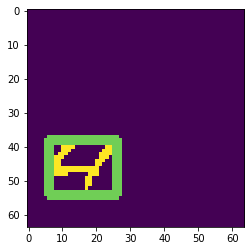

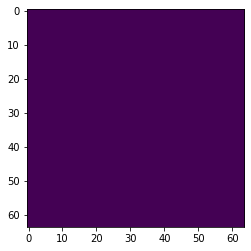

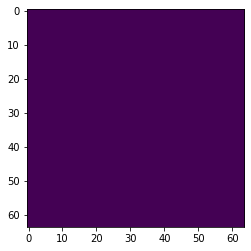

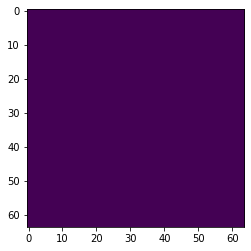

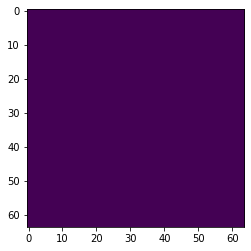

43-25-12-20


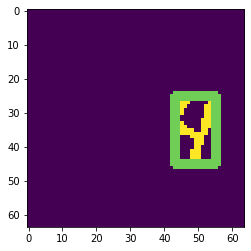

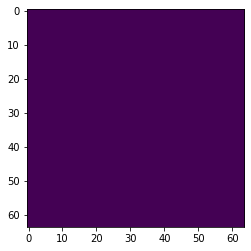

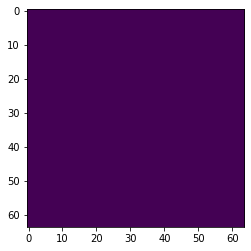

10-39-14-20


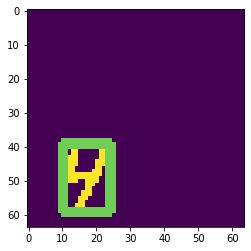

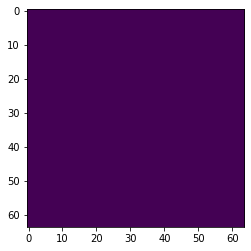

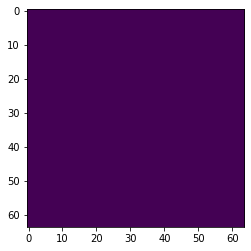

12-23-12-20


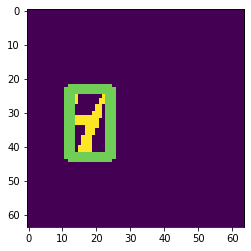

40-34-14-20


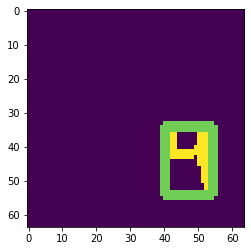

11-36-15-20


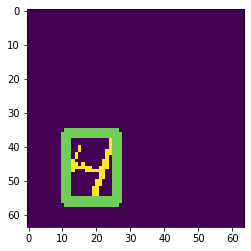

18-34-18-20


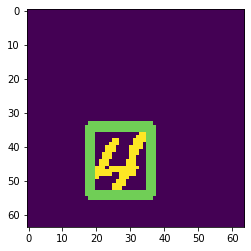

7-5-20-19


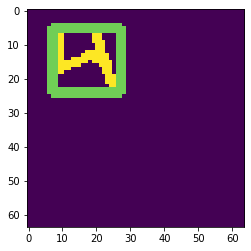

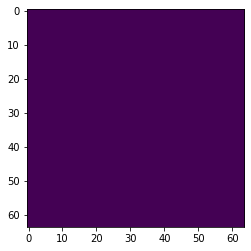

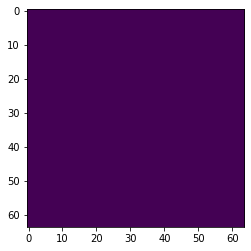

19-17-24-35


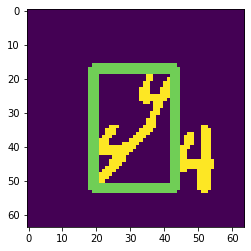

39-30-20-20


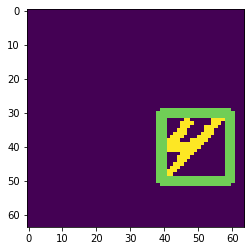

44-32-11-20


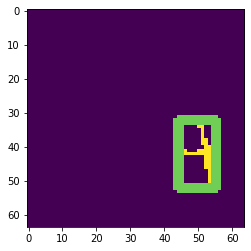

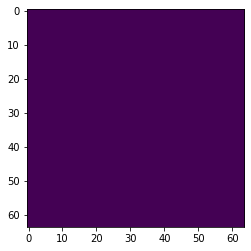

27-8-17-20


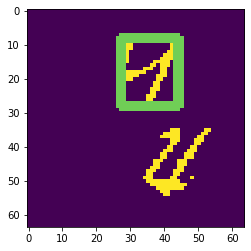

33-39-16-20


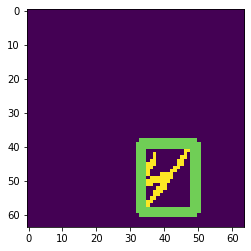

28-10-13-20


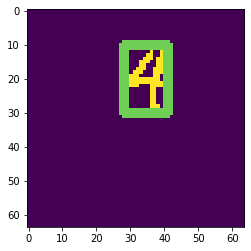

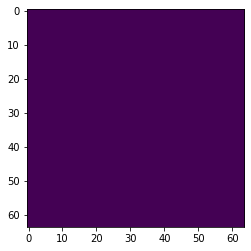

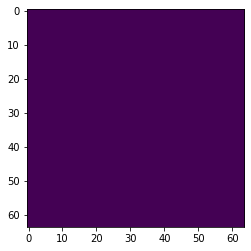

23-23-20-16


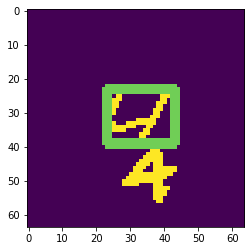

25-19-14-20


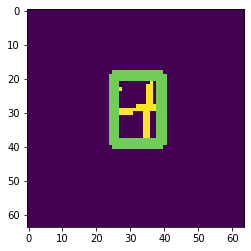

41-12-17-20


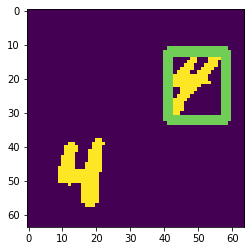

15-8-19-20


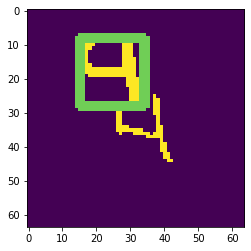

11-8-14-20


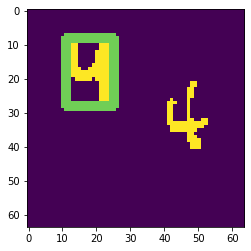

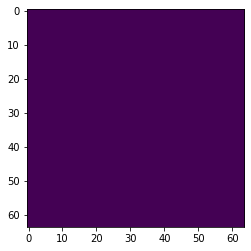

34-11-20-20


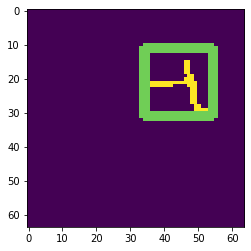

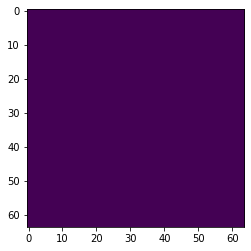

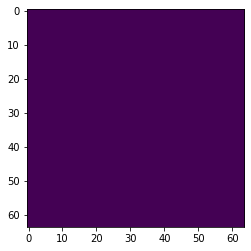

6-9-19-20


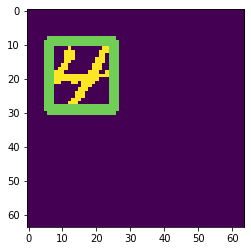

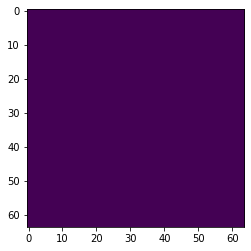

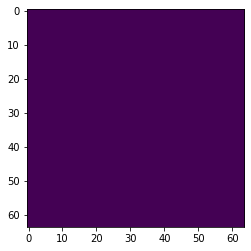

40-7-14-20


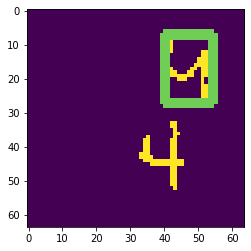

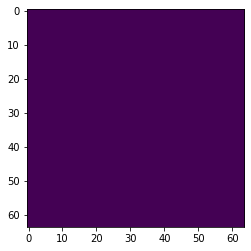

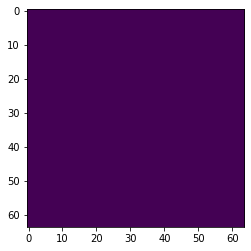

15-14-18-20


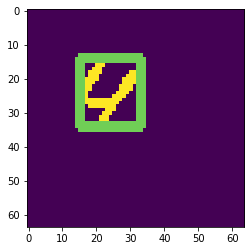

38-13-20-18


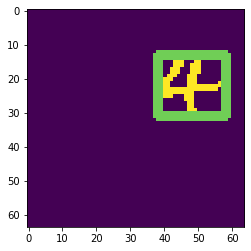

40-8-18-20


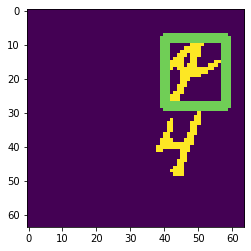

22-5-19-20


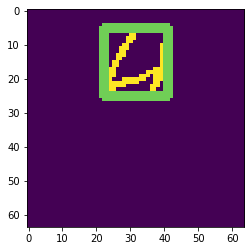

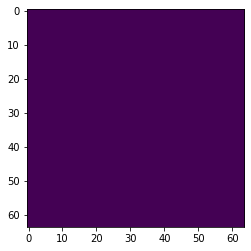

37-40-14-20


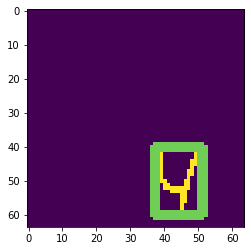

12-6-16-20


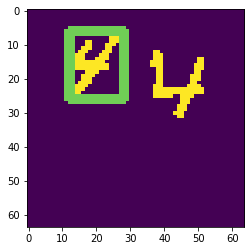

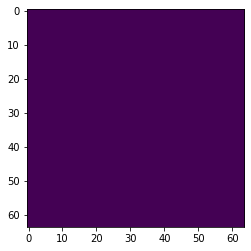

33-17-18-20


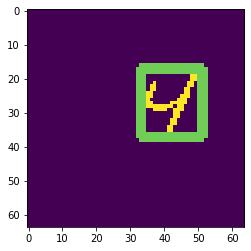

17-7-16-20


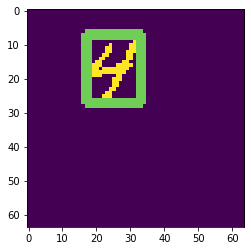

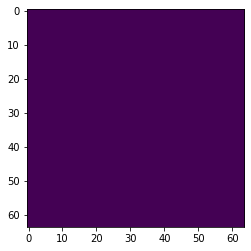

30-35-14-20


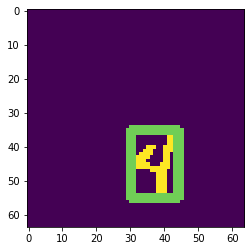

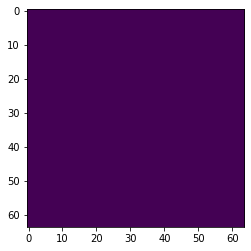

37-11-19-20


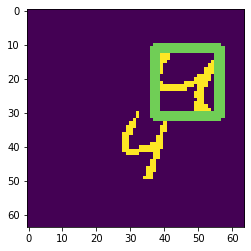

33-10-19-20


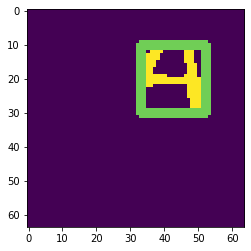

17-27-20-18


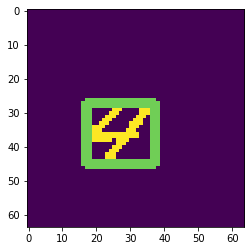

15-13-9-20


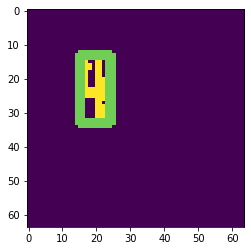

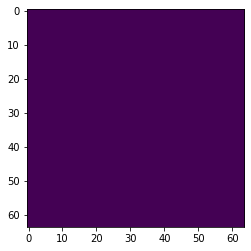

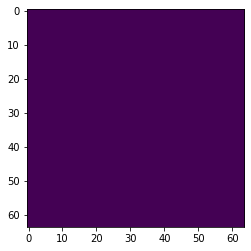

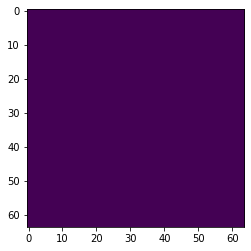

9-25-14-20


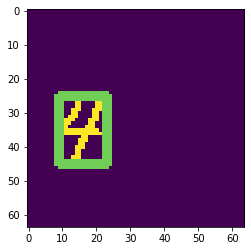

7-7-16-20


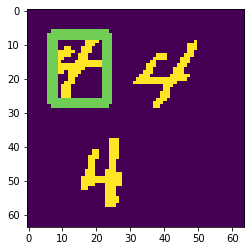

10-21-8-20


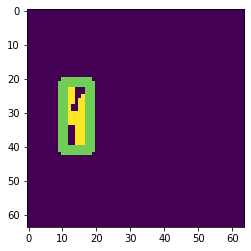

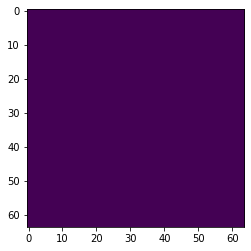

31-17-24-36


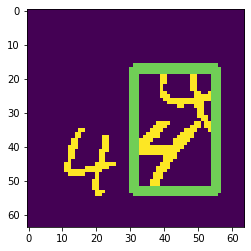

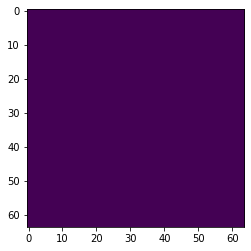

44-32-13-20


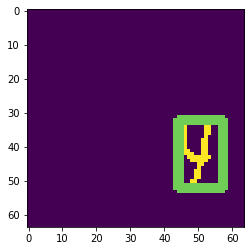

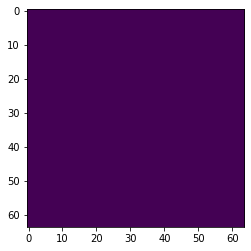

37-20-20-20


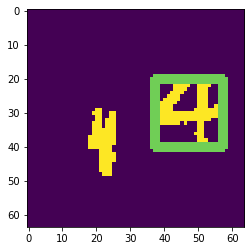

18-21-14-20


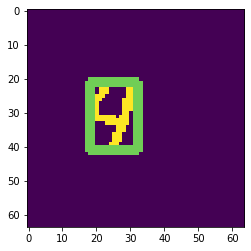

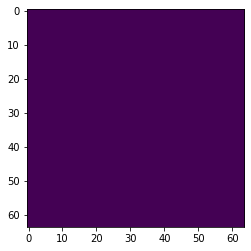

19-26-13-20


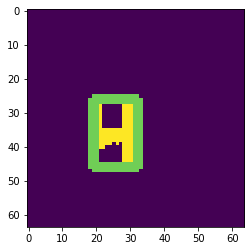

44-6-14-20


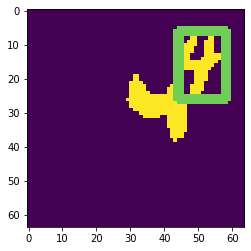

10-26-16-20


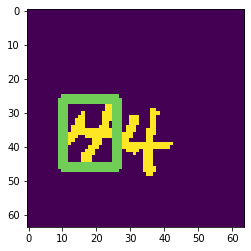

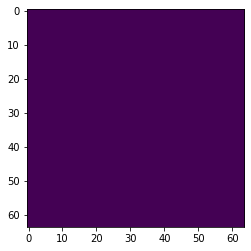

29-24-11-20


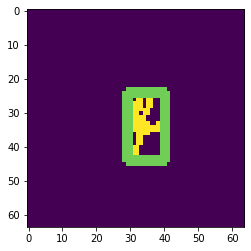

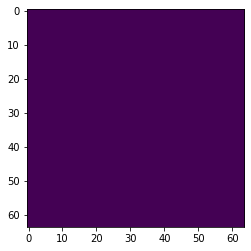

44-18-12-20


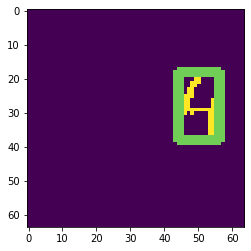

33-30-16-20


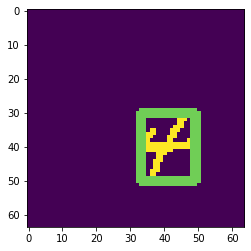

39-5-18-20


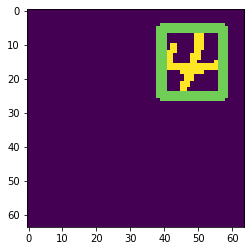

7-11-16-20


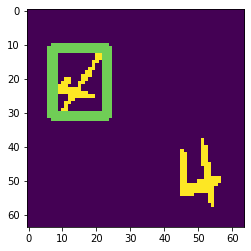

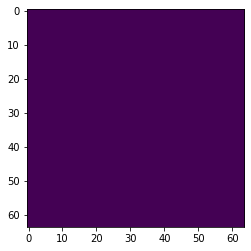

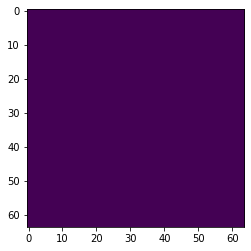

17-18-16-20


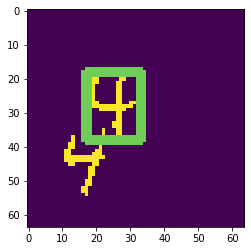

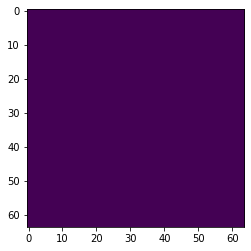

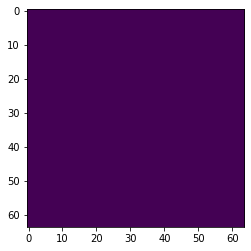

34-10-15-20


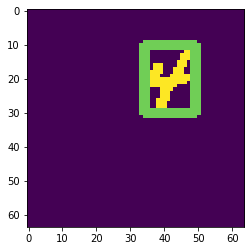

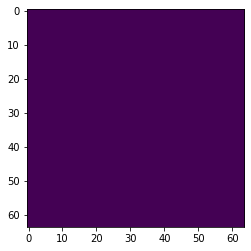

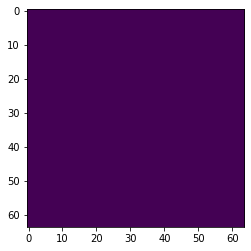

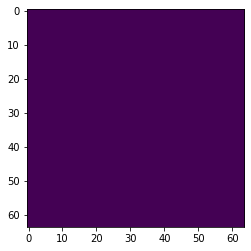

7-25-19-20


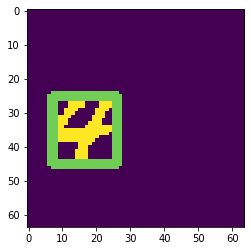

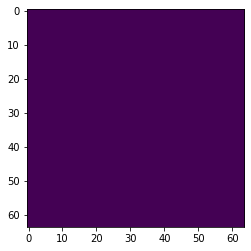

28-23-14-20


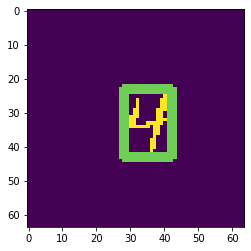

8-14-13-19


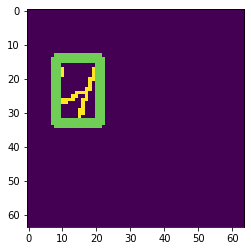

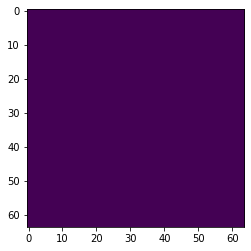

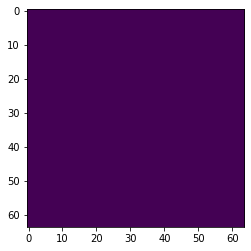

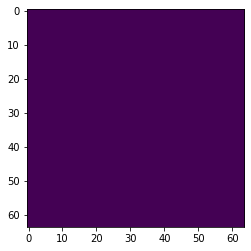

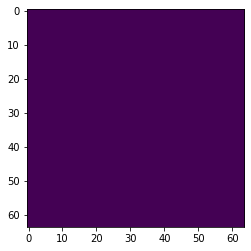

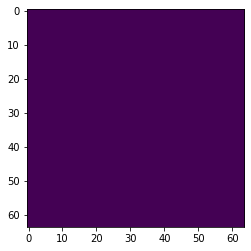

15-21-16-20


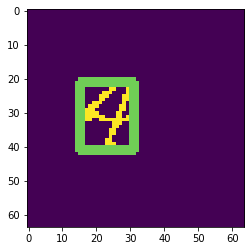

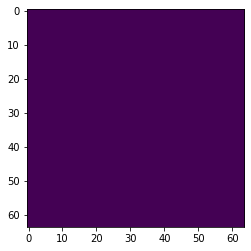

4-4-20-20


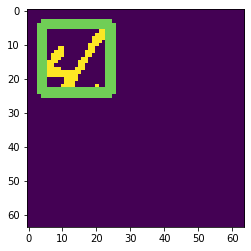

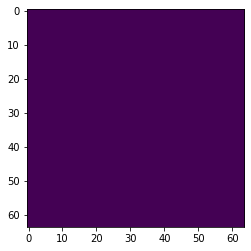

38-17-14-20


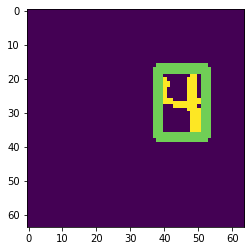

9-40-12-20


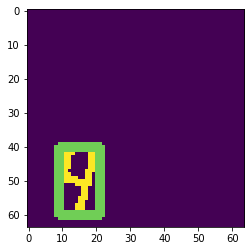

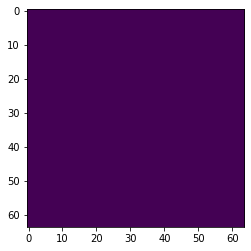

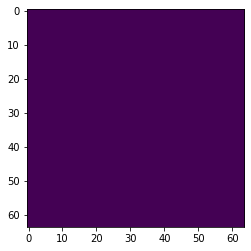

35-33-20-18


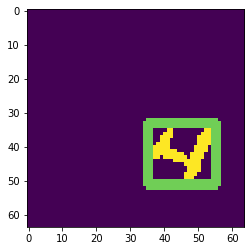

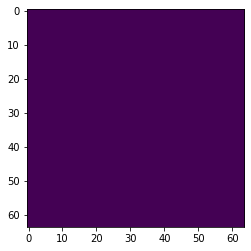

44-8-13-20


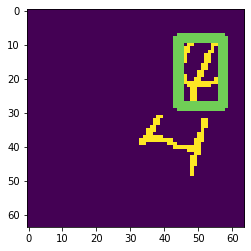

39-7-16-20


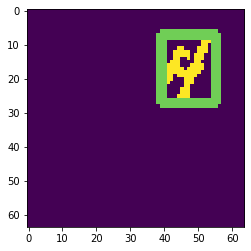

14-27-12-20


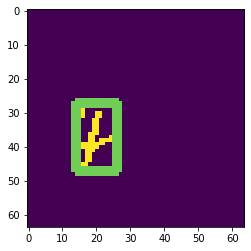

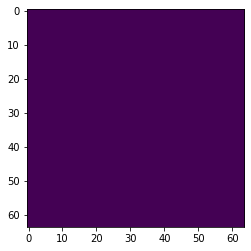

16-40-18-20


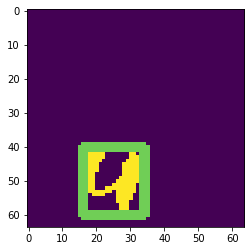

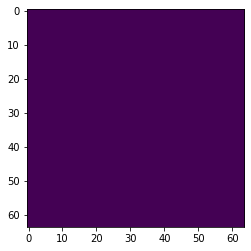

37-22-14-20


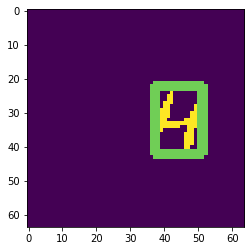

28-36-20-18


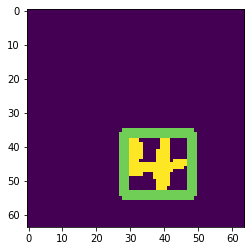

24-7-19-20


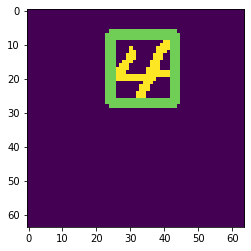

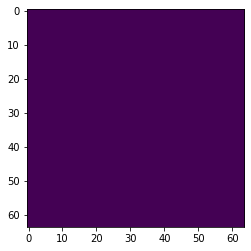

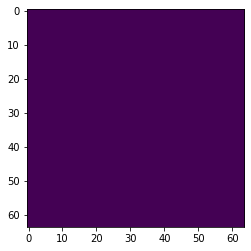

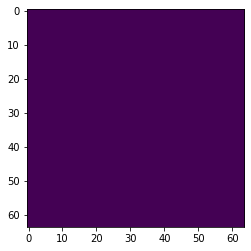

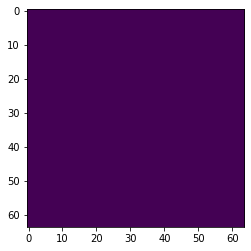

37-39-16-20


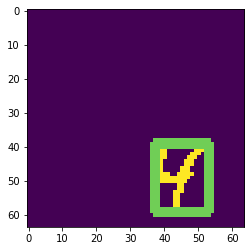

15-34-18-20


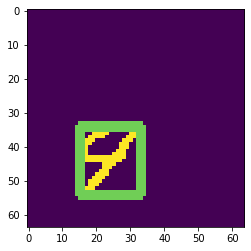

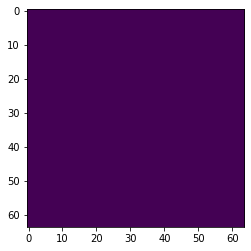

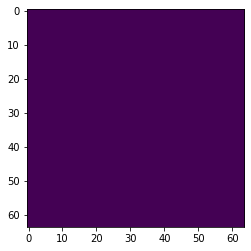

42-18-16-20


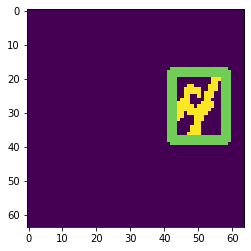

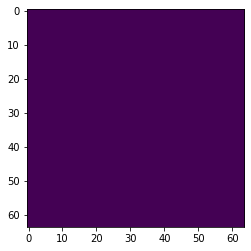

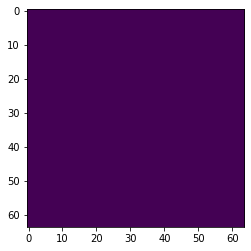

35-20-15-20


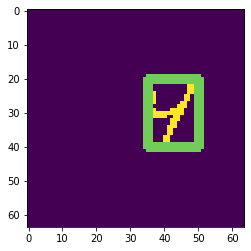

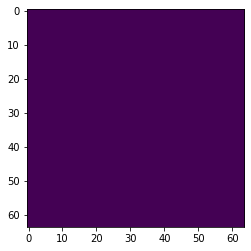

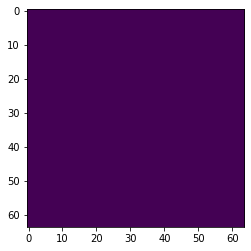

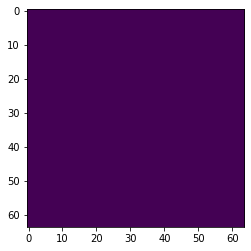

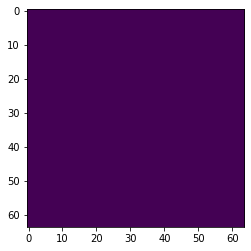

34-9-14-20


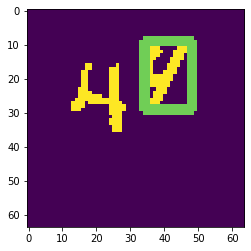

23-17-16-20


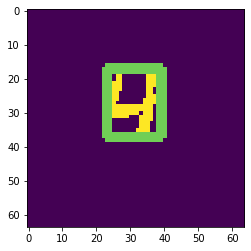

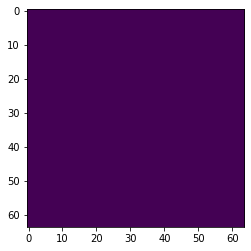

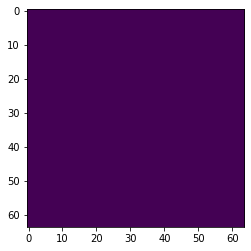

21-30-19-20


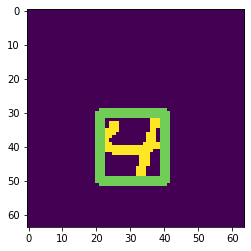

12-39-9-20


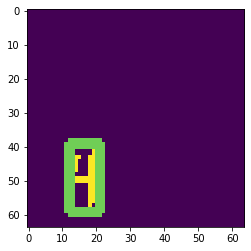

20-38-14-20


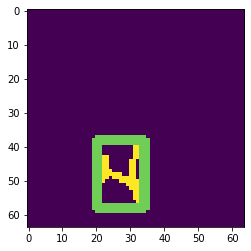

13-20-16-20


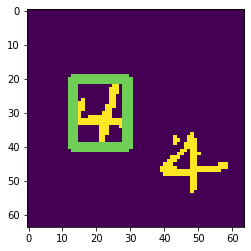

23-9-14-19


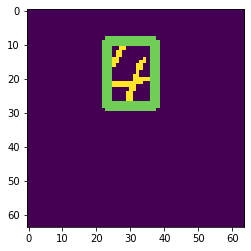

26-5-12-20


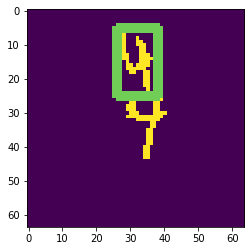

18-9-19-20


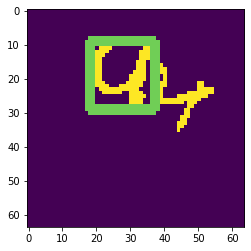

7-17-14-20


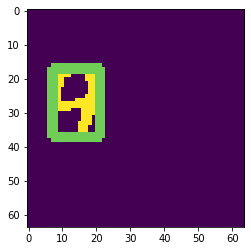

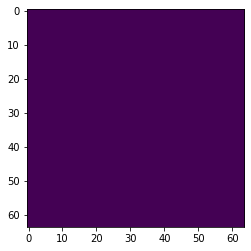

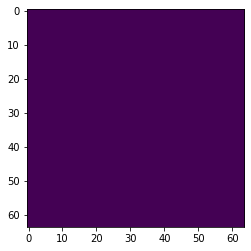

24-10-18-20


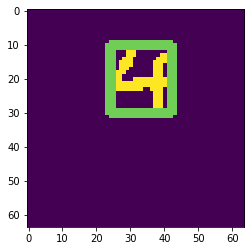

18-33-18-20


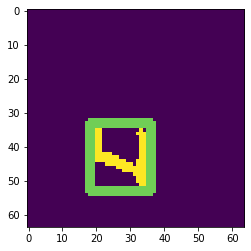

20-9-14-20


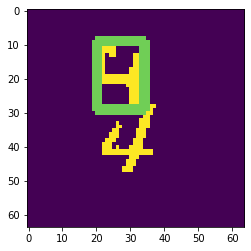

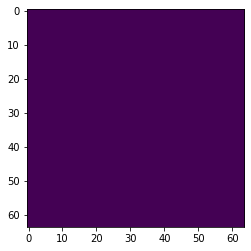

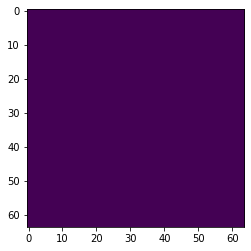

38-15-20-19


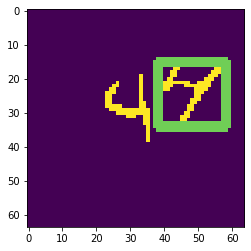

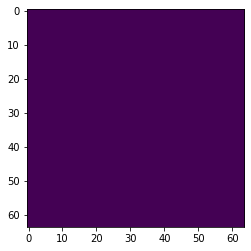

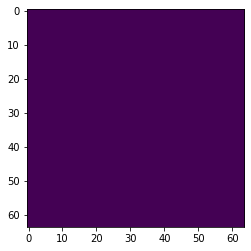

41-12-10-20


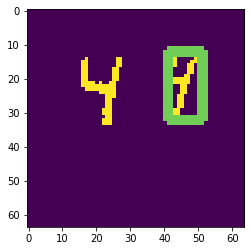

7-11-20-20


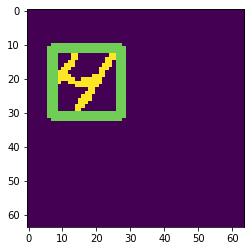

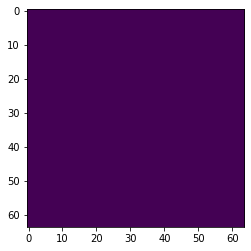

41-30-11-20


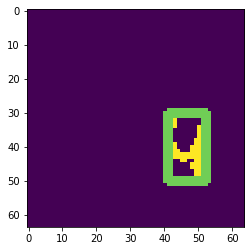

35-20-16-20


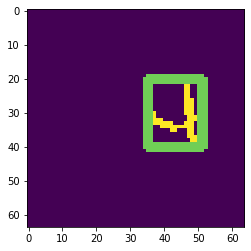

7-18-17-20


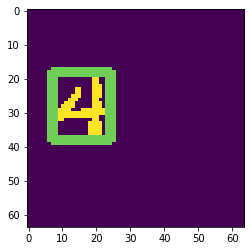

31-8-10-20


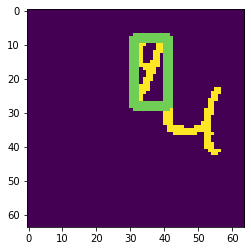

20-8-14-20


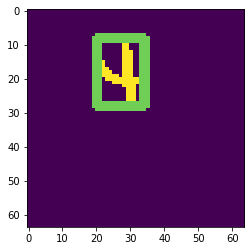

34-21-12-20


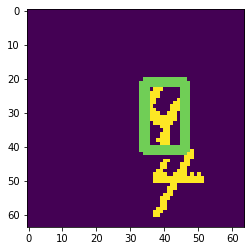

43-5-14-20


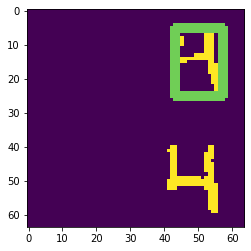

14-35-20-18


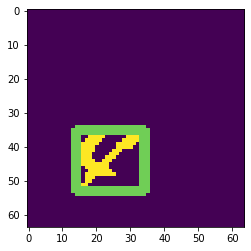

13-18-12-20


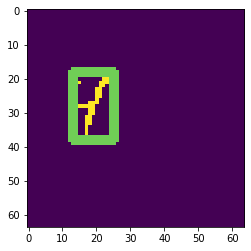

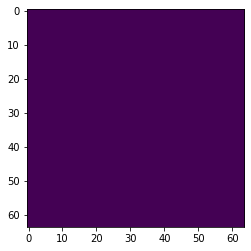

38-20-16-20


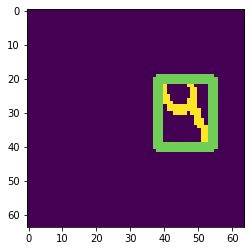

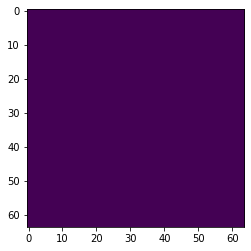

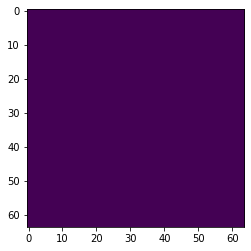

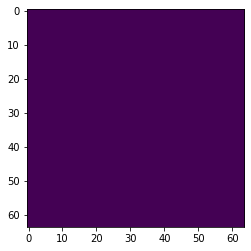

15-20-16-20


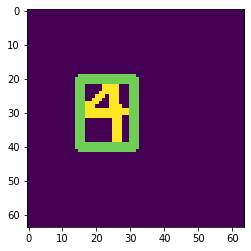

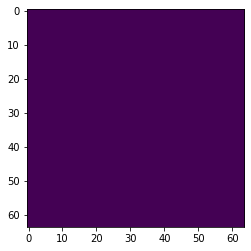

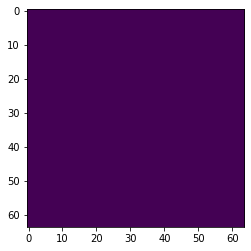

39-14-16-20


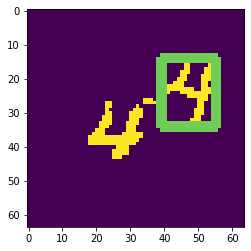

8-8-12-20


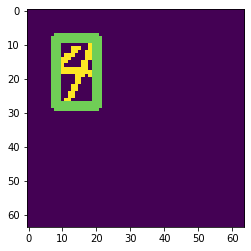

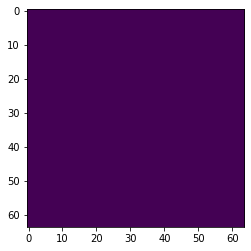

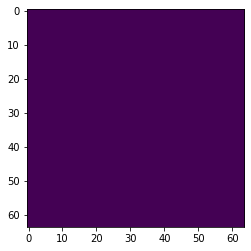

38-15-14-20


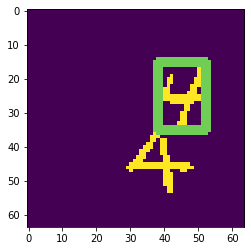

34-5-12-20


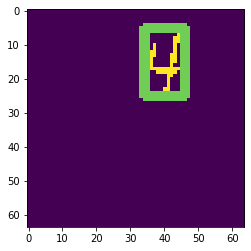

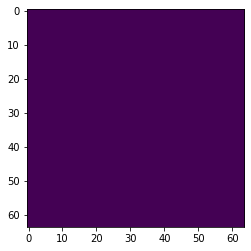

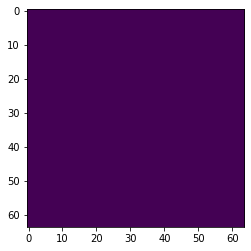

16-12-20-16


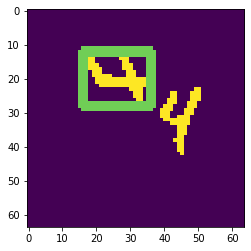

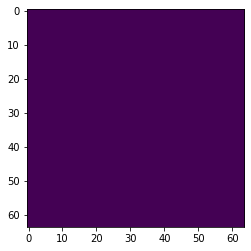

39-14-16-20


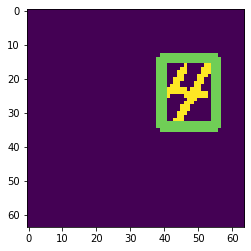

17-6-19-20


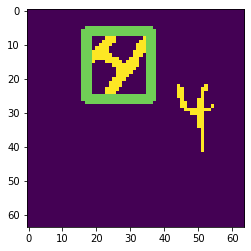

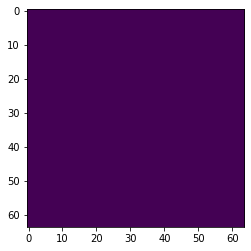

21-12-16-20


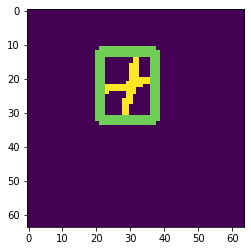

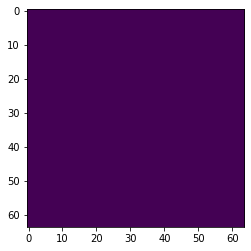

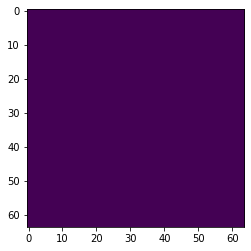

34-37-18-20


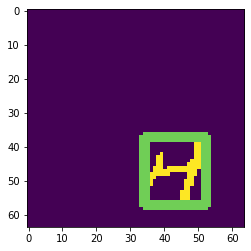

20-39-10-20


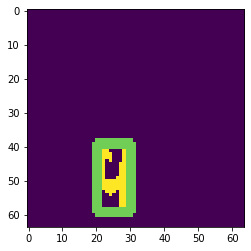

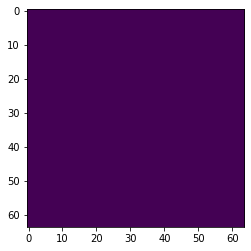

42-16-20-16


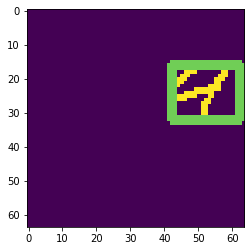

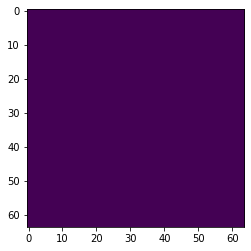

22-8-14-20


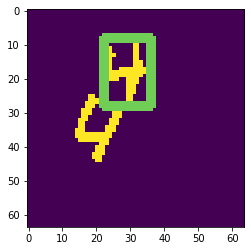

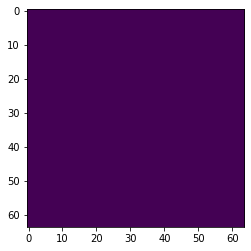

17-10-18-37


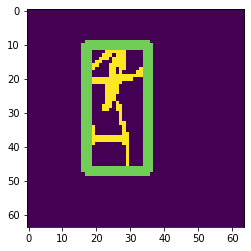

18-6-12-20


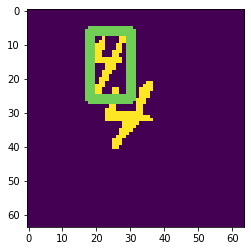

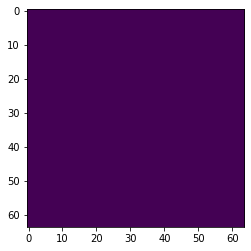

12-10-14-20


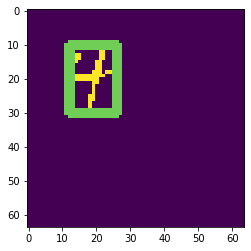

42-15-13-20


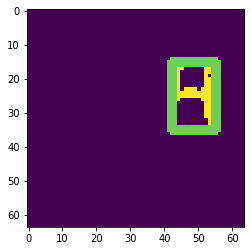

6-29-13-20


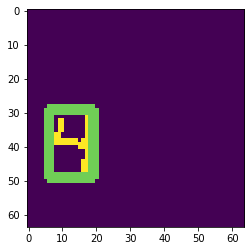

43-14-13-20


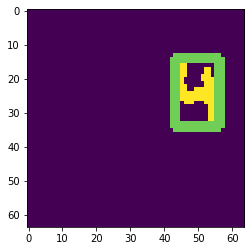

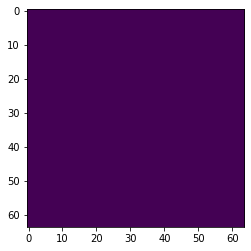

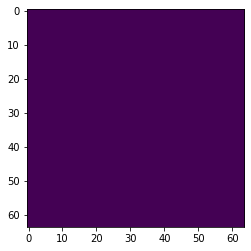

29-18-13-20


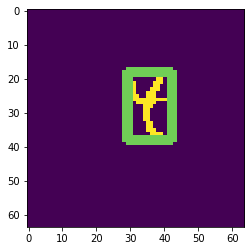

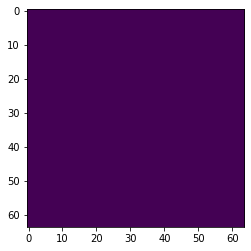

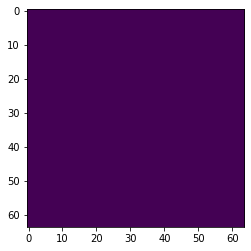

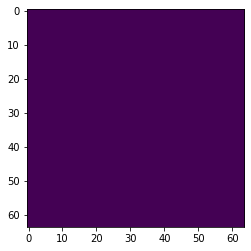

8-9-14-20


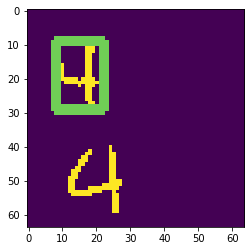

35-36-16-20


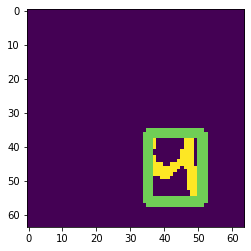

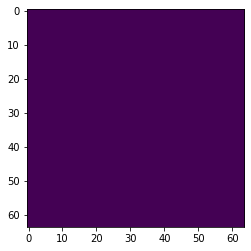

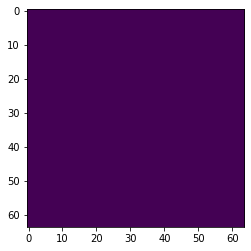

26-4-17-20


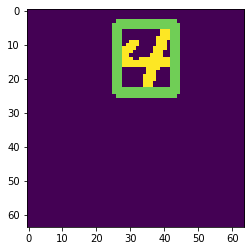

20-38-10-20


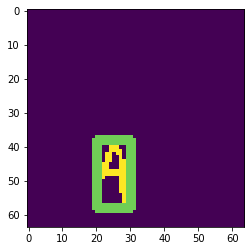

13-16-18-20


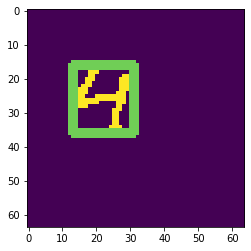

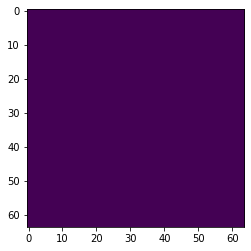

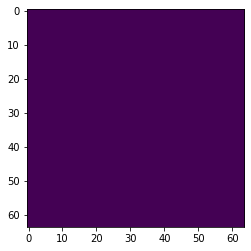

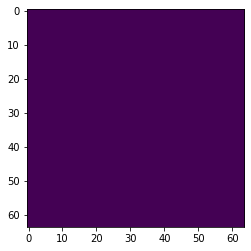

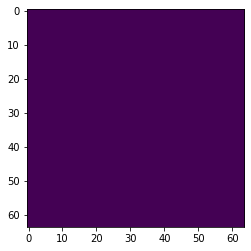

18-6-13-20


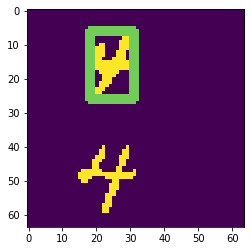

20-30-9-20


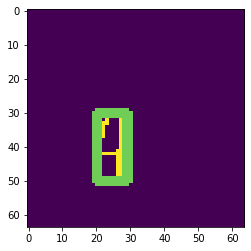

30-6-17-20


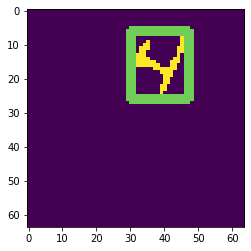

23-19-20-16


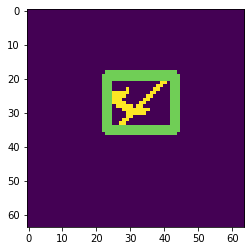

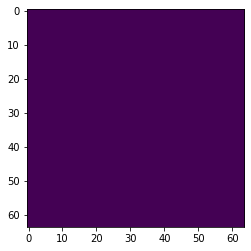

29-9-14-20


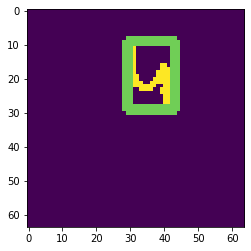

21-5-18-20


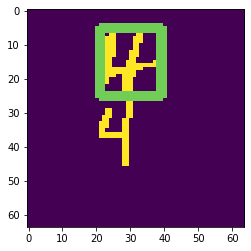

20-15-14-20


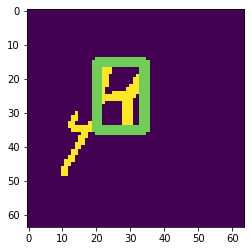

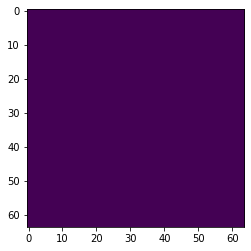

11-5-20-20


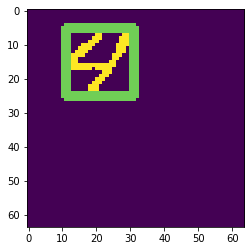

37-8-20-35


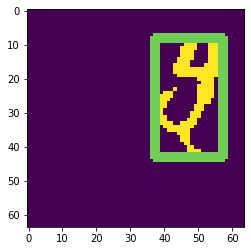

36-39-17-20


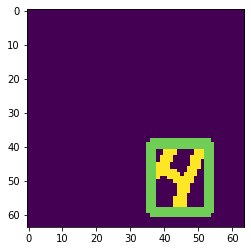

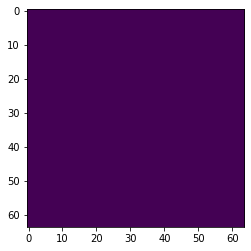

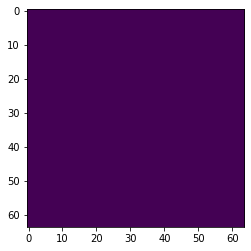

20-29-18-20


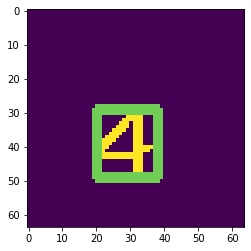

41-35-14-20


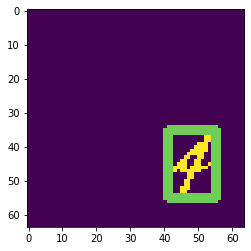

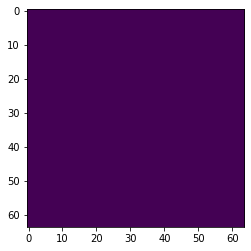

40-9-18-20


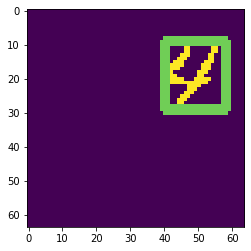

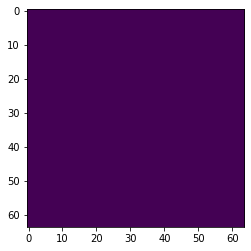

26-29-12-20


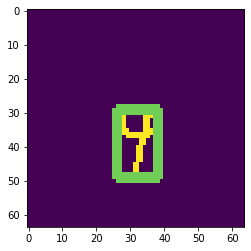

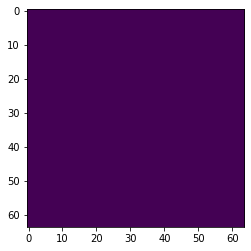

41-33-16-20


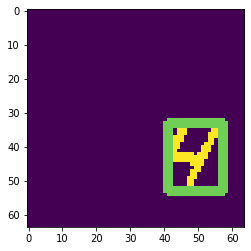

11-14-19-20


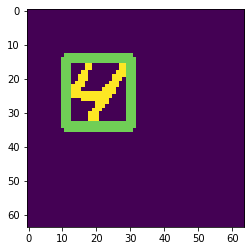

9-13-12-20


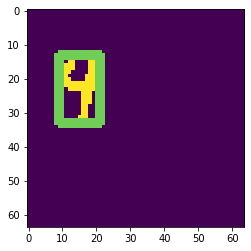

8-5-12-20


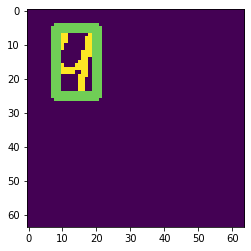

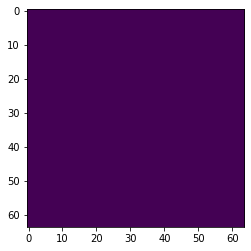

34-40-20-20


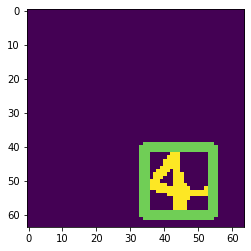

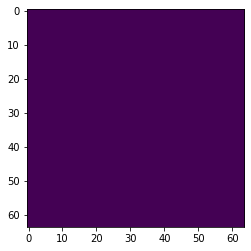

37-7-12-20


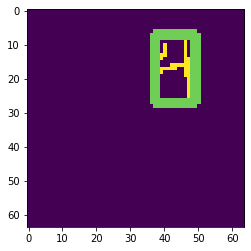

43-18-4-2


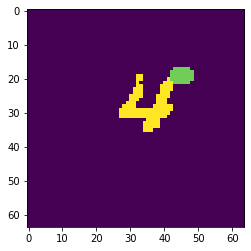

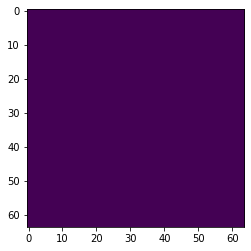

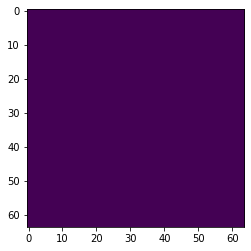

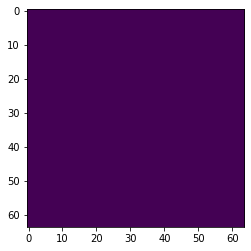

22-5-18-20


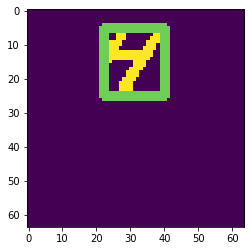

42-14-14-20


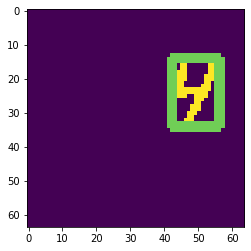

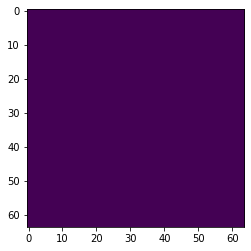

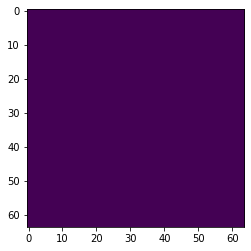

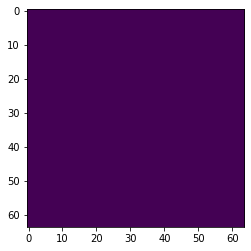

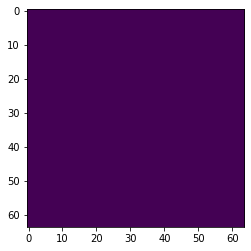

34-41-17-20


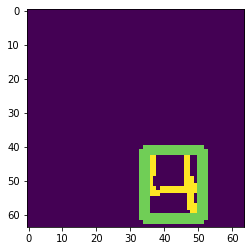

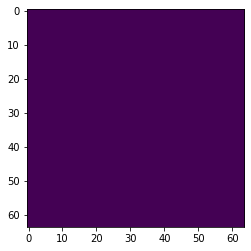

8-25-19-17


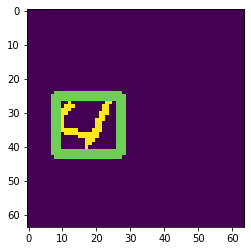

41-18-19-20


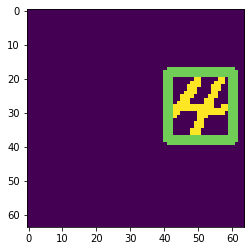

10-22-12-20


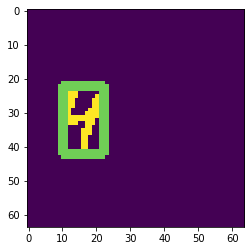

13-25-16-20


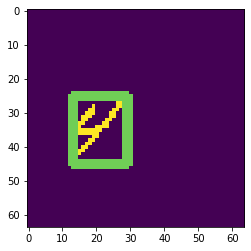

19-10-16-20


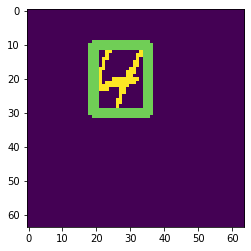

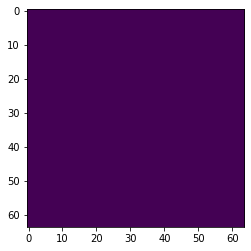

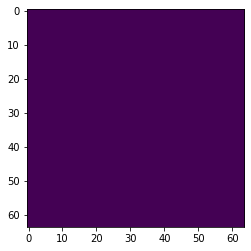

26-9-12-20


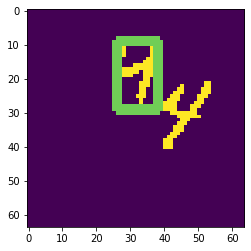

31-6-20-18


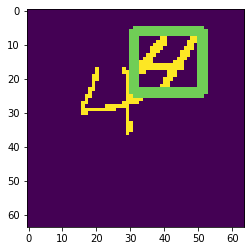

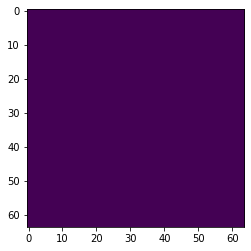

9-17-12-20


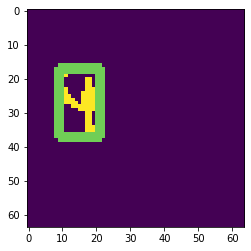

17-6-14-20


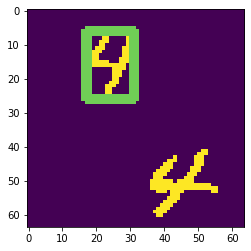

14-15-20-18


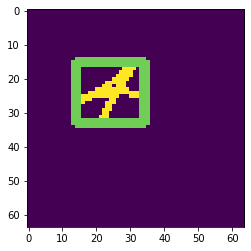

20-6-14-20


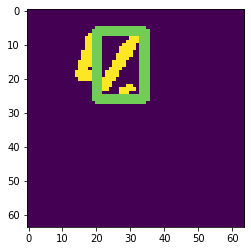

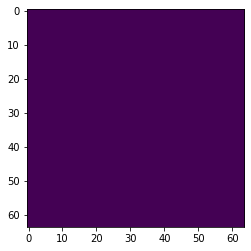

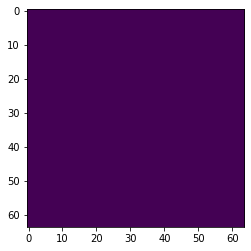

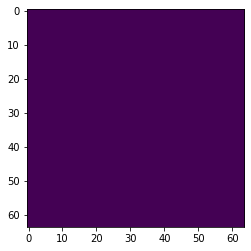

26-38-14-20


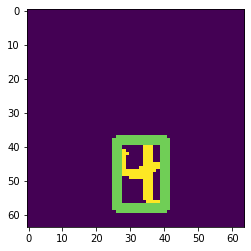

25-8-20-20


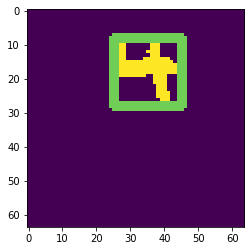

34-27-6-9


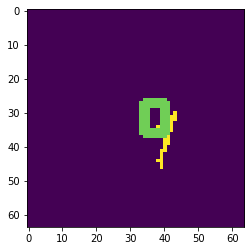

32-11-12-20


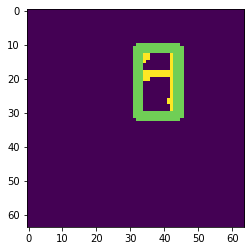

14-24-14-20


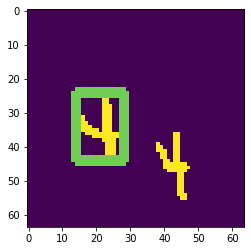

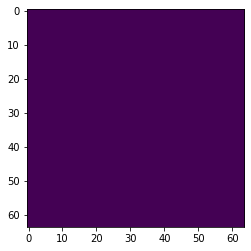

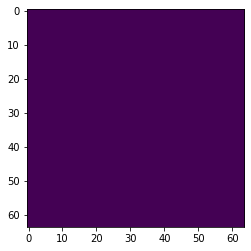

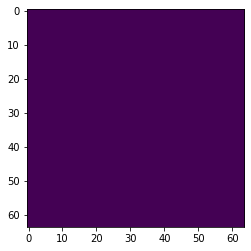

41-22-16-20


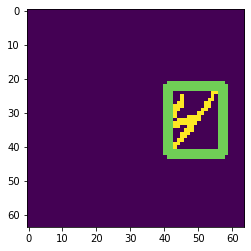

23-15-14-20


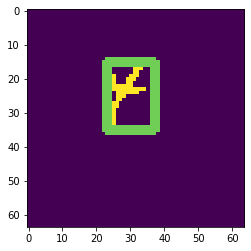

10-9-15-20


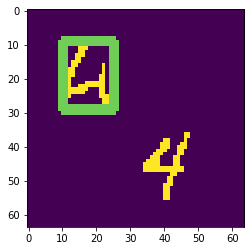

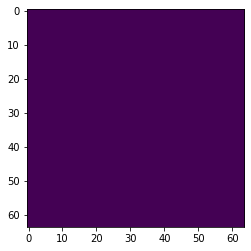

32-39-14-20


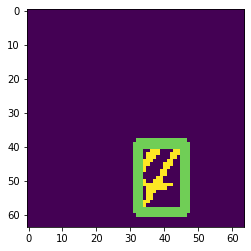

18-34-18-20


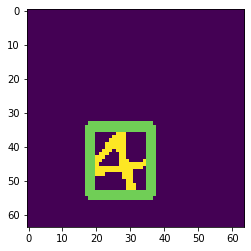

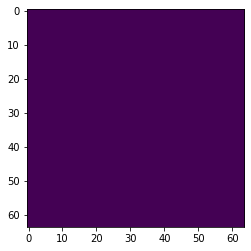

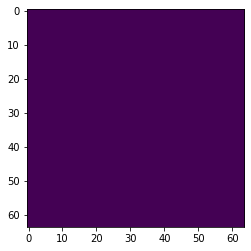

14-24-19-18


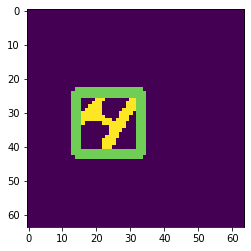

27-36-8-20


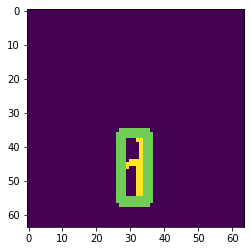

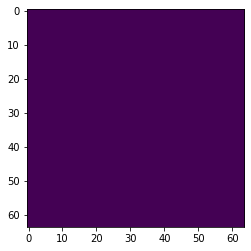

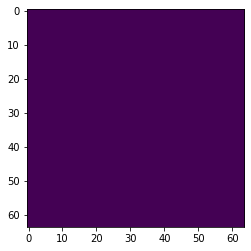

16-16-20-17


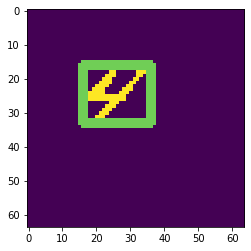

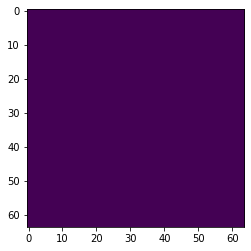

15-16-14-20


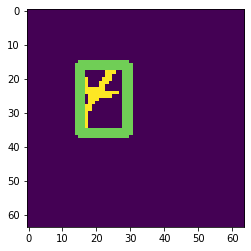

43-10-13-20


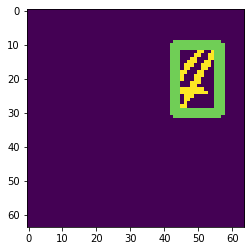

8-14-17-20


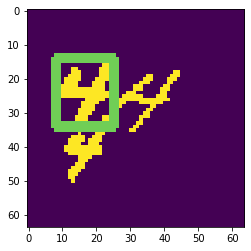

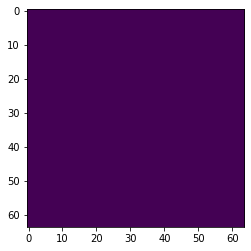

37-5-18-20


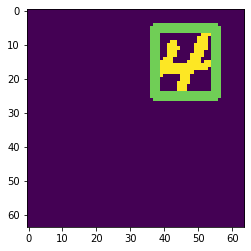

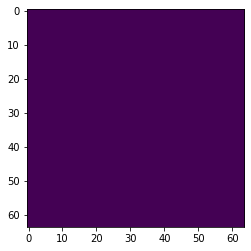

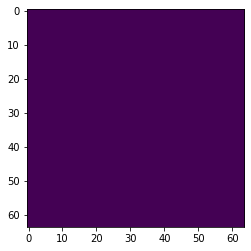

44-32-12-20


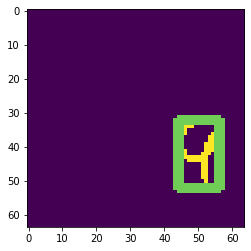

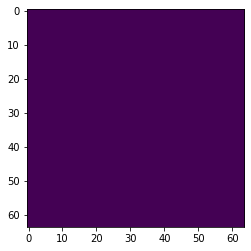

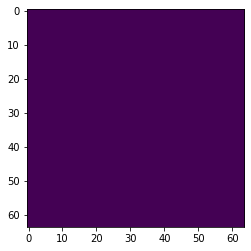

27-10-13-19


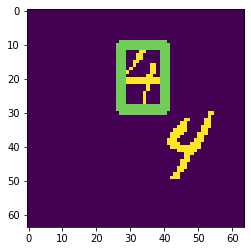

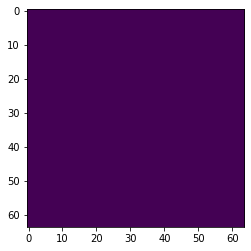

5-40-18-20


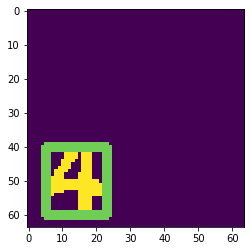

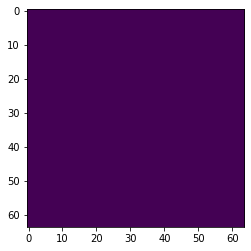

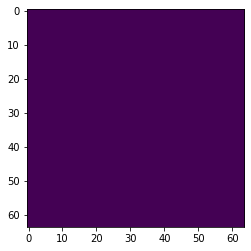

36-40-20-20


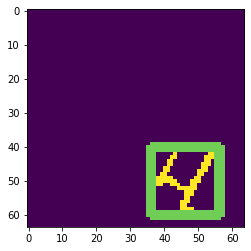

26-10-14-20


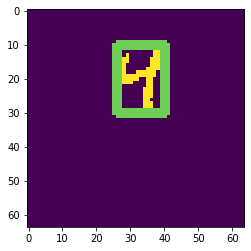

37-7-19-20


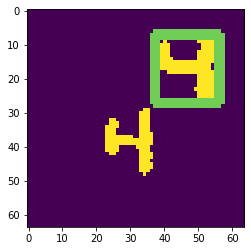

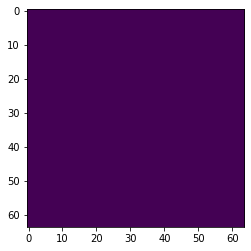

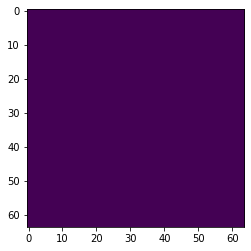

17-14-19-18


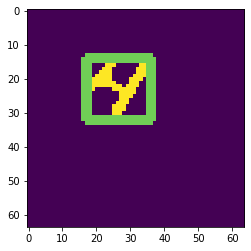

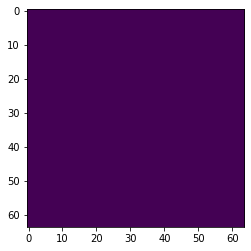

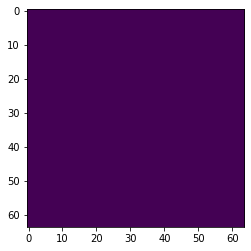

35-39-10-20


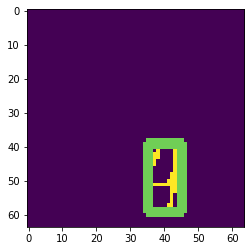

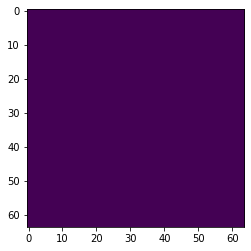

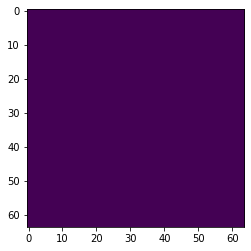

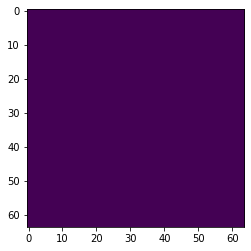

33-5-12-20


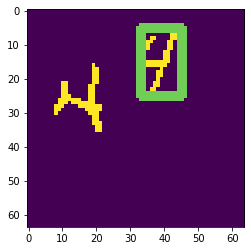

42-36-14-20


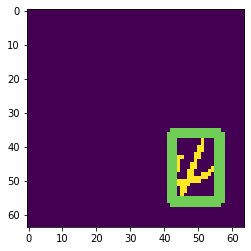

19-13-12-20


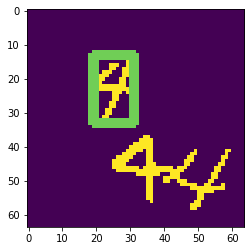

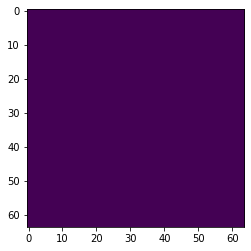

25-6-16-20


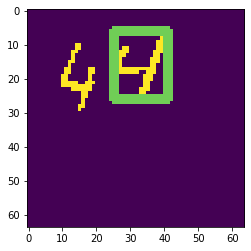

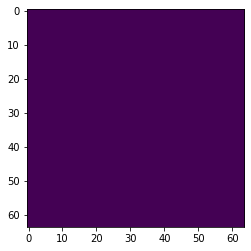

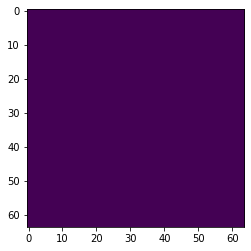

27-4-12-20


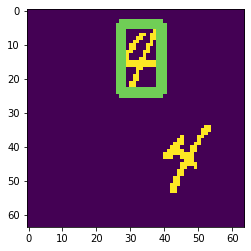

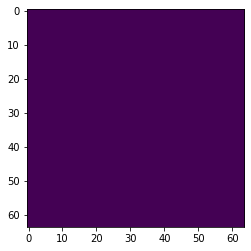

26-21-19-20


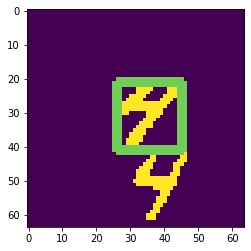

7-35-19-20


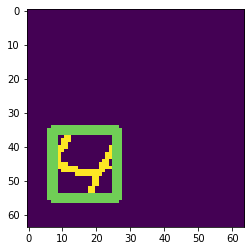

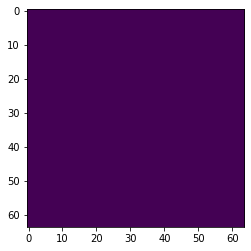

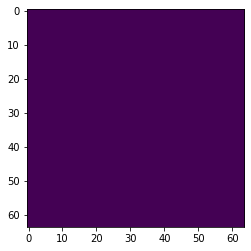

44-6-11-20


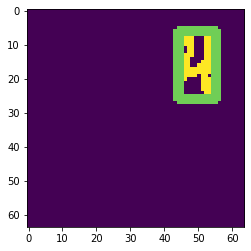

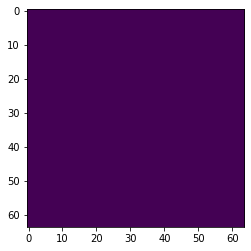

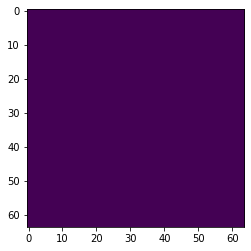

39-17-13-20


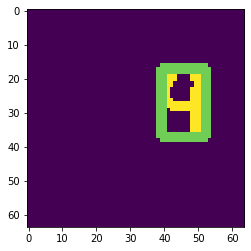

42-28-15-20


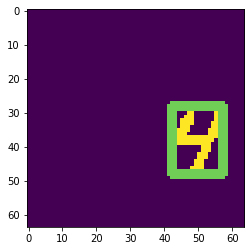

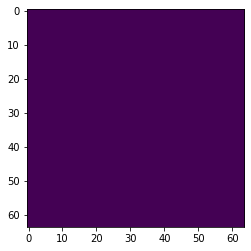

27-14-13-20


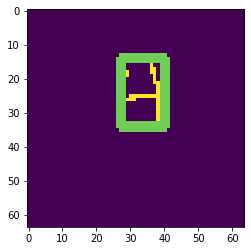

6-17-20-14


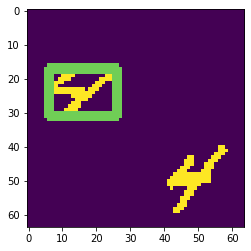

24-5-20-20


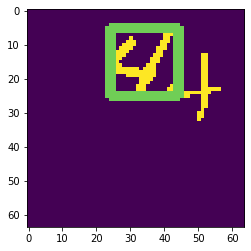

10-42-20-14


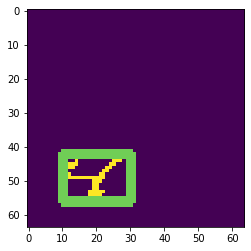

29-40-12-20


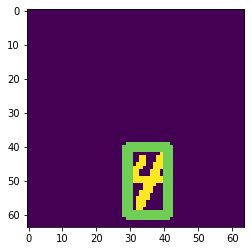

10-10-18-20


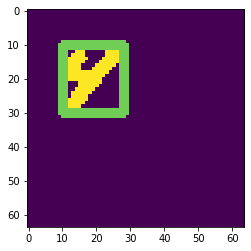

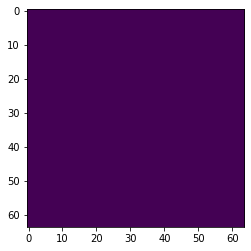

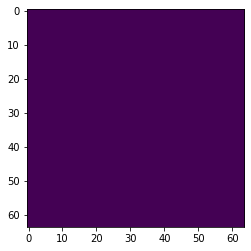

12-27-20-18


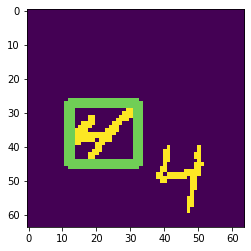

42-36-18-20


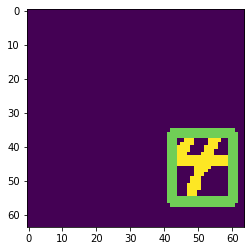

26-41-19-20


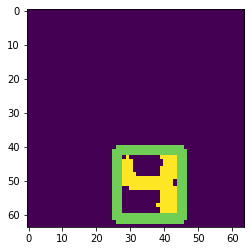

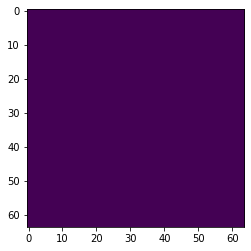

19-27-16-20


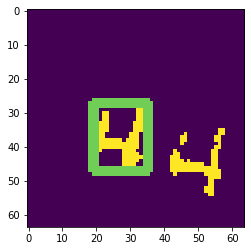

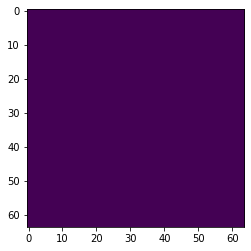

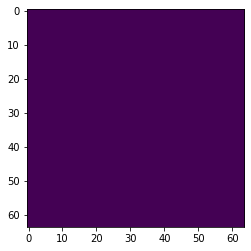

23-17-12-20


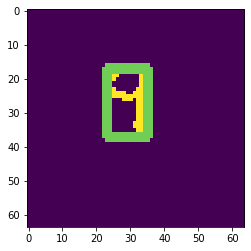

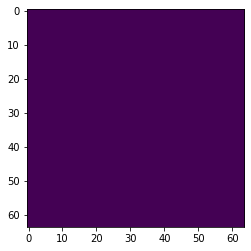

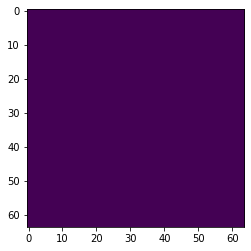

12-9-24-50


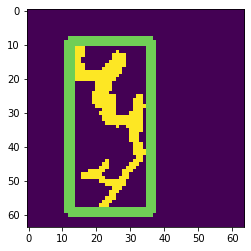

41-6-20-20


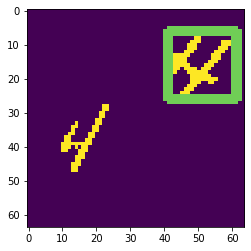

41-36-12-20


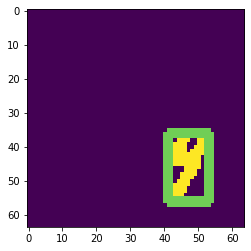

27-20-16-20


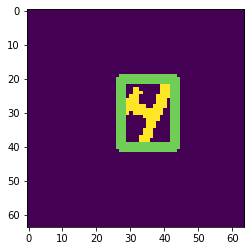

14-33-18-20


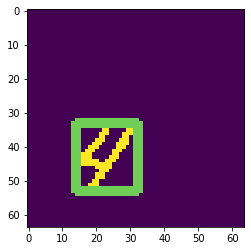

10-27-12-20


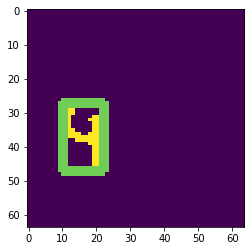

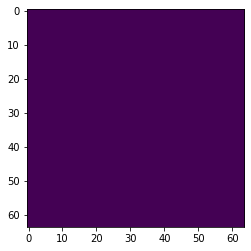

28-11-17-20


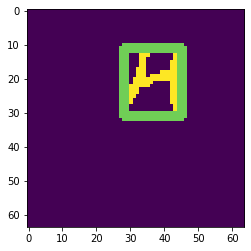

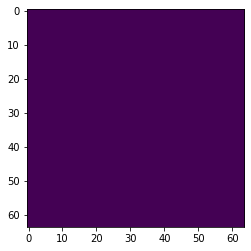

31-13-10-20


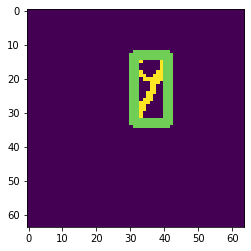

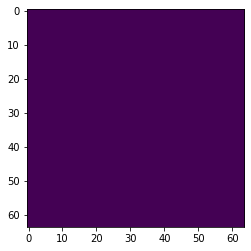

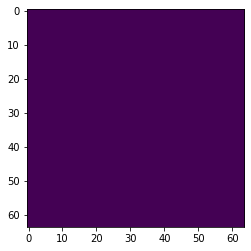

32-22-20-36


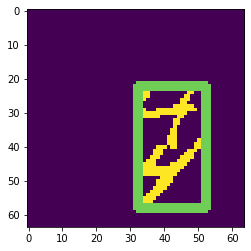

37-40-12-20


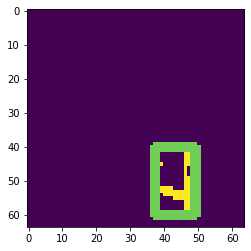

40-36-18-20


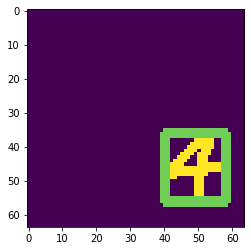

30-42-20-18


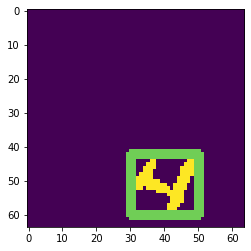

10-14-13-20


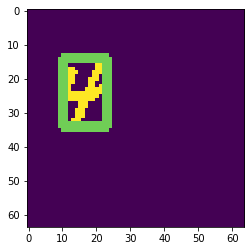

27-31-13-20


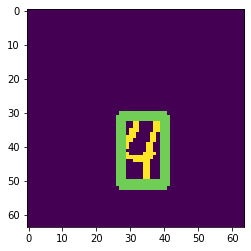

14-6-16-20


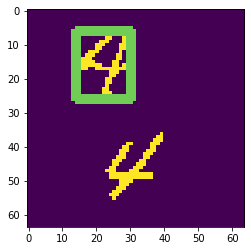

4-23-20-20


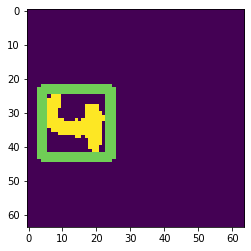

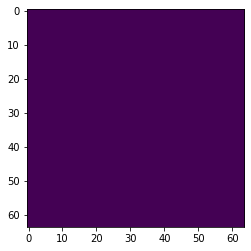

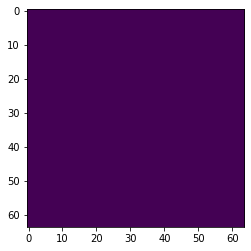

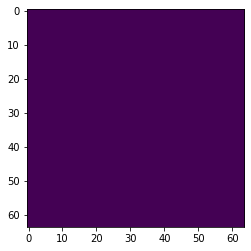

20-10-19-20


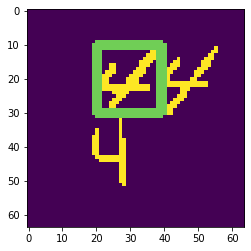

39-18-17-20


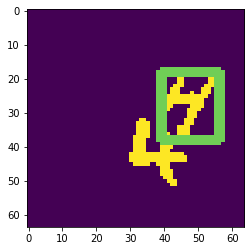

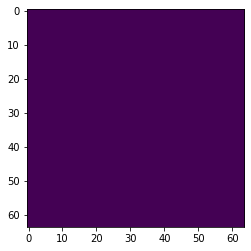

34-24-12-20


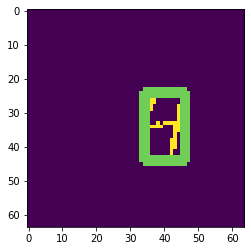

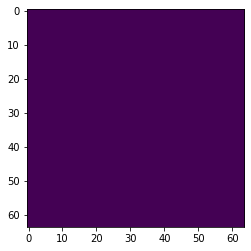

8-18-20-14


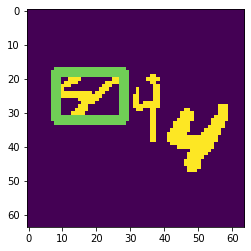

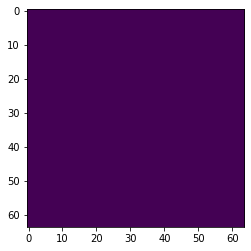

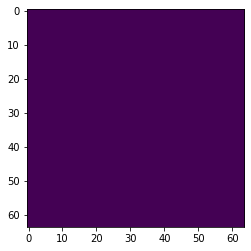

6-30-18-20


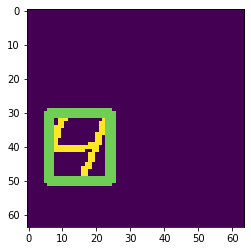

32-35-11-20


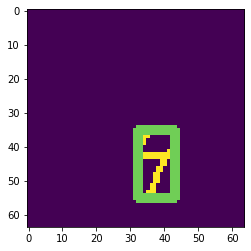

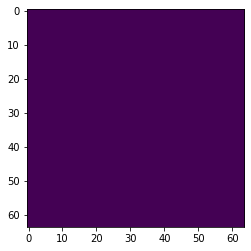

15-9-10-20


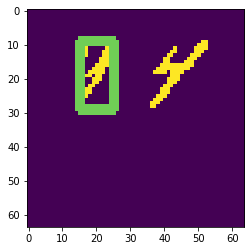

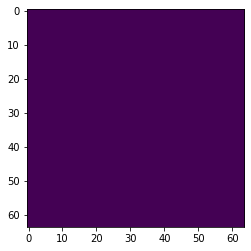

26-13-16-20


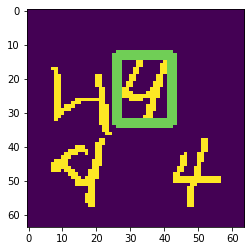

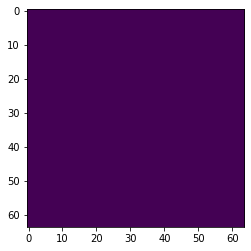

29-6-16-20


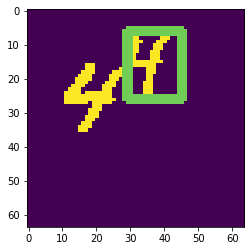

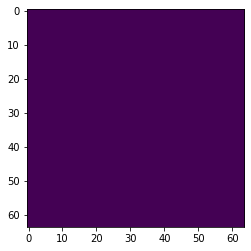

27-11-10-20


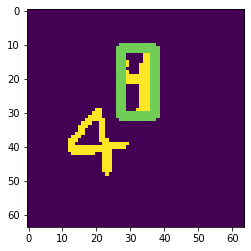

32-38-15-20


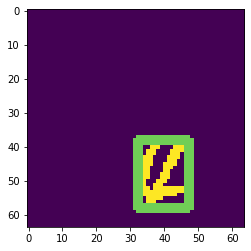

40-9-14-20


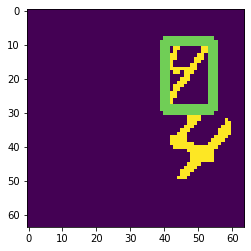

7-17-18-20


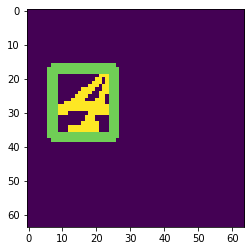

41-7-13-20


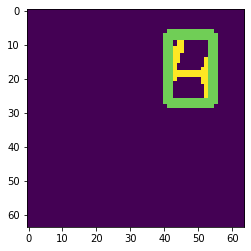

6-4-16-20


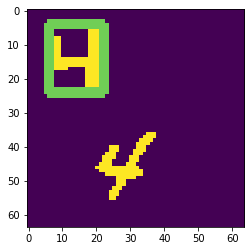

4-6-17-20


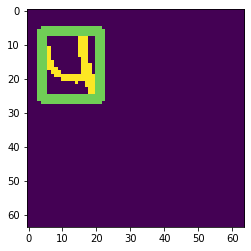

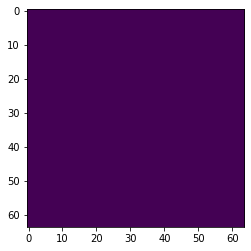

43-14-11-20


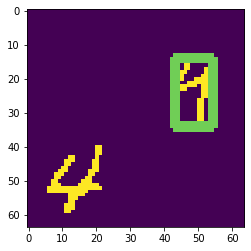

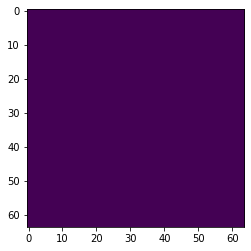

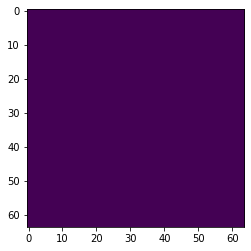

9-17-11-20


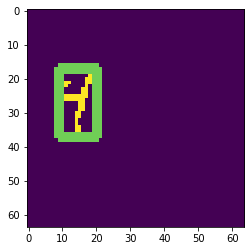

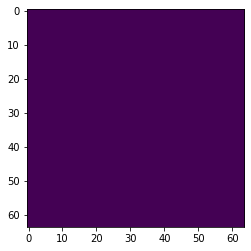

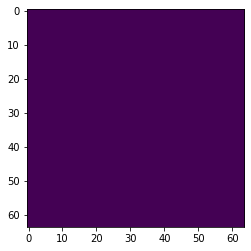

29-13-13-20


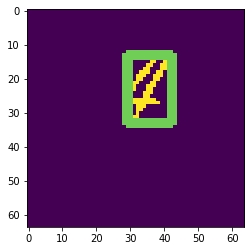

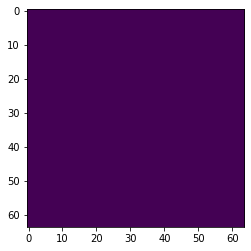

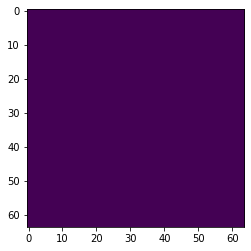

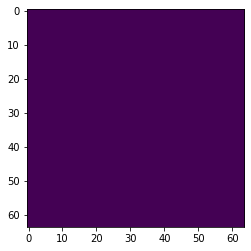

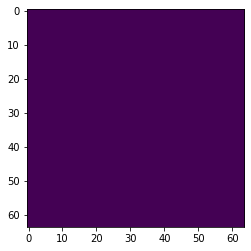

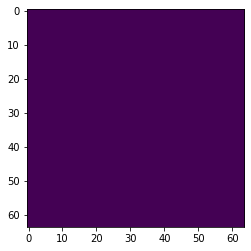

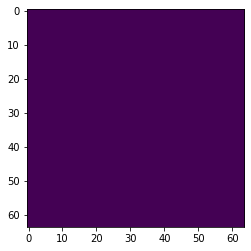

12-11-15-20


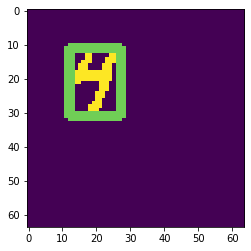

9-37-12-20


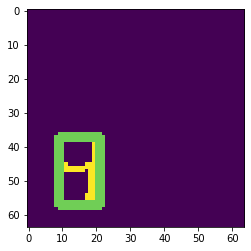

40-12-20-20


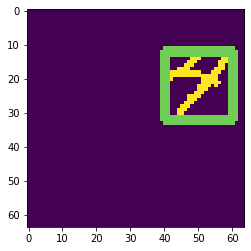

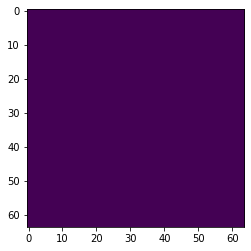

33-17-20-20


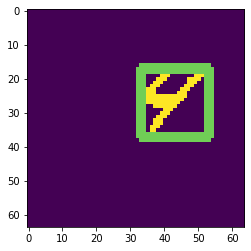

29-25-16-20


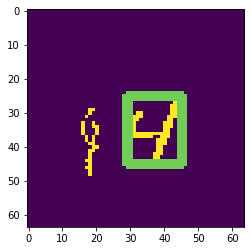

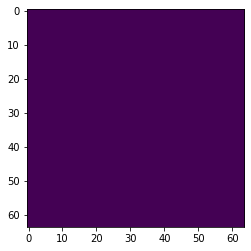

35-25-11-20


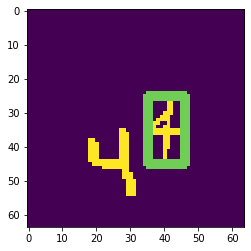

18-7-18-20


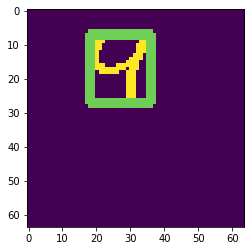

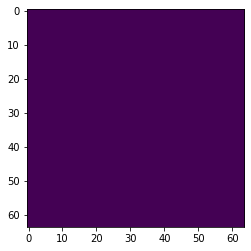

7-25-18-20


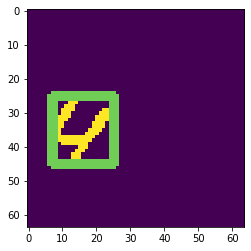

14-25-15-20


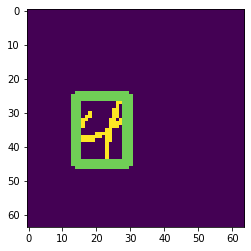

7-34-20-20


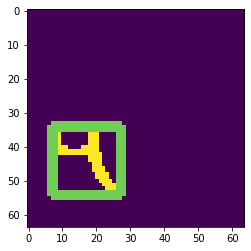

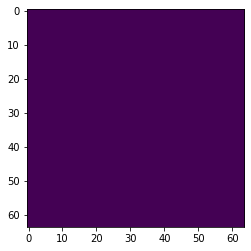

31-41-12-20


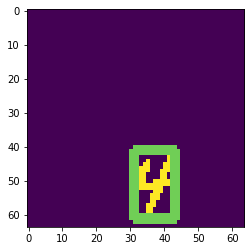

39-28-16-19


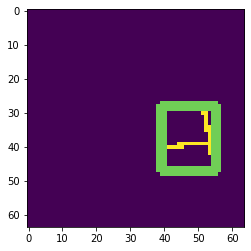

18-9-14-20


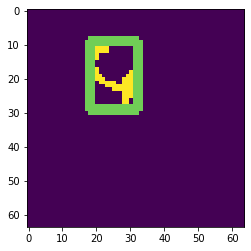

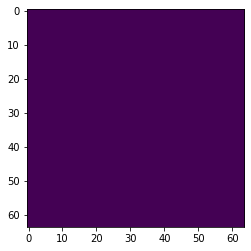

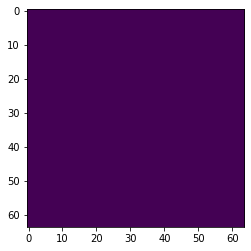

23-17-15-20


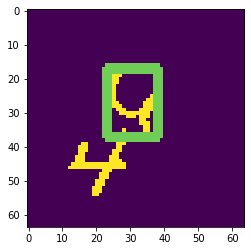

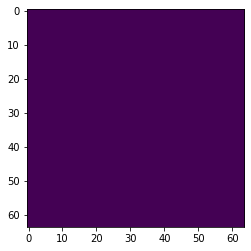

8-6-18-20


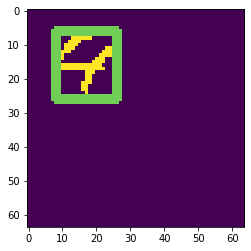

11-35-18-20


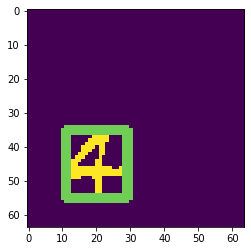

7-9-16-20


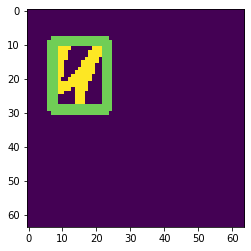

37-15-18-20


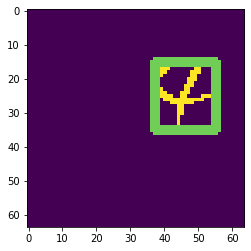

27-19-16-20


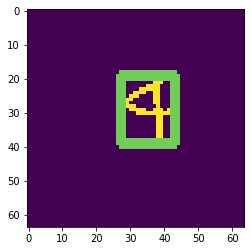

22-36-20-20


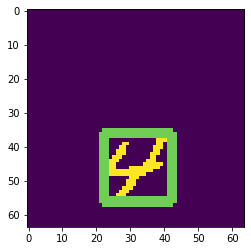

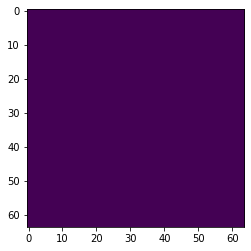

44-18-14-20


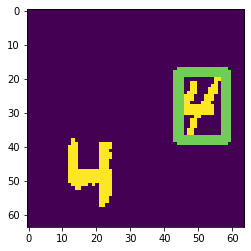

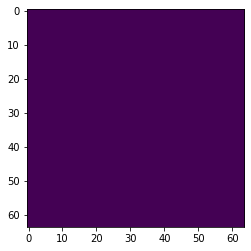

5-14-20-18


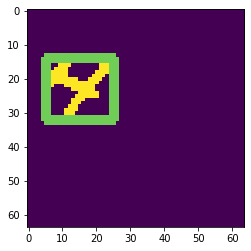

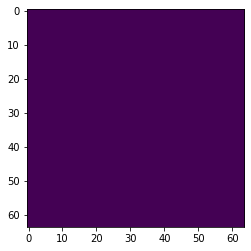

11-9-14-20


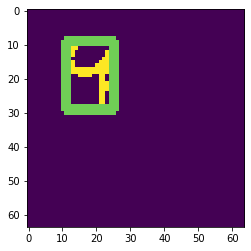

41-24-20-20


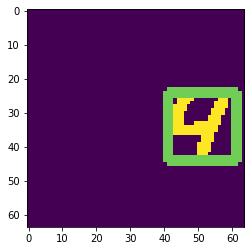

40-21-18-20


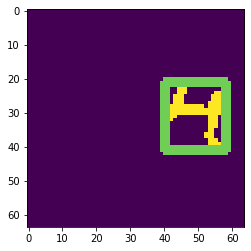

39-38-13-19


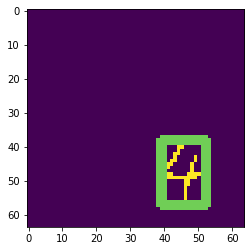

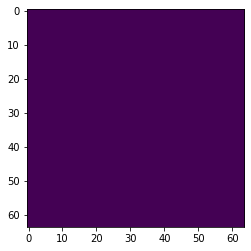

21-30-16-19


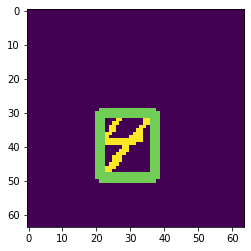

23-20-25-36


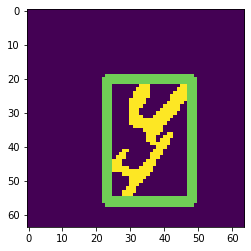

36-38-20-20


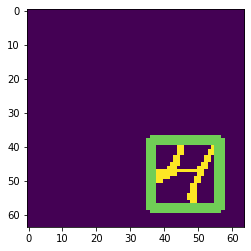

38-19-14-20


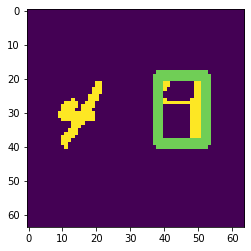

26-21-10-20


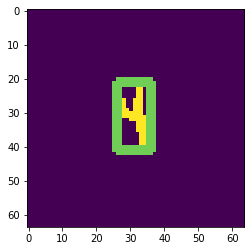

22-40-14-20


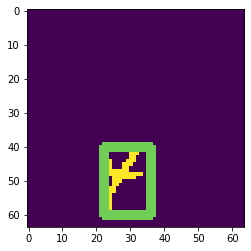

41-7-15-20


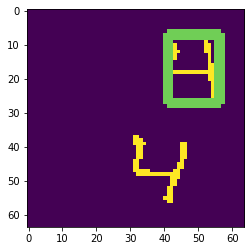

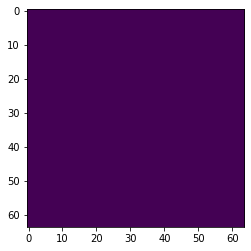

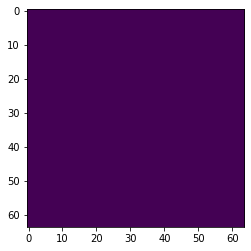

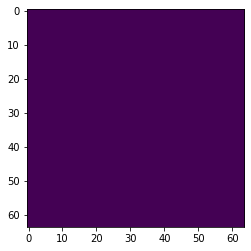

26-38-14-20


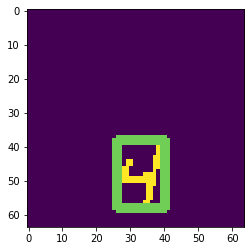

17-21-14-20


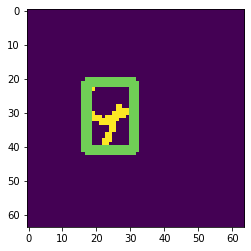

23-31-12-20


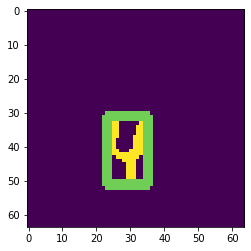

32-23-13-20


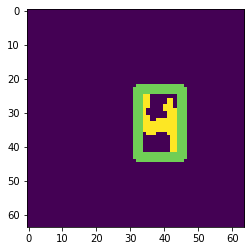

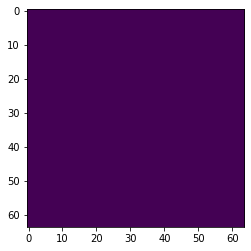

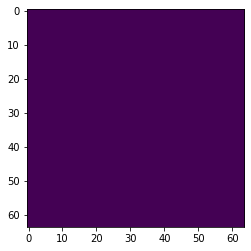

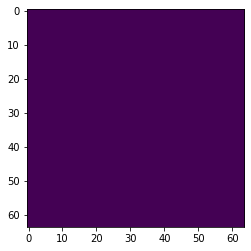

27-16-12-20


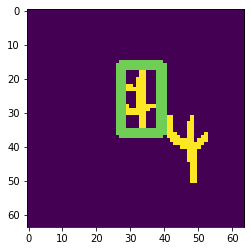

11-20-20-20


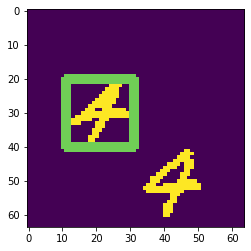

38-16-17-20


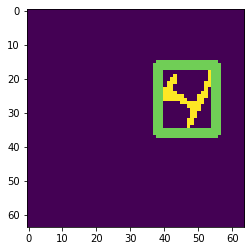

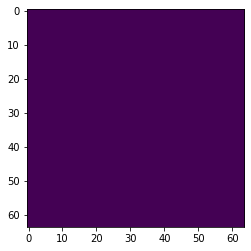

41-38-17-20


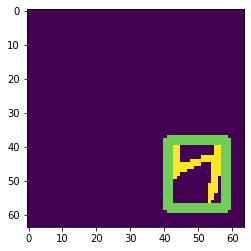

20-8-14-20


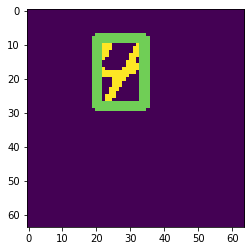

21-8-27-30


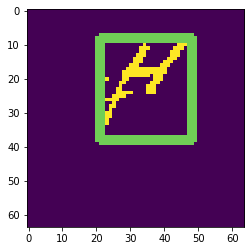

21-11-16-20


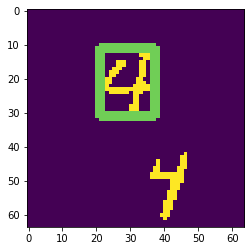

6-21-16-20


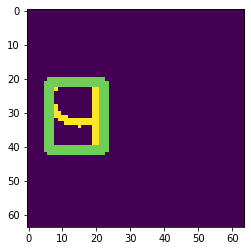

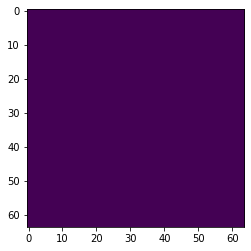

33-23-18-20


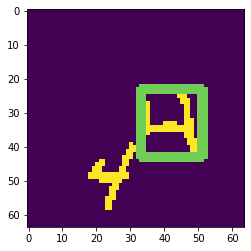

15-27-18-20


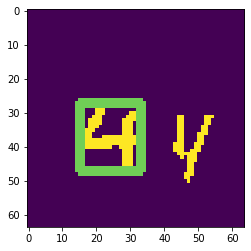

34-11-19-20


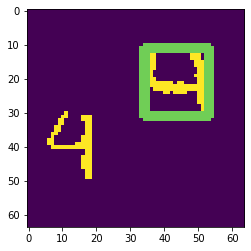

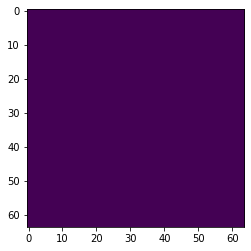

30-6-15-20


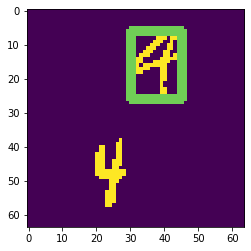

30-23-12-20


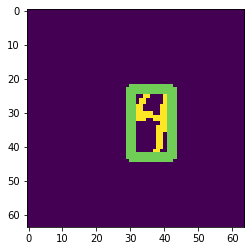

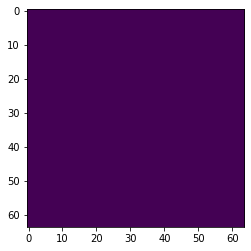

23-32-11-20


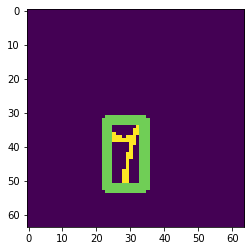

41-11-14-20


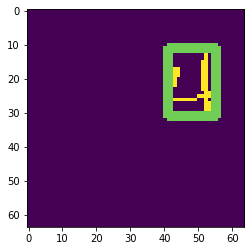

38-6-14-20


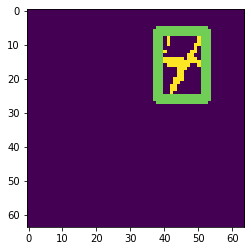

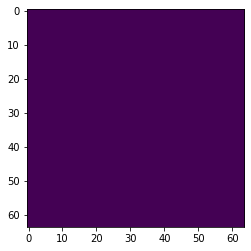

29-30-14-20


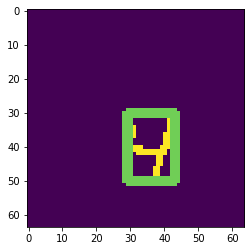

4-18-18-20


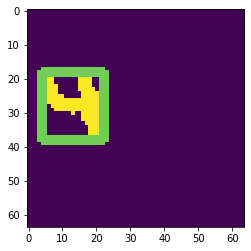

26-38-19-20


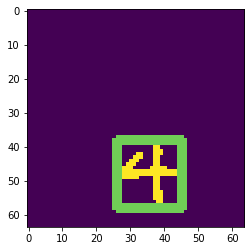

34-39-18-20


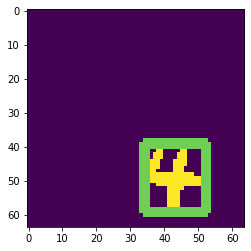

11-31-18-20


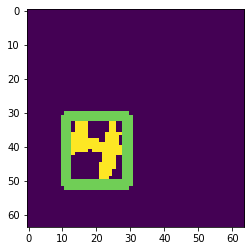

25-34-11-19


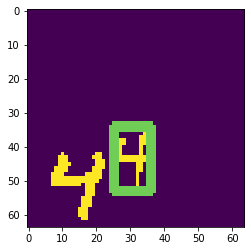

5-29-20-20


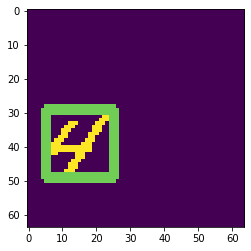

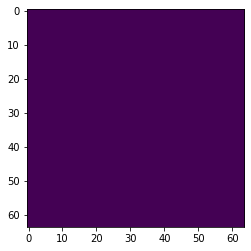

28-28-20-18


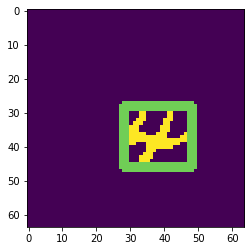

11-5-14-20


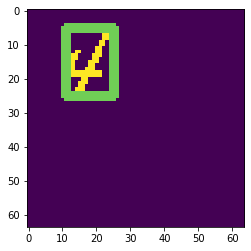

39-11-18-18


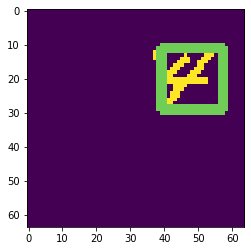

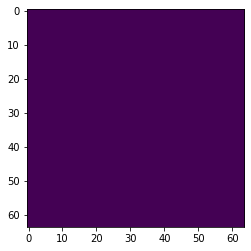

36-11-18-20


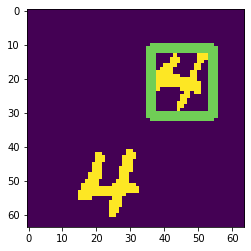

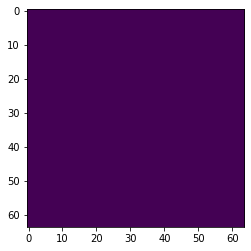

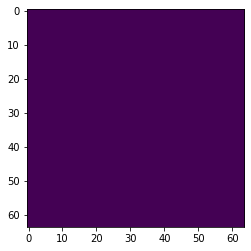

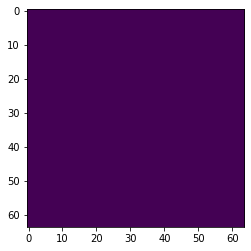

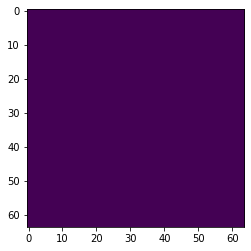

40-4-11-20


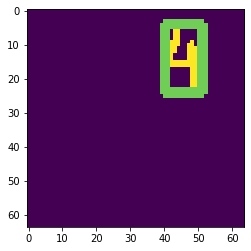

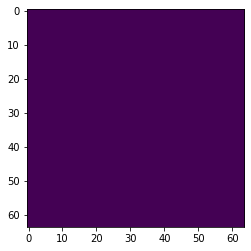

19-22-19-20


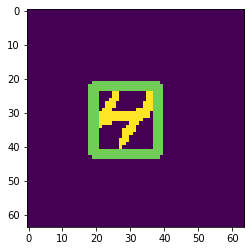

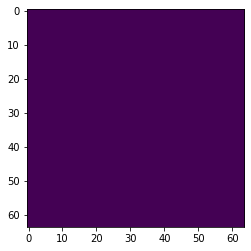

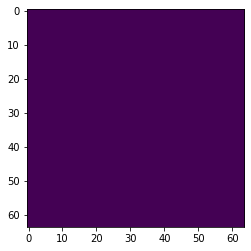

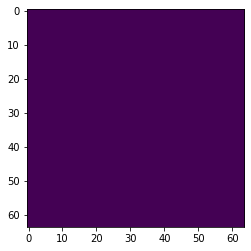

34-9-10-20


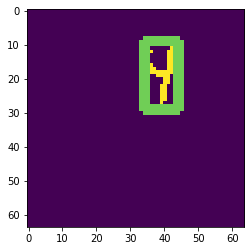

40-28-16-20


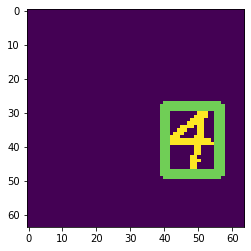

20-14-11-20


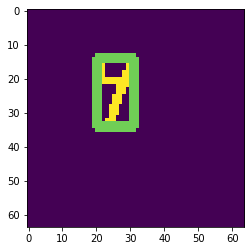

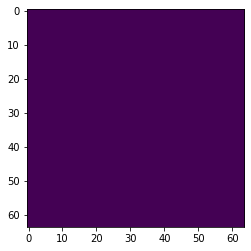

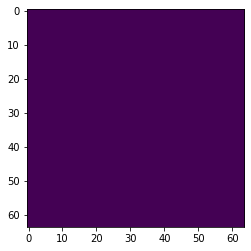

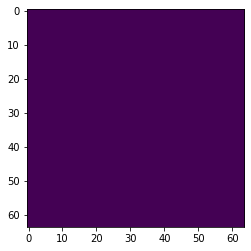

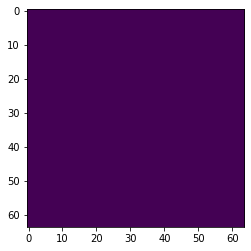

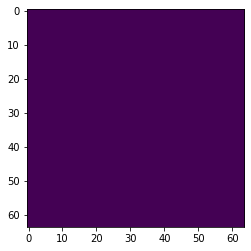

9-7-16-20


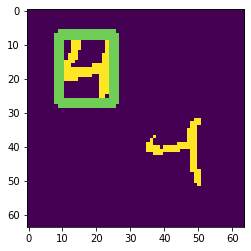

43-15-12-20


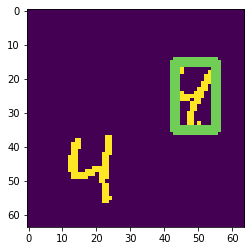

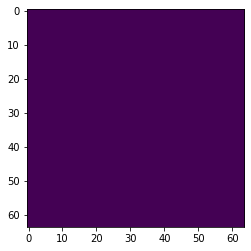

7-24-11-12


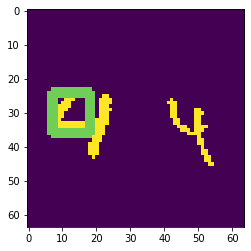

14-23-19-20


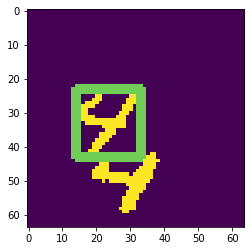

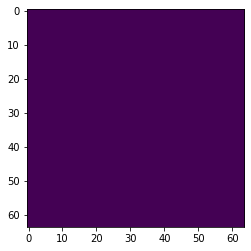

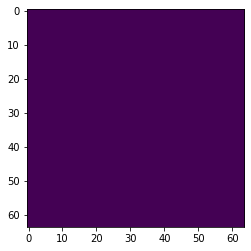

42-14-12-20


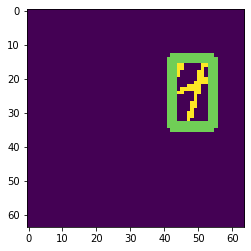

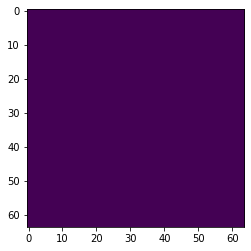

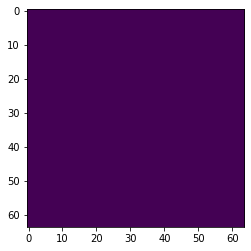

17-42-16-20


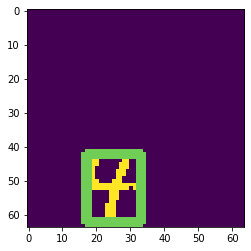

34-10-16-20


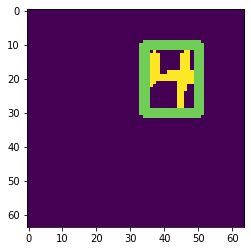

44-6-11-20


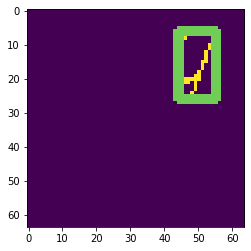

13-32-14-20


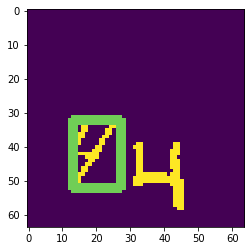

25-41-18-20


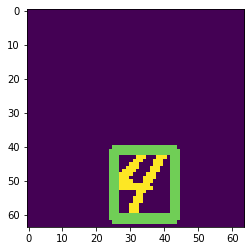

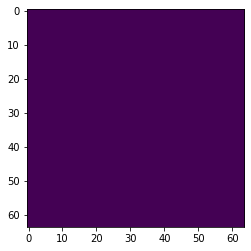

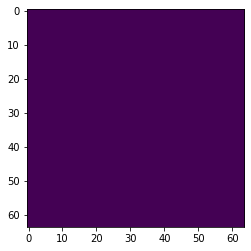

23-23-17-20


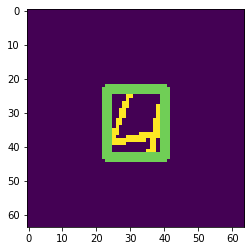

11-22-19-20


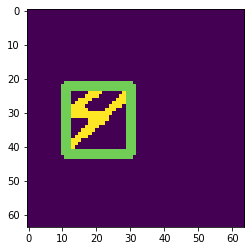

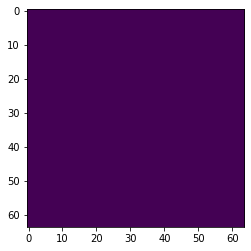

19-20-18-20


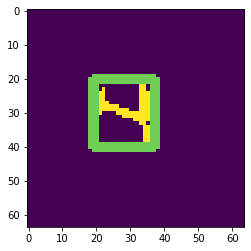

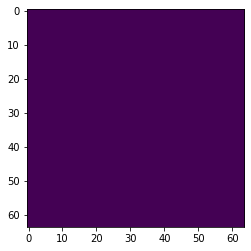

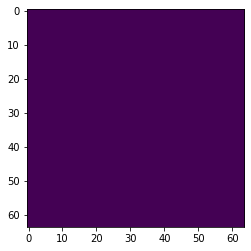

38-18-14-20


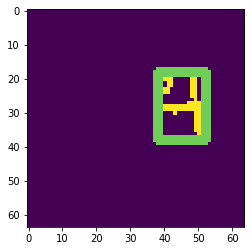

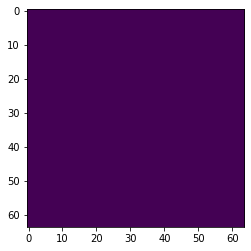

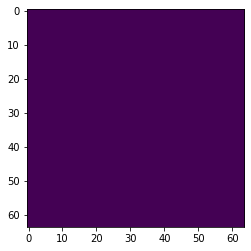

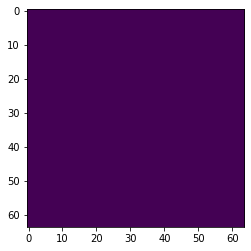

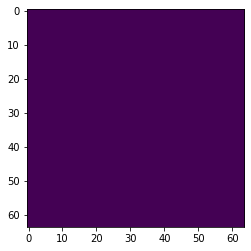

41-15-15-20


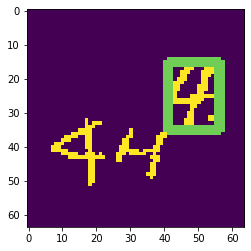

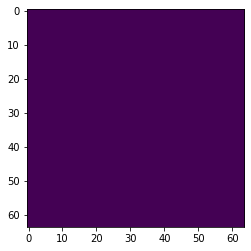

6-17-20-20


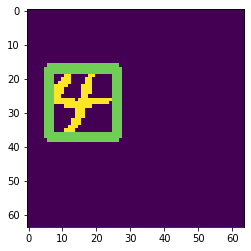

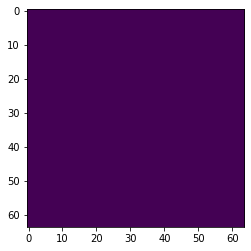

36-18-11-20


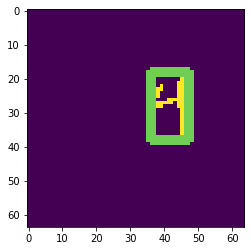

10-10-12-20


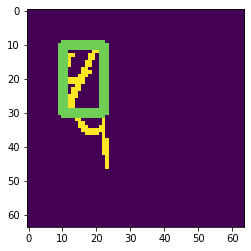

12-18-12-20


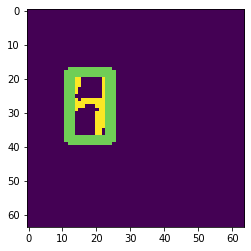

34-16-8-20


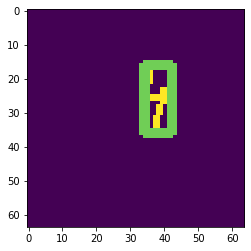

43-42-12-20


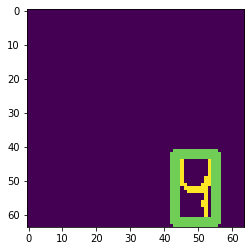

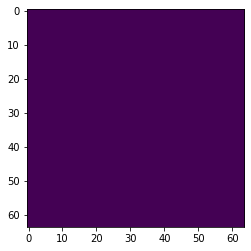

20-34-18-20


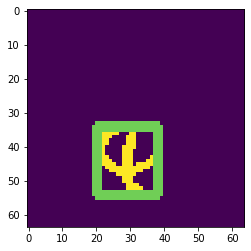

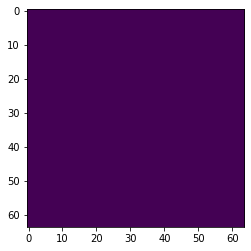

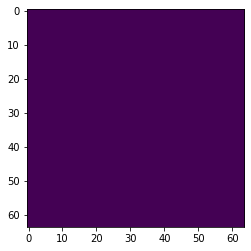

25-37-16-20


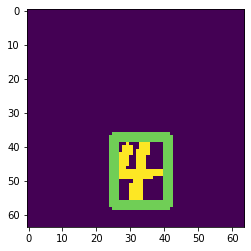

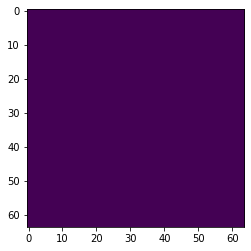

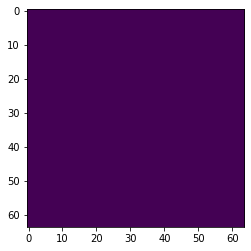

40-40-20-20


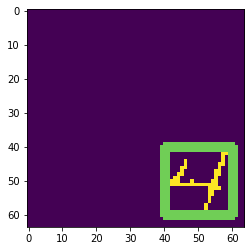

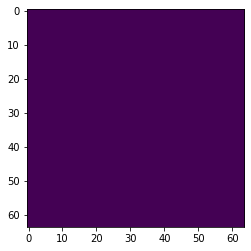

29-41-20-15


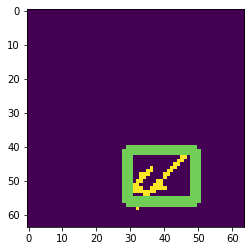

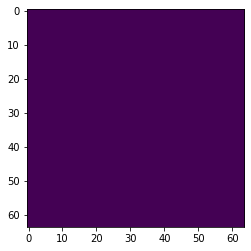

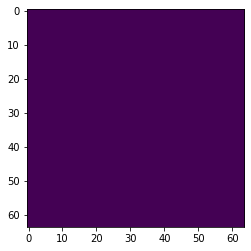

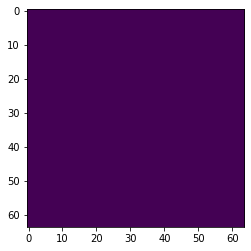

29-7-18-20


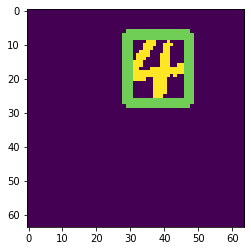

42-8-12-20


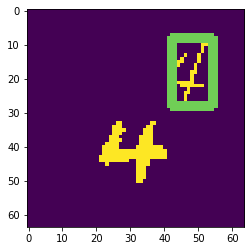

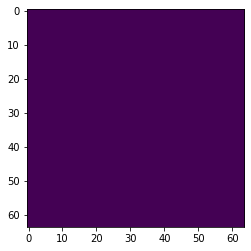

9-9-14-20


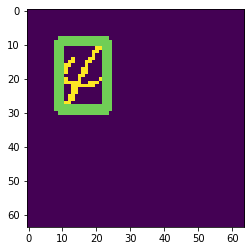

32-19-18-16


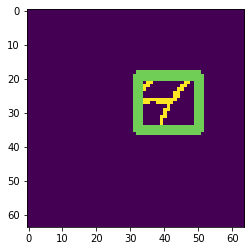

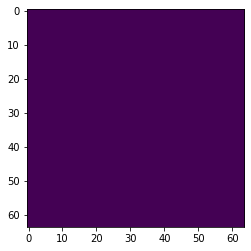

15-16-14-20


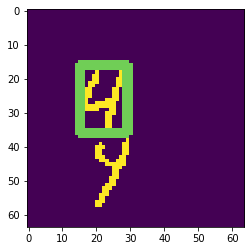

In [5]:
w_lst = []
h_lst = []
masks = np.load(dataset_path / 'train_y.npy')
n_class = 4
for i in range(masks.shape[0]):
    img = a[i]
    img = img[:,:,n_class]
    img = np.where(img>0.5, 1, 0)
    img = img*255
    im = np.array(img, dtype=np.uint8)
    gray = im
    contours, hierarchy = cv2.findContours(gray,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[-2:]
    idx =0 
    if contours is not ():
        cnt = contours[-1]
        idx += 1
        x,y,w,h = cv2.boundingRect(cnt)
        w_lst.append(w)
        h_lst.append(h)
        print(f'{x}-{y}-{w}-{h}')
        roi=im[y:y+h,x:x+w]
        cv2.rectangle(im,(x,y),(x+w,y+h),(200,0,0),2)
    plt.imshow(im)
    plt.show()

### Save w and h

In [6]:
print(f'{np.mean(w_lst)} +- {np.std(w_lst)}')

15.576301615798922 +- 3.6137596562821677


In [7]:
print(f'{np.mean(h_lst)} +- {np.std(h_lst)}')

20.09874326750449 +- 3.1484997197483424


In [8]:
dct_wh = {'w': w_lst,
          'h': h_lst
         }

In [9]:
import pickle
from pathlib import Path

path = Path('/home/e_radionova/PROJECT/optimal-kernels/IJCAI/notebooks/mask_shapes/mnist')
# with open(path / 'test.pickle', 'wb') as handle:
with open(path / f'class_{n_class}.pickle', 'wb') as handle:
    pickle.dump(dct_wh, handle)

### Load w and h

In [34]:
path = Path('/home/e_radionova/PROJECT/optimal-kernels/IJCAI/notebooks/mask_shapes/acdc')
os.listdir(path)

['class_2.pickle', 'class_0.pickle', 'class_1.pickle']

In [41]:
with open(path / 'class_2.pickle', 'rb') as handle:
    b = pickle.load(handle)

In [42]:
w_lst = b['w']
print(f'{np.mean(w_lst)} +- {np.std(w_lst)}')

30.54521510096576 +- 12.710058422139753


In [43]:
h_lst = b['h']
print(f'{np.mean(h_lst)} +- {np.std(h_lst)}')

31.8630377524144 +- 13.340566171839548
